# Adaptative Impedance Controller 

Install the python libraries

In [1]:
from IPython.display import clear_output
from IPython.display import Image


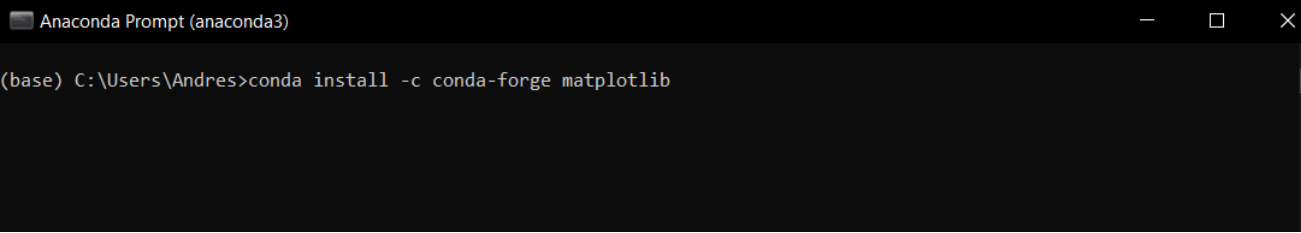

In [2]:
Image(filename='pictures/anacondapromt.png')

In [3]:
import time
import serial         #conda install -c anaconda pyserial
import numpy as np    #conda install -c anaconda numpy
import numpy.linalg as la
from datetime import datetime
import math
import json          #conda install -c jmcmurray json  
from scipy import stats  #conda install -c anaconda scipy
import matplotlib.pyplot as plt  #conda install -c conda-forge matplotlib

***
$\mathbf{\text{Basic Control Functions}}$<br>
***

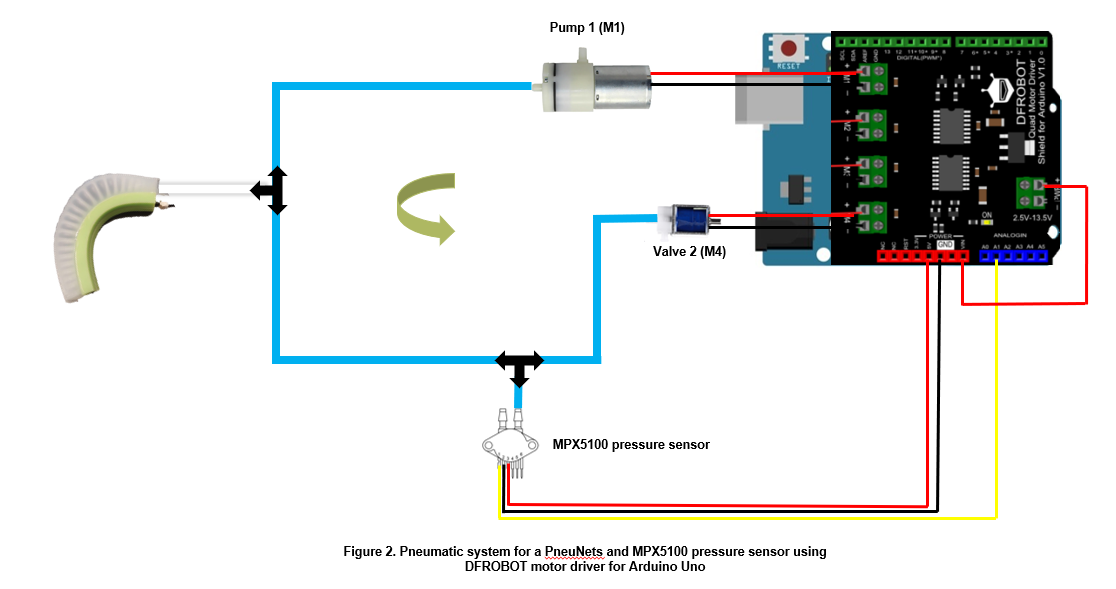

In [4]:
Image(filename='pictures/pneumaticsystem.png')

In [5]:
def star_communication(port):
    ser = serial.Serial(port, 115200, timeout=1)   #Include the number of the serial port
    return ser
    
def close_communication(ser):
    motor_control(ser,1)
    ser.close()


def read_data(ser, degree):
    #ser_bytes = ser.readline()
    ser.flushInput()
    
    cmd='r'+str(degree)+'\n'
    ser.write(bytes(cmd, encoding='ascii'))
    
    time.sleep(0.015)
    ser_bytes = ser.readline(ser.inWaiting())
    decoded_bytes = ser_bytes.decode()
    if len(decoded_bytes)>0 :
        decoded_bytes=decoded_bytes.strip()
        separated_data=decoded_bytes.split(",")
        if len(separated_data[0])>=4:
            integer_data = [i for i in separated_data]
            integer_array= np.array(integer_data)
        else:
            integer_array=np.zeros(5)
            integer_array[0]=2000
    else:
        integer_array=np.zeros(5)
        integer_array[0]=2000
    return integer_array

    
def feedback_data(ser, degree):              #current angle, current pressure, set_point(pressure or angle controller depends of the control), motor_speed
    integer_array=read_data(ser,degree)
    while len(integer_array)<5 or integer_array[0]==2000:
        integer_array=read_data(ser, degree)
    integer_array2=integer_array
    return integer_array2

def feedback_data2(ser, degree):              #current angle, current pressure, set_point(pressure or angle controller depends of the control), motor_speed
    integer_array=read_data(ser,degree)
    integer_array2=integer_array
    return integer_array2




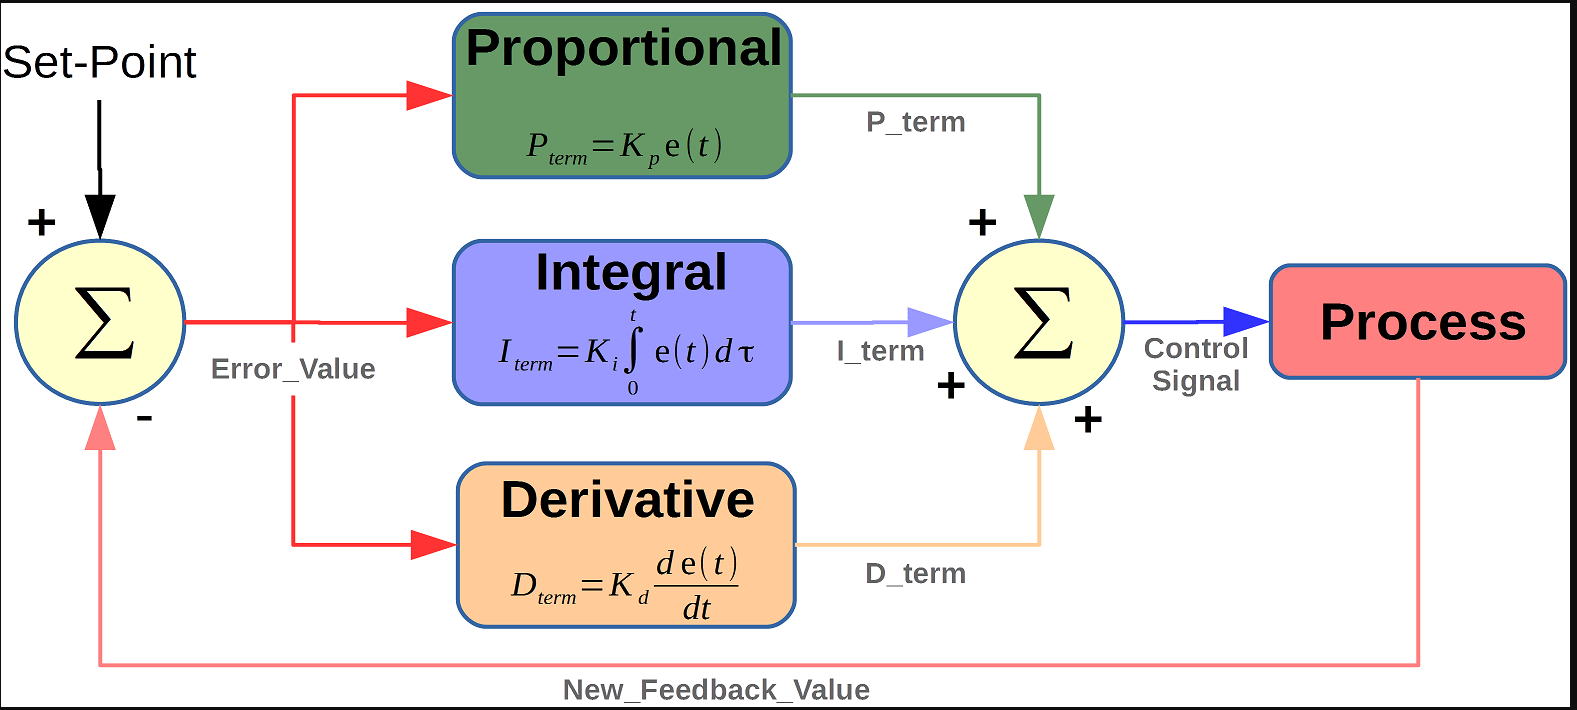

In [6]:
Image(filename='pictures/pid.png')

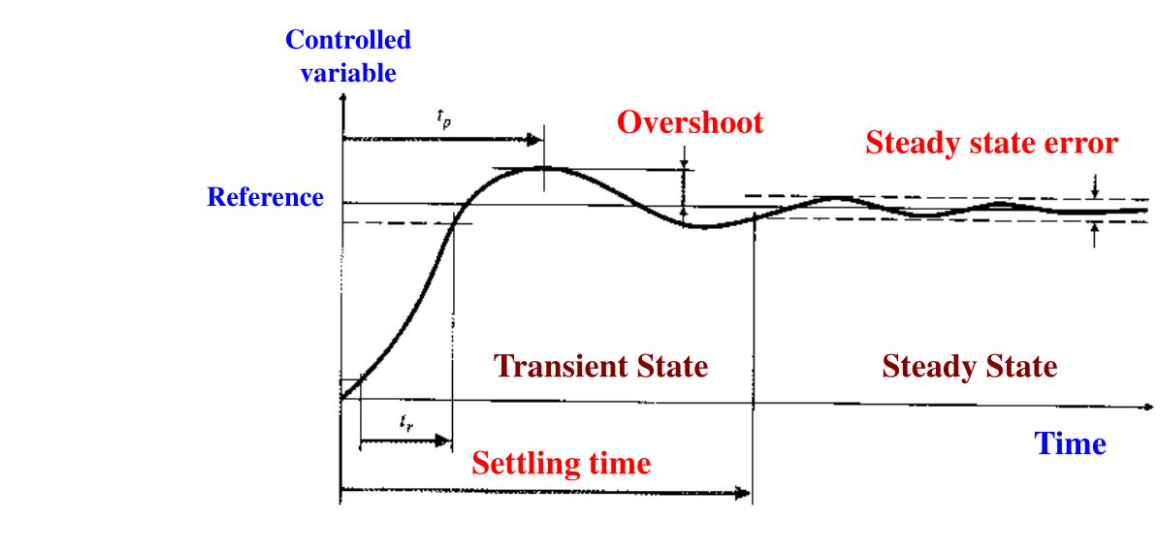

In [7]:
Image(filename='pictures/pid_response.png')

In [120]:
def motor_control(ser, speed_val):    #speed on the range of +255 to -255, Negative values just open the valve and stop the pump, 0 stops the pump but valve is still working
    ser_bytes = ser.readline()
    ser.flushInput()
    time.sleep(0.001)
    motor_speed=str(speed_val)
    cmd='m'+motor_speed+'\n'
    print(cmd)
    ser.write(bytes(cmd, encoding='ascii'))

def pressure_control(ser, pressure_val):    #pressure on the range of 0 to +25 kpa
    ser_bytes = ser.readline()
    ser.flushInput()
    time.sleep(0.001)
    motor_pressure=str(pressure_val)
    cmd='p'+motor_pressure+'\n'
    #print(cmd)
    ser.write(bytes(cmd, encoding='ascii'))
    
def bend_control(ser, bend_val):    #angle on the range of 0 to +180
    ser_bytes = ser.readline()
    ser.flushInput()
    time.sleep(0.001)
    motor_bend=str(bend_val)
    cmd='a'+motor_bend+'\n'
    #print(cmd)
    ser.write(bytes(cmd, encoding='ascii'))
    
def calibrate_zero(ser):    #speed on the range of +255 to -255, Negative values just open the valve and stop the pump, 0 stops the pump but valve is still working
    ser_bytes = ser.readline()
    ser.flushInput()
    time.sleep(0.001)
    cmd='l'+'0'+'\n'
    print(cmd)
    ser.write(bytes(cmd, encoding='ascii'))


1.&emsp;Demo code for control functions usage <br>

In [ ]:
ser=star_communication('COM14')
motor_control(ser,50)        #Activating speed control with setpoint at 50
time.sleep(5)
pressure_control(ser, 22)    #Activating pressure control with setpoint at 22
time.sleep(5)
bend_control(ser, 90)        #Activating angle control with setpoint at 90
time.sleep(5)
values=feedback_data(ser)    #Getting data from microcontroller
time.sleep(0.1)
print(values)
values=feedback_data(ser)
time.sleep(0.1)
print(values)
close_communication(ser)

In [9]:
ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(1)
ser.close()

m-10



2.&emsp;Demo code for simple close loop control <br>

In [ ]:
i=0
ser=star_communication('COM14')
values=feedback_data(ser,120)
bend_control(ser, 120)
while (i<1000):                     # Close loop controller
    #bend_control(ser, 120)
    time.sleep(0.1)
    values=feedback_data(ser,120)
    print(str(i)+' '+str(values))
    i=i+1
values=feedback_data(ser,120)
print(str(i)+' '+str(values))
close_communication(ser)

In [ ]:
ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(1)
ser.close()

***
$\mathbf{\text{Zero-torque Trajectory}}$<br>
***
1.&emsp;The zero-torque trajectory of the controller, $q_{d}(t)$ followed a minimum-jerk trajectory <br>

$$q_{d}(t) = q_{i} + (q_{f} - q_{i}) \Bigg[ 10 (\frac{t}{D})^3 - 15 (\frac{t}{D})^4 + 6 (\frac{t}{D})^5 \Bigg]   (4)$$

**Cite**: Equation (4) at Xiong, X., Nah, M. C., Krotov, A., & Sternad, D. (Accepted/In press). Online Impedance Adaptation Facilitates Manipulating a Whip. In Proceedings of the International Conference on Intelligent Robots and Systems (IROS 2021) IEEE.[Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/IROS21_1612_MS.pdf)

**Task**: Complete the function des_tra(self, t, dt), based on the equation 4 and the input parameters $q_{i}=$self.ini_ang, $q_{f}=$self.end_ang, $D=$self.dur <br>
**Use the function np.power(value,exponent)<br>

In [ ]:
Image(filename='pictures/minimal_jerk.png')

In [ ]:
def des_tra(self, t, dt):   ####Trajectory planner### minimum jerk trajectory equation 4 iros2021
        
        
        des_ang =  .....................
        
        deg_vel = (des_ang - self.pre_ang)/dt
        self.pre_ang = np.copy(des_ang)
        return des_ang, deg_vel

***
$\mathbf{\text{Adaptative Motor Controller}}$<br>
***

In [ ]:
Image(filename='pictures/acm.png')

1.&emsp;The position error $e(t)$, velocity error $\dot{e}(t)$, and tracking error $\varepsilon(t)$ are given by:  <br>

$$e(t)=q(t)-q_{d}(t)$$
$$\dot{e}(t)=\dot{q}(t)-\dot{q}_{d}(t)$$
$$\varepsilon(t)=e(t)+\beta\dot{e}(t)$$

**Cite**: Equation (3) at X. Xiong and P. Manoonpong, "Adaptive Motor Control for Human-like Spatial-temporal Adaptation," 2018 IEEE International Conference on Robotics and Biomimetics (ROBIO), 2018, pp. 2107-2112, doi: 10.1109/ROBIO.2018.8665222. [Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/root.pdf)

**Task**: Complete the function gen_vel_err(self), gen_track_err(self), based on the equation 3 and the input parameters $q=$self.q, $\dot{q}(t)=$self.dq, <br>
$\dot{q}_{d}(t)=$self.dq_d, $\beta=$self.k


In [ ]:
def gen_pos_err(self):   ## 2018 equ. 3
        #print np.mat(self.arm.q).shape, self.task.ref_traj_ang.shape
        return (self.q - self.q_d)

def gen_vel_err(self):   ## 2018 equ. 3
        #print np.mat(self.arm.dq).shape, self.task.ref_traj_vel.shape
        return (................)

def gen_track_err(self):  ## 2018 equ. 3
        return (................)

2.&emsp;$\gamma(t)$ is an adaptation scalar with the positive scalrs $a$ and $b$, defined as follows:  <br>

$$\gamma(t)=\frac{a}{1+b \mid\mid \varepsilon(t) \mid\mid^2 }$$


**Cite**: Equation (9) at X. Xiong and P. Manoonpong, "Adaptive Motor Control for Human-like Spatial-temporal Adaptation," 2018 IEEE International Conference on Robotics and Biomimetics (ROBIO), 2018, pp. 2107-2112, doi: 10.1109/ROBIO.2018.8665222. [Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/root.pdf)

**Task**: Complete the function gen_for_factor(self), based on the equation 9 and the input parameters $a=$self.a, $b=$self.b, and $\varepsilon(t)=$gen_track_err()<br>

To calculate the norm of the equation you can use the function la.norm()<br>


In [ ]:
def gen_for_factor(self):  ## 2018 equ. 9  adaptation rate
        return ................)

3.&emsp;The force and impedance adaptation is guided by: <br>

$$F(t)=\frac{\varepsilon(t)}{\gamma(t)}$$ <br>
$$K(t)=F(t)e^T(t)$$  <br>
$$D(t)=F(t)\dot{e}^T(t)$$ <br>



**Cite**: Equation (8) at X. Xiong and P. Manoonpong, "Adaptive Motor Control for Human-like Spatial-temporal Adaptation," 2018 IEEE International Conference on Robotics and Biomimetics (ROBIO), 2018, pp. 2107-2112, doi: 10.1109/ROBIO.2018.8665222. [Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/root.pdf)

**Task**: Complete the function update_impedance(self, q, q_d, dq, dq_d), based on the equation 8 and the input parameters <br>
$\varepsilon(t)=$gen_track_err(), <br>
$\gamma(t)=$gen_for_factor(), <br>
$e=$gen_pos_err(), <br>
$\dot{e}=$gen_vel_err().  <br>

**To calculate the transposed matrix of the vector you can use the function ndarray.T(), e.g. $e^T(t)=$self.gen_pos_err().T<br>

In [ ]:
def update_impedance(self, q, q_d, dq, dq_d):   ### main function for impedance control equation 8 and 9 in 2018 paper

        self.q = np.mat(np.copy(q)).T
        self.q_d = np.mat(np.copy(q_d)).T

        self.dq = np.mat(np.copy(dq)).T
        self.dq_d = np.mat(np.copy(dq_d)).T

        self.k_mat = ..................         #stiffness

        self.d_mat = ..................         # damping

        self.ff_tau_mat = self.gen_track_err() / self.gen_for_factor()

        return self.k_mat, self.d_mat, self.ff_tau_mat


***
$\mathbf{\text{Adaptative impedance controller Class}}$<br>
***

In [ ]:
class ada_imp_con( ):
    def __init__(self, dof):
        self.DOF = dof
        self.k_mat = np.mat(np.zeros((self.DOF, self.DOF)))
        self.d_mat = np.mat(np.zeros((self.DOF, self.DOF)))
        self.ff_tau_mat = np.mat(np.zeros((self.DOF, 1)))

        self.q = np.mat(np.zeros((self.DOF, 1)))
        self.q_d = np.mat(np.zeros((self.DOF, 1)))

        self.dq = np.mat(np.zeros((self.DOF, 1)))
        self.dq_d = np.mat(np.zeros((self.DOF, 1)))
        self.a = 0.2
        self.b = 44000.0#35000.0#5.0
        self.k = 0.05#

        #minimal jerk trajectory
        self.ini_ang = 0.0   #q_i
        self.end_ang = 60.0  #q_f
        self.dur = 2.0       #D
        self.pre_ang = 0.0
        
        
    def des_tra(self, t, dt):   ####Trajectory planner### minimum jerk trajectory equation 4 iros2021
        des_ang = self.ini_ang + ( self.end_ang - self.ini_ang ) * ( 10 * np.power(t,3 ) / ( self.dur ** 3 ) - 15 * np.power(t, 4 ) / ( self.dur ** 4 ) +  6 * np.power( t, 5 ) / ( self.dur ** 5 ) )
        deg_vel = (des_ang - self.pre_ang)/dt
        self.pre_ang = np.copy(des_ang)
        return des_ang, deg_vel
    
    
    def gen_pos_err(self):   ## 2018 equ. 3
      ##Complete ###

    def gen_vel_err(self):   ## 2018 equ. 3
      ##Complete ###

    def gen_track_err(self):  ## 2018 equ. 3
      ##Complete ###

    def gen_for_factor(self):  ## 2018 equ. 9  adaptation rate
      ##Complete ###
    
    def update_impedance(self, q, q_d, dq, dq_d):   ### main function for impedance control equation 8 and 9 in 2018 paper
        self.q = np.mat(np.copy(q)).T
        self.q_d = np.mat(np.copy(q_d)).T
        self.dq = np.mat(np.copy(dq)).T
        self.dq_d = np.mat(np.copy(dq_d)).T

        self.k_mat = ##Complete ###

        self.d_mat = ##Complete ###

        self.ff_tau_mat = self.gen_track_err() / self.gen_for_factor()
        
        return self.k_mat, self.d_mat, self.ff_tau_mat



In [ ]:
# %load scripts/ada_imp_con.py

***
$\mathbf{\text{Demo version: Control loop for soft actuator}}$<br>
***

Initial parameters

In [ ]:
ser=star_communication('COM14')

n_t=0.0                           ## runing time
duration = 30                     ## total process time
pre_t = 0.0                       ##previous time n-1
DOF = 1                           ## control degrees of freedom

ada = ada_imp_con(DOF)            ##initialization of the adaptative function

ada.end_ang = 120.0               ## maximal point to reach
ada = ada_imp_con(DOF)            ##initialization of the adaptative function
ada.dur = duration                ##duration of the whole trajectory


motor_control(ser,1)              ##enough time for start the pump
time.sleep(5)                     ##enough time for start the pump
motor_val = 0.0                   ##control output to the pump
max_mo_val = 250                  ## saturation value
fb_motor_val = 0.                 ##feedback of the motor speed


values=feedback_data(ser)        ##getting initial position of the robot
in_ang = float(values[0])        ##getting initial position of the robot
now_ang = np.copy(in_ang)        ##getting initial position of the robot
pre_ang = np.copy(in_ang)        ##getting initial position of the robot
now_vel = 0.0                    ##getting initial position of the robot

alp= 0.9                         ##low-pass filter with a low bias from the input constant
ave_ang_err = 0.0                ## angular error angle-desired angle
t_s = 0                          ## sample time
s_t = datetime.now()             ##current initial time

1.&emsp;The $\tau(t)$ produced by the AMC includes the force and impedance parts: <br>

$$\tau(t) = -F(t)-K(t)e(t)-D(t)\dot{e}(t)   (2)$$

**Cite**: Equation (2) at Xiong, X., Nah, M. C., Krotov, A., & Sternad, D. (Accepted/In press). Online Impedance Adaptation Facilitates Manipulating a Whip. In Proceedings of the International Conference on Intelligent Robots and Systems (IROS 2021) IEEE. [Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/root.pdf)

**Task**: Complete the calculation of $\tau(t)=$fb_motor_val, based on the equation 2 and the input parameters $-K=$k[0,0], $-D=$d[0,0],the error and velocity error are calculated based on the current angle (now_ang_rad), desired angle (des_ang_rad), current velocity (now_vel_rad), and desired velocity (des_vel_rad).<br>
** e=des_ang_rad-now_ang_rad, F(t) = 0, 

In [ ]:
while (n_t < duration ):

    diff_t = datetime.now() - s_t
    n_t = diff_t.seconds + diff_t.microseconds/1E6               ##current process time

    dt = n_t-pre_t                                               ## time for 1 iteration

    des_ang, des_vel = ada.des_tra(n_t, dt)                      ##etting the desired trajectory 
    des_ang = in_ang + des_ang                                   ##initial position compensation (translation pos)

    values=feedback_data(ser)

    now_ang = float(values[0])                                  ##transforming to float value
    now_ang = (alp * pre_ang) + (1.0-alp) * (now_ang)           ##low pass filter 
    if (dt > 0.0):                                              ##avoid undefinition
        now_vel = (now_ang - pre_ang)/dt                        ##calculating the current speed 
    else:
        now_vel = 0.0

    
    now_ang_rad = (now_ang/180.0)*math.pi   ##transforming in radians units  current angle
    des_ang_rad = (des_ang/180.0)*math.pi   ##transforming in radians units  desired angle
    now_vel_rad = (now_vel/180.0)*math.pi   ##transforming in radians units  current speed
    des_vel_rad = (des_vel/180.0)*math.pi   ##transforming in radians units  desired speed
    
    k, d, ff = ada.update_impedance(now_ang_rad, des_ang_rad, now_vel_rad, des_vel_rad)     ##k stifness  d damping  ff not used
    
    fb_motor_val = ###Complete .....###  ##equation 2 2018
    
    print(n_t, des_ang_rad-now_ang_rad)                                                     ##fb_motor_val, k[0,0], d[0,0])#des_ang_rad-now_ang_rad)
    ave_ang_err = ave_ang_err + abs(des_ang_rad-now_ang_rad)                                ##acumulated average error


   
    motor_val = des_ang * 2.5                     ##  feed forward control with constant a=2.5
    motor_val = motor_val + fb_motor_val          ##  feedback control + ff control

    if motor_val > max_mo_val:                    ##  saturation of the motor speed
        motor_val = max_mo_val
        print('out of limit!')
        #break
    motor_control(ser,motor_val)                 ##   asigning the value to the board
    #print(motor_val, fb_motor_val)
    #print(n_t, motor_val, des_ang, des_vel)

    #print(values)
    #print(dt)
    t_s = t_s + 1


    pre_t = np.copy(n_t)                         ##     saving the previous values for time
    pre_ang = np.copy(now_ang)                   ##     saving the previous values for angle

print(ave_ang_err/t_s)                           ##     average error
close_communication(ser)

In [ ]:
# %load scripts/acm_control.py

In [ ]:
ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(1)
ser.close()

***
$\mathbf{\text{Sigmoid Function Estimation}}$<br>
***

In [11]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
import pandas as pd
from scipy import signal
import csv

import pandas as pd
from scipy import signal
import csv

In [ ]:
def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

In [ ]:
Image(filename='pictures/sigmoid.png')

**Data set collection**

In [ ]:
i=0
ser=star_communication('COM14')
values=feedback_data(ser,120)
bend_control(ser, 120)
while (i<1000):                     # Close loop controller
    #bend_control(ser, 120)
    time.sleep(0.1)
    values=feedback_data(ser,120)
    print(str(i)+' '+str(values))
    i=i+1
values=feedback_data(ser,120)
print(str(i)+' '+str(values))
close_communication(ser)

In [ ]:
i=0
ser=star_communication('COM14')
bend_control(ser, 180)
values=feedback_data(ser,180)
with open("Dataset/Jonathan_dataset1.csv","a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])
            
while (i<600):                      # Close loop controller
    to=time.perf_counter()
    bend_control(ser, 180)
    time.sleep(0.001)
    values=feedback_data(ser)
    with open("Dataset/dataset6.csv","a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3], values[4]])
    #print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(1)
ser.close()

In [74]:
i=0
j=0
degree=0
ser=star_communication('COM9')
bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open("Dataset/Jonathan_dataset12.csv","a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])
            
while (i<4200):                      # Close loop controller
    j=j+1
    if j==600 :
        degree=degree+30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open("Dataset/Jonathan_dataset12.csv","a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=180
while (i<4200):                      # Close loop controller
    j=j+1
    if j==600 :
        degree=degree-30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open("Dataset/Jonathan_dataset12.csv","a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM9')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

start
0 ['-11.73' '0.03' '0.00' '0' '']
1 ['-10.28' '0.03' '0.00' '0' '']
2 ['-10.28' '0.46' '0.00' '52' '']
3 ['-10.28' '0.90' '0.00' '52' '']
4 ['-10.28' '0.25' '0.00' '53' '']
5 ['-10.28' '0.25' '0.00' '53' '']
6 ['-10.28' '1.45' '0.00' '54' '']
7 ['-10.28' '0.57' '0.00' '54' '']
8 ['-10.28' '1.12' '0.00' '55' '']
9 ['-10.28' '1.12' '0.00' '55' '']
10 ['-10.28' '1.77' '0.00' '55' '']
11 ['-10.28' '1.12' '0.00' '56' '']
12 ['-10.28' '0.90' '0.00' '56' '']
13 ['-10.28' '1.01' '0.00' '57' '']
14 ['-10.28' '1.34' '0.00' '57' '']
15 ['-10.28' '2.32' '0.00' '58' '']
16 ['-10.28' '1.77' '0.00' '58' '']
17 ['-10.28' '2.54' '0.00' '59' '']
18 ['-10.28' '1.77' '0.00' '59' '']
19 ['-10.28' '2.65' '0.00' '59' '']
20 ['-10.28' '1.88' '0.00' '60' '']
21 ['-10.28' '1.55' '0.00' '60' '']
22 ['-10.28' '2.10' '0.00' '61' '']
23 ['-10.28' '1.77' '0.00' '61' '']
24 ['-10.28' '1.88' '0.00' '62' '']
25 ['-10.28' '3.08' '0.00' '62' '']
26 ['-10.28' '2.10' '0.00' '62' '']
27 ['-10.28' '3.19' '0.00' '63' ''

225 ['-5.63' '14.53' '0.00' '115' '']
226 ['-5.63' '15.40' '0.00' '115' '']
227 ['-5.63' '14.63' '0.00' '116' '']
228 ['-5.63' '14.42' '0.00' '116' '']
229 ['-5.63' '16.27' '0.00' '116' '']
230 ['-5.63' '15.40' '0.00' '116' '']
231 ['-5.63' '14.74' '0.00' '117' '']
232 ['-5.63' '15.62' '0.00' '117' '']
233 ['-5.63' '15.83' '0.00' '118' '']
234 ['-5.63' '17.14' '0.00' '118' '']
235 ['-5.63' '16.60' '0.00' '118' '']
236 ['-5.63' '14.85' '0.00' '118' '']
237 ['-5.63' '15.72' '0.00' '118' '']
238 ['-5.63' '17.47' '0.00' '119' '']
239 ['-5.63' '15.18' '0.00' '119' '']
240 ['-5.63' '15.62' '0.00' '119' '']
241 ['-5.63' '15.94' '0.00' '119' '']
242 ['-4.88' '17.47' '0.00' '120' '']
243 ['-4.88' '15.18' '0.00' '120' '']
244 ['-4.88' '15.40' '0.00' '116' '']
245 ['-4.88' '15.18' '0.00' '116' '']
246 ['-4.88' '15.83' '0.00' '117' '']
247 ['-4.88' '17.36' '0.00' '117' '']
248 ['-4.88' '15.29' '0.00' '117' '']
249 ['-4.88' '15.51' '0.00' '117' '']
250 ['-4.88' '17.58' '0.00' '117' '']
251 ['-4.88'

444 ['-0.27' '20.30' '0.00' '113' '']
445 ['-0.27' '20.41' '0.00' '113' '']
446 ['-0.27' '18.34' '0.00' '113' '']
447 ['-0.27' '20.41' '0.00' '113' '']
448 ['-0.27' '18.34' '0.00' '113' '']
449 ['-0.27' '18.99' '0.00' '113' '']
450 ['-0.27' '20.41' '0.00' '113' '']
451 ['-0.27' '20.19' '0.00' '113' '']
452 ['-0.27' '19.21' '0.00' '113' '']
453 ['-0.27' '20.19' '0.00' '113' '']
454 ['-0.27' '19.10' '0.00' '113' '']
455 ['-0.27' '18.34' '0.00' '113' '']
456 ['-0.27' '19.21' '0.00' '113' '']
457 ['-0.27' '20.19' '0.00' '113' '']
458 ['-0.27' '19.21' '0.00' '113' '']
459 ['-0.27' '20.19' '0.00' '113' '']
460 ['-0.27' '19.32' '0.00' '113' '']
461 ['0.52' '19.43' '0.00' '113' '']
462 ['0.52' '20.96' '0.00' '113' '']
463 ['0.52' '19.43' '0.00' '113' '']
464 ['0.52' '19.76' '0.00' '109' '']
465 ['0.52' '18.89' '0.00' '109' '']
466 ['0.52' '18.45' '0.00' '109' '']
467 ['0.52' '20.41' '0.00' '109' '']
468 ['0.52' '18.45' '0.00' '109' '']
469 ['0.52' '20.41' '0.00' '109' '']
470 ['0.52' '19.54' '

663 ['23.19' '23.68' '30.00' '194' '']
664 ['24.03' '25.43' '30.00' '190' '']
665 ['24.03' '26.08' '30.00' '190' '']
666 ['24.93' '23.46' '30.00' '186' '']
667 ['24.93' '23.57' '30.00' '186' '']
668 ['24.93' '23.35' '30.00' '186' '']
669 ['25.72' '23.68' '30.00' '187' '']
670 ['25.72' '23.46' '30.00' '183' '']
671 ['26.52' '23.79' '30.00' '183' '']
672 ['26.52' '25.43' '30.00' '183' '']
673 ['26.52' '23.79' '30.00' '179' '']
674 ['26.52' '23.57' '30.00' '179' '']
675 ['27.28' '23.46' '30.00' '180' '']
676 ['27.28' '23.57' '30.00' '180' '']
677 ['27.28' '24.88' '30.00' '176' '']
678 ['27.28' '23.57' '30.00' '176' '']
679 ['28.17' '24.23' '30.00' '172' '']
680 ['28.17' '23.79' '30.00' '172' '']
681 ['28.17' '23.57' '30.00' '172' '']
682 ['28.17' '24.23' '30.00' '172' '']
683 ['28.99' '23.35' '30.00' '168' '']
684 ['28.99' '24.34' '30.00' '168' '']
685 ['29.80' '23.68' '30.00' '168' '']
686 ['29.80' '23.79' '30.00' '168' '']
687 ['29.80' '23.57' '30.00' '164' '']
688 ['29.80' '24.34' '30.

877 ['33.07' '23.35' '30.00' '108' '']
878 ['33.07' '23.46' '30.00' '108' '']
879 ['32.30' '23.46' '30.00' '112' '']
880 ['32.30' '22.70' '30.00' '112' '']
881 ['32.30' '23.46' '30.00' '112' '']
882 ['32.30' '23.25' '30.00' '112' '']
883 ['32.30' '24.99' '30.00' '112' '']
884 ['32.30' '22.70' '30.00' '112' '']
885 ['32.30' '24.55' '30.00' '112' '']
886 ['32.30' '22.59' '30.00' '111' '']
887 ['32.30' '23.25' '30.00' '111' '']
888 ['32.30' '24.23' '30.00' '111' '']
889 ['32.30' '23.14' '30.00' '111' '']
890 ['32.30' '22.70' '30.00' '111' '']
891 ['32.30' '24.34' '30.00' '111' '']
892 ['32.30' '22.70' '30.00' '111' '']
893 ['32.30' '22.59' '30.00' '111' '']
894 ['32.30' '23.79' '30.00' '111' '']
895 ['32.30' '22.59' '30.00' '110' '']
896 ['32.30' '23.03' '30.00' '110' '']
897 ['32.30' '22.70' '30.00' '110' '']
898 ['32.30' '23.68' '30.00' '110' '']
899 ['32.30' '22.59' '30.00' '110' '']
900 ['32.30' '23.14' '30.00' '110' '']
901 ['31.44' '22.92' '30.00' '110' '']
902 ['31.44' '25.10' '30.

1085 ['29.84' '22.37' '30.00' '119' '']
1086 ['29.84' '23.35' '30.00' '119' '']
1087 ['29.84' '23.03' '30.00' '119' '']
1088 ['29.84' '23.25' '30.00' '119' '']
1089 ['29.84' '22.26' '30.00' '119' '']
1090 ['29.84' '22.81' '30.00' '119' '']
1091 ['29.84' '23.46' '30.00' '119' '']
1092 ['29.84' '23.03' '30.00' '119' '']
1093 ['29.84' '24.55' '30.00' '119' '']
1094 ['29.84' '22.92' '30.00' '119' '']
1095 ['29.84' '22.48' '30.00' '119' '']
1096 ['29.84' '22.48' '30.00' '119' '']
1097 ['29.84' '24.88' '30.00' '119' '']
1098 ['29.84' '22.26' '30.00' '119' '']
1099 ['29.84' '24.12' '30.00' '119' '']
1100 ['29.84' '22.59' '30.00' '119' '']
1101 ['29.84' '23.14' '30.00' '119' '']
1102 ['29.84' '22.16' '30.00' '119' '']
1103 ['29.84' '22.26' '30.00' '119' '']
1104 ['29.84' '22.92' '30.00' '119' '']
1105 ['29.84' '23.25' '30.00' '119' '']
1106 ['29.84' '24.23' '30.00' '119' '']
1107 ['29.84' '23.25' '30.00' '119' '']
1108 ['29.84' '24.12' '30.00' '119' '']
1109 ['29.84' '22.48' '30.00' '119' '']


1294 ['62.90' '26.08' '60.00' '160' '']
1295 ['63.68' '24.99' '60.00' '160' '']
1296 ['63.68' '23.68' '60.00' '156' '']
1297 ['63.68' '24.01' '60.00' '156' '']
1298 ['63.68' '24.34' '60.00' '155' '']
1299 ['63.68' '24.12' '60.00' '155' '']
1300 ['63.68' '24.66' '60.00' '155' '']
1301 ['63.68' '23.68' '60.00' '155' '']
1302 ['63.68' '24.01' '60.00' '155' '']
1303 ['64.53' '24.23' '60.00' '155' '']
1304 ['64.53' '24.55' '60.00' '155' '']
1305 ['64.53' '24.34' '60.00' '150' '']
1306 ['64.53' '25.10' '60.00' '150' '']
1307 ['64.53' '23.90' '60.00' '149' '']
1308 ['64.53' '26.19' '60.00' '149' '']
1309 ['64.53' '24.12' '60.00' '149' '']
1310 ['64.53' '23.68' '60.00' '149' '']
1311 ['65.34' '24.23' '60.00' '148' '']
1312 ['65.34' '25.43' '60.00' '148' '']
1313 ['65.34' '24.23' '60.00' '144' '']
1314 ['65.34' '24.99' '60.00' '144' '']
1315 ['65.34' '24.01' '60.00' '143' '']
1316 ['65.34' '24.99' '60.00' '143' '']
1317 ['65.34' '23.90' '60.00' '143' '']
1318 ['65.34' '24.12' '60.00' '143' '']


1501 ['62.10' '25.21' '60.00' '111' '']
1502 ['62.10' '23.25' '60.00' '111' '']
1503 ['62.10' '25.43' '60.00' '111' '']
1504 ['62.10' '24.99' '60.00' '111' '']
1505 ['62.10' '23.14' '60.00' '111' '']
1506 ['62.10' '24.88' '60.00' '111' '']
1507 ['62.10' '23.14' '60.00' '111' '']
1508 ['62.10' '22.92' '60.00' '111' '']
1509 ['62.10' '24.34' '60.00' '111' '']
1510 ['62.10' '22.92' '60.00' '110' '']
1511 ['62.10' '24.66' '60.00' '110' '']
1512 ['62.10' '24.77' '60.00' '110' '']
1513 ['62.10' '23.14' '60.00' '110' '']
1514 ['62.10' '25.21' '60.00' '110' '']
1515 ['62.10' '23.35' '60.00' '110' '']
1516 ['62.10' '23.14' '60.00' '110' '']
1517 ['62.10' '23.03' '60.00' '110' '']
1518 ['62.10' '22.92' '60.00' '110' '']
1519 ['62.10' '24.88' '60.00' '110' '']
1520 ['62.10' '23.03' '60.00' '110' '']
1521 ['62.10' '24.12' '60.00' '109' '']
1522 ['62.10' '23.25' '60.00' '109' '']
1523 ['62.10' '24.12' '60.00' '109' '']
1524 ['62.10' '22.92' '60.00' '109' '']
1525 ['61.33' '25.43' '60.00' '113' '']


1706 ['59.01' '23.57' '60.00' '125' '']
1707 ['59.01' '23.57' '60.00' '126' '']
1708 ['59.01' '23.25' '60.00' '126' '']
1709 ['59.01' '23.35' '60.00' '126' '']
1710 ['59.01' '23.57' '60.00' '126' '']
1711 ['59.01' '23.46' '60.00' '126' '']
1712 ['59.01' '23.90' '60.00' '126' '']
1713 ['59.01' '23.79' '60.00' '126' '']
1714 ['59.76' '23.90' '60.00' '126' '']
1715 ['59.76' '23.79' '60.00' '126' '']
1716 ['59.76' '23.03' '60.00' '122' '']
1717 ['59.76' '23.14' '60.00' '122' '']
1718 ['59.76' '23.57' '60.00' '122' '']
1719 ['59.76' '25.53' '60.00' '122' '']
1720 ['59.76' '23.57' '60.00' '122' '']
1721 ['59.76' '22.92' '60.00' '122' '']
1722 ['59.76' '23.90' '60.00' '122' '']
1723 ['59.76' '23.90' '60.00' '122' '']
1724 ['59.76' '24.01' '60.00' '122' '']
1725 ['59.76' '22.92' '60.00' '122' '']
1726 ['59.76' '23.25' '60.00' '122' '']
1727 ['59.76' '23.90' '60.00' '122' '']
1728 ['59.76' '23.35' '60.00' '122' '']
1729 ['59.76' '23.79' '60.00' '122' '']
1730 ['59.76' '23.46' '60.00' '122' '']


1914 ['90.90' '24.66' '90.00' '184' '']
1915 ['91.71' '23.79' '90.00' '184' '']
1916 ['91.71' '24.01' '90.00' '180' '']
1917 ['91.71' '24.12' '90.00' '180' '']
1918 ['91.71' '23.79' '90.00' '180' '']
1919 ['91.71' '23.90' '90.00' '180' '']
1920 ['92.46' '26.30' '90.00' '180' '']
1921 ['92.46' '23.79' '90.00' '180' '']
1922 ['92.46' '24.88' '90.00' '176' '']
1923 ['92.46' '24.12' '90.00' '176' '']
1924 ['92.46' '24.34' '90.00' '176' '']
1925 ['92.46' '23.79' '90.00' '175' '']
1926 ['92.46' '26.30' '90.00' '175' '']
1927 ['93.25' '23.79' '90.00' '175' '']
1928 ['93.25' '24.66' '90.00' '175' '']
1929 ['93.25' '24.12' '90.00' '171' '']
1930 ['93.25' '23.68' '90.00' '171' '']
1931 ['93.25' '26.19' '90.00' '171' '']
1932 ['93.25' '23.68' '90.00' '171' '']
1933 ['93.25' '24.12' '90.00' '171' '']
1934 ['94.03' '23.57' '90.00' '170' '']
1935 ['94.03' '24.55' '90.00' '170' '']
1936 ['94.03' '23.79' '90.00' '166' '']
1937 ['94.03' '23.79' '90.00' '166' '']
1938 ['94.03' '23.46' '90.00' '166' '']


2120 ['95.57' '22.92' '90.00' '101' '']
2121 ['95.57' '23.35' '90.00' '101' '']
2122 ['95.57' '23.25' '90.00' '100' '']
2123 ['95.57' '22.81' '90.00' '100' '']
2124 ['95.57' '23.25' '90.00' '100' '']
2125 ['95.57' '23.68' '90.00' '100' '']
2126 ['95.57' '24.66' '90.00' '99' '']
2127 ['95.57' '24.12' '90.00' '99' '']
2128 ['95.57' '23.57' '90.00' '99' '']
2129 ['94.82' '22.92' '90.00' '99' '']
2130 ['94.82' '25.32' '90.00' '102' '']
2131 ['94.82' '23.25' '90.00' '102' '']
2132 ['94.82' '23.79' '90.00' '101' '']
2133 ['94.82' '24.88' '90.00' '101' '']
2134 ['94.82' '23.46' '90.00' '101' '']
2135 ['94.82' '24.01' '90.00' '101' '']
2136 ['94.82' '22.92' '90.00' '100' '']
2137 ['94.82' '23.35' '90.00' '100' '']
2138 ['94.82' '23.68' '90.00' '100' '']
2139 ['94.82' '22.92' '90.00' '100' '']
2140 ['94.82' '23.79' '90.00' '100' '']
2141 ['94.00' '23.79' '90.00' '100' '']
2142 ['94.00' '24.66' '90.00' '100' '']
2143 ['94.00' '23.79' '90.00' '103' '']
2144 ['94.00' '23.03' '90.00' '103' '']
2145

2325 ['89.31' '23.46' '90.00' '119' '']
2326 ['89.31' '25.10' '90.00' '119' '']
2327 ['89.31' '23.57' '90.00' '119' '']
2328 ['89.31' '24.34' '90.00' '119' '']
2329 ['89.31' '23.03' '90.00' '119' '']
2330 ['89.31' '22.92' '90.00' '119' '']
2331 ['89.31' '25.10' '90.00' '119' '']
2332 ['89.31' '22.70' '90.00' '119' '']
2333 ['89.31' '23.79' '90.00' '119' '']
2334 ['89.31' '22.92' '90.00' '119' '']
2335 ['89.31' '24.01' '90.00' '119' '']
2336 ['89.31' '23.35' '90.00' '119' '']
2337 ['89.31' '23.79' '90.00' '119' '']
2338 ['89.31' '25.10' '90.00' '119' '']
2339 ['89.31' '22.70' '90.00' '119' '']
2340 ['89.31' '22.70' '90.00' '119' '']
2341 ['89.31' '23.46' '90.00' '119' '']
2342 ['89.31' '22.92' '90.00' '119' '']
2343 ['89.31' '23.03' '90.00' '119' '']
2344 ['89.31' '23.46' '90.00' '119' '']
2345 ['89.31' '25.32' '90.00' '119' '']
2346 ['89.31' '22.81' '90.00' '119' '']
2347 ['89.31' '24.34' '90.00' '119' '']
2348 ['89.31' '22.92' '90.00' '119' '']
2349 ['89.31' '23.35' '90.00' '119' '']


2528 ['123.25' '24.34' '120.00' '180' '']
2529 ['124.02' '24.44' '120.00' '180' '']
2530 ['124.02' '24.44' '120.00' '180' '']
2531 ['124.02' '24.55' '120.00' '176' '']
2532 ['124.02' '24.12' '120.00' '176' '']
2533 ['124.02' '24.23' '120.00' '175' '']
2534 ['124.02' '24.01' '120.00' '175' '']
2535 ['124.82' '24.01' '120.00' '171' '']
2536 ['124.82' '23.90' '120.00' '171' '']
2537 ['124.82' '24.88' '120.00' '170' '']
2538 ['124.82' '23.79' '120.00' '170' '']
2539 ['124.82' '24.44' '120.00' '170' '']
2540 ['124.82' '25.64' '120.00' '170' '']
2541 ['125.66' '23.79' '120.00' '170' '']
2542 ['125.66' '24.44' '120.00' '165' '']
2543 ['125.66' '24.01' '120.00' '165' '']
2544 ['125.66' '24.55' '120.00' '165' '']
2545 ['125.66' '24.66' '120.00' '165' '']
2546 ['125.66' '24.12' '120.00' '164' '']
2547 ['125.66' '24.34' '120.00' '164' '']
2548 ['126.41' '24.12' '120.00' '164' '']
2549 ['126.41' '24.34' '120.00' '160' '']
2550 ['126.41' '24.34' '120.00' '160' '']
2551 ['126.41' '24.34' '120.00' '1

2727 ['124.99' '23.46' '120.00' '95' '']
2728 ['124.99' '23.35' '120.00' '99' '']
2729 ['124.99' '23.35' '120.00' '99' '']
2730 ['124.99' '23.68' '120.00' '99' '']
2731 ['124.99' '24.23' '120.00' '99' '']
2732 ['124.99' '24.88' '120.00' '98' '']
2733 ['124.99' '23.57' '120.00' '98' '']
2734 ['124.99' '23.90' '120.00' '98' '']
2735 ['124.99' '24.34' '120.00' '98' '']
2736 ['124.99' '23.14' '120.00' '98' '']
2737 ['124.99' '24.88' '120.00' '97' '']
2738 ['124.99' '24.99' '120.00' '97' '']
2739 ['124.99' '23.25' '120.00' '97' '']
2740 ['124.99' '23.35' '120.00' '97' '']
2741 ['124.99' '23.35' '120.00' '96' '']
2742 ['124.22' '23.46' '120.00' '96' '']
2743 ['124.22' '24.44' '120.00' '96' '']
2744 ['124.22' '24.23' '120.00' '99' '']
2745 ['124.22' '23.90' '120.00' '99' '']
2746 ['124.22' '23.79' '120.00' '99' '']
2747 ['124.22' '25.43' '120.00' '99' '']
2748 ['124.22' '24.34' '120.00' '99' '']
2749 ['124.22' '23.68' '120.00' '99' '']
2750 ['124.22' '25.64' '120.00' '99' '']
2751 ['124.22' '

2924 ['118.65' '24.12' '120.00' '121' '']
2925 ['118.65' '25.21' '120.00' '121' '']
2926 ['118.65' '23.25' '120.00' '121' '']
2927 ['118.65' '23.14' '120.00' '121' '']
2928 ['118.65' '23.03' '120.00' '121' '']
2929 ['118.65' '23.68' '120.00' '121' '']
2930 ['118.65' '24.01' '120.00' '121' '']
2931 ['118.65' '23.03' '120.00' '121' '']
2932 ['118.65' '23.35' '120.00' '121' '']
2933 ['118.65' '23.46' '120.00' '121' '']
2934 ['118.65' '23.79' '120.00' '122' '']
2935 ['118.65' '22.92' '120.00' '122' '']
2936 ['118.65' '23.57' '120.00' '122' '']
2937 ['118.65' '23.03' '120.00' '122' '']
2938 ['118.65' '24.12' '120.00' '122' '']
2939 ['118.65' '23.14' '120.00' '122' '']
2940 ['118.65' '23.14' '120.00' '122' '']
2941 ['118.65' '23.14' '120.00' '122' '']
2942 ['118.65' '23.79' '120.00' '122' '']
2943 ['118.65' '24.01' '120.00' '122' '']
2944 ['118.65' '25.32' '120.00' '122' '']
2945 ['118.65' '23.90' '120.00' '122' '']
2946 ['118.65' '25.43' '120.00' '122' '']
2947 ['117.87' '23.90' '120.00' '1

3124 ['149.39' '24.34' '150.00' '212' '']
3125 ['149.39' '24.34' '150.00' '212' '']
3126 ['149.39' '25.10' '150.00' '212' '']
3127 ['150.16' '24.55' '150.00' '212' '']
3128 ['150.16' '23.57' '150.00' '208' '']
3129 ['150.16' '24.55' '150.00' '208' '']
3130 ['150.95' '24.44' '150.00' '208' '']
3131 ['150.95' '24.77' '150.00' '208' '']
3132 ['150.95' '24.34' '150.00' '204' '']
3133 ['150.95' '24.55' '150.00' '204' '']
3134 ['151.75' '24.34' '150.00' '200' '']
3135 ['151.75' '26.84' '150.00' '200' '']
3136 ['151.75' '24.55' '150.00' '200' '']
3137 ['151.75' '24.44' '150.00' '200' '']
3138 ['151.75' '24.34' '150.00' '200' '']
3139 ['152.59' '25.86' '150.00' '200' '']
3140 ['152.59' '25.21' '150.00' '200' '']
3141 ['152.59' '26.08' '150.00' '195' '']
3142 ['152.59' '24.88' '150.00' '195' '']
3143 ['152.59' '24.55' '150.00' '195' '']
3144 ['152.59' '23.79' '150.00' '195' '']
3145 ['152.59' '24.34' '150.00' '195' '']
3146 ['153.39' '24.34' '150.00' '195' '']
3147 ['153.39' '25.21' '150.00' '1

3322 ['159.77' '24.34' '150.00' '82' '']
3323 ['158.89' '24.01' '150.00' '81' '']
3324 ['158.89' '24.01' '150.00' '81' '']
3325 ['158.89' '24.01' '150.00' '85' '']
3326 ['158.89' '24.88' '150.00' '85' '']
3327 ['158.89' '23.79' '150.00' '84' '']
3328 ['158.89' '24.23' '150.00' '84' '']
3329 ['158.89' '24.55' '150.00' '83' '']
3330 ['158.89' '23.90' '150.00' '83' '']
3331 ['158.89' '24.23' '150.00' '83' '']
3332 ['158.89' '24.01' '150.00' '82' '']
3333 ['158.89' '23.79' '150.00' '82' '']
3334 ['158.89' '24.34' '150.00' '81' '']
3335 ['158.89' '24.34' '150.00' '81' '']
3336 ['158.12' '23.79' '150.00' '84' '']
3337 ['158.12' '24.12' '150.00' '84' '']
3338 ['158.12' '24.44' '150.00' '84' '']
3339 ['158.12' '24.23' '150.00' '84' '']
3340 ['158.12' '23.46' '150.00' '83' '']
3341 ['158.12' '24.34' '150.00' '82' '']
3342 ['158.12' '23.68' '150.00' '82' '']
3343 ['158.12' '24.44' '150.00' '82' '']
3344 ['158.12' '23.57' '150.00' '81' '']
3345 ['158.12' '24.01' '150.00' '81' '']
3346 ['158.12' '

3522 ['148.00' '23.25' '150.00' '114' '']
3523 ['148.00' '24.77' '150.00' '114' '']
3524 ['148.00' '22.92' '150.00' '114' '']
3525 ['148.00' '23.35' '150.00' '115' '']
3526 ['148.00' '23.57' '150.00' '115' '']
3527 ['148.00' '24.77' '150.00' '115' '']
3528 ['148.00' '23.90' '150.00' '115' '']
3529 ['148.00' '23.35' '150.00' '115' '']
3530 ['148.00' '24.88' '150.00' '115' '']
3531 ['148.00' '23.68' '150.00' '115' '']
3532 ['148.00' '23.46' '150.00' '115' '']
3533 ['148.00' '23.57' '150.00' '115' '']
3534 ['148.00' '23.57' '150.00' '115' '']
3535 ['148.00' '25.21' '150.00' '115' '']
3536 ['148.00' '23.03' '150.00' '116' '']
3537 ['148.00' '23.68' '150.00' '116' '']
3538 ['148.00' '24.12' '150.00' '116' '']
3539 ['148.00' '23.25' '150.00' '116' '']
3540 ['148.00' '23.57' '150.00' '116' '']
3541 ['148.00' '22.92' '150.00' '116' '']
3542 ['148.00' '25.43' '150.00' '116' '']
3543 ['148.00' '24.12' '150.00' '116' '']
3544 ['148.00' '23.35' '150.00' '116' '']
3545 ['148.00' '23.57' '150.00' '1

3718 ['172.44' '24.01' '180.00' '255' '']
3719 ['173.28' '24.66' '180.00' '255' '']
3720 ['173.28' '28.26' '180.00' '255' '']
3721 ['173.28' '24.34' '180.00' '255' '']
3722 ['174.06' '24.66' '180.00' '255' '']
3723 ['174.06' '23.68' '180.00' '255' '']
3724 ['174.06' '28.37' '180.00' '255' '']
3725 ['174.06' '24.12' '180.00' '255' '']
3726 ['174.82' '24.77' '180.00' '255' '']
3727 ['174.82' '26.52' '180.00' '255' '']
3728 ['174.82' '27.82' '180.00' '255' '']
3729 ['174.82' '28.15' '180.00' '255' '']
3730 ['174.82' '24.77' '180.00' '255' '']
3731 ['175.60' '24.66' '180.00' '255' '']
3732 ['175.60' '23.79' '180.00' '255' '']
3733 ['175.60' '28.48' '180.00' '254' '']
3734 ['175.60' '23.90' '180.00' '254' '']
3735 ['176.39' '24.77' '180.00' '255' '']
3736 ['176.39' '24.55' '180.00' '255' '']
3737 ['176.39' '23.79' '180.00' '251' '']
3738 ['176.39' '24.01' '180.00' '251' '']
3739 ['176.39' '24.44' '180.00' '252' '']
3740 ['177.20' '24.88' '180.00' '252' '']
3741 ['177.20' '27.93' '180.00' '2

3917 ['183.43' '24.88' '180.00' '193' '']
3918 ['183.43' '24.66' '180.00' '193' '']
3919 ['183.43' '24.55' '180.00' '192' '']
3920 ['183.43' '24.66' '180.00' '192' '']
3921 ['183.43' '24.55' '180.00' '192' '']
3922 ['183.43' '24.55' '180.00' '192' '']
3923 ['183.43' '26.19' '180.00' '192' '']
3924 ['183.43' '24.44' '180.00' '192' '']
3925 ['183.43' '24.66' '180.00' '192' '']
3926 ['184.24' '24.66' '180.00' '191' '']
3927 ['184.24' '24.55' '180.00' '191' '']
3928 ['184.24' '24.88' '180.00' '187' '']
3929 ['184.24' '24.55' '180.00' '187' '']
3930 ['184.24' '24.77' '180.00' '186' '']
3931 ['184.24' '24.88' '180.00' '186' '']
3932 ['184.24' '27.28' '180.00' '186' '']
3933 ['184.24' '25.43' '180.00' '186' '']
3934 ['184.24' '27.39' '180.00' '186' '']
3935 ['184.24' '24.77' '180.00' '186' '']
3936 ['184.24' '24.55' '180.00' '185' '']
3937 ['184.24' '24.77' '180.00' '185' '']
3938 ['185.00' '24.44' '180.00' '181' '']
3939 ['185.00' '24.99' '180.00' '181' '']
3940 ['185.00' '24.55' '180.00' '1

4116 ['184.94' '24.44' '180.00' '152' '']
4117 ['184.94' '25.21' '180.00' '148' '']
4118 ['184.94' '24.34' '180.00' '148' '']
4119 ['184.94' '24.77' '180.00' '147' '']
4120 ['184.94' '24.23' '180.00' '147' '']
4121 ['184.94' '24.55' '180.00' '147' '']
4122 ['184.94' '25.43' '180.00' '147' '']
4123 ['184.94' '24.44' '180.00' '147' '']
4124 ['184.94' '24.55' '180.00' '146' '']
4125 ['184.94' '24.34' '180.00' '146' '']
4126 ['184.94' '25.21' '180.00' '146' '']
4127 ['184.94' '24.55' '180.00' '146' '']
4128 ['184.94' '24.77' '180.00' '145' '']
4129 ['184.94' '24.44' '180.00' '145' '']
4130 ['184.94' '24.77' '180.00' '145' '']
4131 ['184.94' '24.23' '180.00' '145' '']
4132 ['184.94' '24.77' '180.00' '144' '']
4133 ['184.94' '24.44' '180.00' '144' '']
4134 ['184.94' '24.77' '180.00' '144' '']
4135 ['184.94' '24.12' '180.00' '144' '']
4136 ['184.94' '24.66' '180.00' '143' '']
4137 ['184.94' '24.23' '180.00' '143' '']
4138 ['184.94' '24.77' '180.00' '143' '']
4139 ['184.94' '24.23' '180.00' '1

121 ['182.70' '25.75' '180.00' '117' '']
122 ['182.70' '23.57' '180.00' '117' '']
123 ['182.70' '24.23' '180.00' '117' '']
124 ['182.70' '24.34' '180.00' '117' '']
125 ['182.70' '25.43' '180.00' '117' '']
126 ['182.70' '24.23' '180.00' '117' '']
127 ['182.70' '24.99' '180.00' '117' '']
128 ['182.70' '23.79' '180.00' '117' '']
129 ['182.70' '23.90' '180.00' '117' '']
130 ['182.70' '24.44' '180.00' '116' '']
131 ['181.94' '25.64' '180.00' '116' '']
132 ['181.94' '24.34' '180.00' '120' '']
133 ['181.94' '24.44' '180.00' '120' '']
134 ['181.94' '25.21' '180.00' '120' '']
135 ['181.94' '23.79' '180.00' '120' '']
136 ['181.94' '26.19' '180.00' '120' '']
137 ['181.94' '25.10' '180.00' '120' '']
138 ['181.94' '23.68' '180.00' '119' '']
139 ['181.94' '23.90' '180.00' '119' '']
140 ['181.94' '23.90' '180.00' '119' '']
141 ['181.94' '24.55' '180.00' '119' '']
142 ['181.94' '23.79' '180.00' '119' '']
143 ['181.94' '24.55' '180.00' '119' '']
144 ['181.94' '25.53' '180.00' '119' '']
145 ['181.94' '2

322 ['180.43' '24.44' '180.00' '116' '']
323 ['180.43' '24.55' '180.00' '116' '']
324 ['180.43' '23.68' '180.00' '116' '']
325 ['180.43' '24.12' '180.00' '116' '']
326 ['180.43' '25.21' '180.00' '116' '']
327 ['180.43' '24.23' '180.00' '116' '']
328 ['180.43' '24.01' '180.00' '116' '']
329 ['180.43' '23.57' '180.00' '116' '']
330 ['180.43' '24.23' '180.00' '116' '']
331 ['180.43' '25.86' '180.00' '116' '']
332 ['180.43' '24.55' '180.00' '116' '']
333 ['180.43' '23.79' '180.00' '116' '']
334 ['180.43' '24.12' '180.00' '116' '']
335 ['180.43' '25.21' '180.00' '116' '']
336 ['180.43' '24.34' '180.00' '116' '']
337 ['180.43' '24.23' '180.00' '116' '']
338 ['180.43' '23.68' '180.00' '116' '']
339 ['180.43' '23.57' '180.00' '116' '']
340 ['180.43' '24.12' '180.00' '116' '']
341 ['180.43' '25.64' '180.00' '116' '']
342 ['180.43' '23.46' '180.00' '116' '']
343 ['180.43' '23.90' '180.00' '116' '']
344 ['180.43' '24.01' '180.00' '116' '']
345 ['180.43' '25.32' '180.00' '116' '']
346 ['180.43' '2

525 ['179.65' '23.57' '180.00' '122' '']
526 ['179.65' '24.12' '180.00' '123' '']
527 ['179.65' '24.12' '180.00' '123' '']
528 ['179.65' '24.34' '180.00' '123' '']
529 ['179.65' '23.57' '180.00' '123' '']
530 ['179.65' '24.12' '180.00' '123' '']
531 ['179.65' '24.12' '180.00' '123' '']
532 ['179.65' '24.34' '180.00' '123' '']
533 ['179.65' '23.35' '180.00' '123' '']
534 ['179.65' '23.68' '180.00' '123' '']
535 ['179.65' '24.34' '180.00' '123' '']
536 ['179.65' '25.10' '180.00' '123' '']
537 ['179.65' '23.46' '180.00' '123' '']
538 ['179.65' '23.57' '180.00' '123' '']
539 ['179.65' '24.12' '180.00' '123' '']
540 ['179.65' '24.23' '180.00' '123' '']
541 ['179.65' '23.90' '180.00' '123' '']
542 ['179.65' '23.35' '180.00' '123' '']
543 ['179.65' '23.57' '180.00' '123' '']
544 ['179.65' '24.12' '180.00' '123' '']
545 ['179.65' '25.86' '180.00' '123' '']
546 ['179.65' '23.57' '180.00' '123' '']
547 ['179.65' '24.34' '180.00' '123' '']
548 ['179.65' '24.44' '180.00' '123' '']
549 ['179.65' '2

732 ['150.07' '23.14' '150.00' '62' '']
733 ['149.28' '23.14' '150.00' '66' '']
734 ['149.28' '23.14' '150.00' '66' '']
735 ['149.28' '23.14' '150.00' '66' '']
736 ['149.28' '23.14' '150.00' '66' '']
737 ['149.28' '23.03' '150.00' '66' '']
738 ['148.49' '23.14' '150.00' '66' '']
739 ['148.49' '23.57' '150.00' '71' '']
740 ['148.49' '23.14' '150.00' '71' '']
741 ['148.49' '23.14' '150.00' '71' '']
742 ['148.49' '23.14' '150.00' '71' '']
743 ['148.49' '23.03' '150.00' '71' '']
744 ['148.49' '23.14' '150.00' '71' '']
745 ['148.49' '23.03' '150.00' '71' '']
746 ['147.68' '23.14' '150.00' '71' '']
747 ['147.68' '23.03' '150.00' '71' '']
748 ['147.68' '23.14' '150.00' '75' '']
749 ['147.68' '23.14' '150.00' '75' '']
750 ['147.68' '23.03' '150.00' '76' '']
751 ['147.68' '23.14' '150.00' '76' '']
752 ['146.93' '23.14' '150.00' '76' '']
753 ['146.93' '23.14' '150.00' '76' '']
754 ['146.93' '23.14' '150.00' '80' '']
755 ['146.93' '23.25' '150.00' '80' '']
756 ['146.93' '22.70' '150.00' '80' '']


934 ['144.85' '23.46' '150.00' '145' '']
935 ['144.85' '22.92' '150.00' '146' '']
936 ['144.85' '23.46' '150.00' '146' '']
937 ['144.85' '23.14' '150.00' '146' '']
938 ['144.85' '23.35' '150.00' '146' '']
939 ['144.85' '22.92' '150.00' '147' '']
940 ['144.85' '23.46' '150.00' '147' '']
941 ['144.85' '23.35' '150.00' '147' '']
942 ['145.60' '23.46' '150.00' '147' '']
943 ['145.60' '25.21' '150.00' '144' '']
944 ['145.60' '23.25' '150.00' '144' '']
945 ['145.60' '23.90' '150.00' '144' '']
946 ['145.60' '23.25' '150.00' '144' '']
947 ['145.60' '23.46' '150.00' '144' '']
948 ['145.60' '23.25' '150.00' '145' '']
949 ['145.60' '23.25' '150.00' '145' '']
950 ['145.60' '23.46' '150.00' '145' '']
951 ['145.60' '24.12' '150.00' '145' '']
952 ['145.60' '23.25' '150.00' '146' '']
953 ['145.60' '23.68' '150.00' '146' '']
954 ['145.60' '22.81' '150.00' '146' '']
955 ['145.60' '23.35' '150.00' '146' '']
956 ['145.60' '22.92' '150.00' '146' '']
957 ['145.60' '23.79' '150.00' '147' '']
958 ['145.60' '2

1131 ['151.11' '24.66' '150.00' '124' '']
1132 ['151.11' '23.03' '150.00' '124' '']
1133 ['151.11' '23.79' '150.00' '124' '']
1134 ['151.11' '23.90' '150.00' '124' '']
1135 ['151.11' '24.55' '150.00' '124' '']
1136 ['151.11' '23.46' '150.00' '124' '']
1137 ['151.11' '23.79' '150.00' '124' '']
1138 ['151.11' '24.01' '150.00' '124' '']
1139 ['151.11' '23.03' '150.00' '123' '']
1140 ['151.11' '23.03' '150.00' '123' '']
1141 ['151.11' '23.46' '150.00' '123' '']
1142 ['151.89' '24.55' '150.00' '123' '']
1143 ['151.89' '23.25' '150.00' '123' '']
1144 ['151.89' '22.81' '150.00' '119' '']
1145 ['151.89' '23.79' '150.00' '119' '']
1146 ['151.89' '22.92' '150.00' '119' '']
1147 ['151.89' '23.46' '150.00' '119' '']
1148 ['151.89' '23.90' '150.00' '119' '']
1149 ['151.89' '23.35' '150.00' '119' '']
1150 ['151.89' '23.90' '150.00' '119' '']
1151 ['151.89' '23.46' '150.00' '119' '']
1152 ['151.89' '25.32' '150.00' '119' '']
1153 ['151.89' '23.57' '150.00' '118' '']
1154 ['151.89' '22.92' '150.00' '1

1330 ['117.26' '23.46' '120.00' '96' '']
1331 ['117.26' '22.59' '120.00' '96' '']
1332 ['116.50' '22.70' '120.00' '96' '']
1333 ['116.50' '22.70' '120.00' '100' '']
1334 ['116.50' '22.26' '120.00' '100' '']
1335 ['116.50' '23.90' '120.00' '100' '']
1336 ['116.50' '23.14' '120.00' '100' '']
1337 ['116.50' '22.37' '120.00' '101' '']
1338 ['116.50' '22.70' '120.00' '101' '']
1339 ['116.50' '24.01' '120.00' '101' '']
1340 ['116.50' '22.92' '120.00' '101' '']
1341 ['115.67' '22.26' '120.00' '101' '']
1342 ['115.67' '22.70' '120.00' '106' '']
1343 ['115.67' '24.44' '120.00' '106' '']
1344 ['115.67' '22.92' '120.00' '106' '']
1345 ['115.67' '23.57' '120.00' '106' '']
1346 ['115.67' '24.01' '120.00' '107' '']
1347 ['115.67' '22.26' '120.00' '107' '']
1348 ['115.67' '22.92' '120.00' '107' '']
1349 ['115.67' '22.92' '120.00' '108' '']
1350 ['115.67' '22.48' '120.00' '108' '']
1351 ['115.67' '22.37' '120.00' '108' '']
1352 ['115.67' '23.90' '120.00' '108' '']
1353 ['115.67' '22.81' '120.00' '109'

1529 ['118.91' '23.25' '120.00' '135' '']
1530 ['118.91' '22.70' '120.00' '131' '']
1531 ['118.91' '24.12' '120.00' '131' '']
1532 ['118.91' '23.46' '120.00' '131' '']
1533 ['118.91' '24.99' '120.00' '131' '']
1534 ['118.91' '22.81' '120.00' '131' '']
1535 ['118.91' '24.34' '120.00' '131' '']
1536 ['118.91' '24.99' '120.00' '131' '']
1537 ['118.91' '24.23' '120.00' '131' '']
1538 ['118.91' '23.46' '120.00' '131' '']
1539 ['118.91' '24.88' '120.00' '131' '']
1540 ['118.91' '24.34' '120.00' '131' '']
1541 ['118.91' '23.46' '120.00' '132' '']
1542 ['118.91' '24.66' '120.00' '132' '']
1543 ['118.91' '24.23' '120.00' '132' '']
1544 ['118.91' '23.46' '120.00' '132' '']
1545 ['118.91' '23.35' '120.00' '132' '']
1546 ['118.91' '24.23' '120.00' '132' '']
1547 ['118.91' '23.46' '120.00' '132' '']
1548 ['118.91' '23.35' '120.00' '132' '']
1549 ['118.91' '24.23' '120.00' '132' '']
1550 ['118.91' '23.46' '120.00' '132' '']
1551 ['118.91' '23.35' '120.00' '132' '']
1552 ['118.91' '22.81' '120.00' '1

1726 ['121.17' '24.88' '120.00' '117' '']
1727 ['121.17' '22.48' '120.00' '117' '']
1728 ['121.17' '24.23' '120.00' '117' '']
1729 ['121.17' '22.70' '120.00' '117' '']
1730 ['121.17' '23.57' '120.00' '117' '']
1731 ['121.17' '22.92' '120.00' '117' '']
1732 ['121.17' '23.46' '120.00' '117' '']
1733 ['121.17' '22.92' '120.00' '117' '']
1734 ['121.17' '23.25' '120.00' '117' '']
1735 ['121.17' '24.34' '120.00' '116' '']
1736 ['121.17' '23.46' '120.00' '116' '']
1737 ['121.17' '22.70' '120.00' '116' '']
1738 ['121.17' '22.92' '120.00' '116' '']
1739 ['121.17' '23.25' '120.00' '116' '']
1740 ['121.17' '24.34' '120.00' '116' '']
1741 ['121.17' '22.59' '120.00' '116' '']
1742 ['121.17' '22.92' '120.00' '116' '']
1743 ['121.17' '23.14' '120.00' '116' '']
1744 ['121.17' '24.55' '120.00' '116' '']
1745 ['121.17' '23.35' '120.00' '116' '']
1746 ['121.17' '22.81' '120.00' '116' '']
1747 ['121.17' '22.70' '120.00' '116' '']
1748 ['121.17' '23.46' '120.00' '116' '']
1749 ['121.17' '25.10' '120.00' '1

1934 ['86.47' '22.92' '90.00' '103' '']
1935 ['86.47' '22.16' '90.00' '103' '']
1936 ['86.47' '22.37' '90.00' '103' '']
1937 ['86.47' '22.81' '90.00' '103' '']
1938 ['86.47' '22.05' '90.00' '104' '']
1939 ['86.47' '22.92' '90.00' '104' '']
1940 ['86.47' '22.26' '90.00' '104' '']
1941 ['86.47' '22.26' '90.00' '104' '']
1942 ['86.47' '22.81' '90.00' '104' '']
1943 ['86.47' '23.25' '90.00' '104' '']
1944 ['86.47' '22.59' '90.00' '104' '']
1945 ['85.71' '23.35' '90.00' '105' '']
1946 ['85.71' '22.59' '90.00' '105' '']
1947 ['85.71' '22.16' '90.00' '109' '']
1948 ['85.71' '23.79' '90.00' '109' '']
1949 ['85.71' '24.23' '90.00' '109' '']
1950 ['85.71' '24.55' '90.00' '109' '']
1951 ['85.71' '22.70' '90.00' '110' '']
1952 ['85.71' '22.70' '90.00' '110' '']
1953 ['85.71' '22.48' '90.00' '110' '']
1954 ['85.71' '23.14' '90.00' '110' '']
1955 ['85.71' '22.16' '90.00' '110' '']
1956 ['85.71' '22.16' '90.00' '111' '']
1957 ['85.71' '23.25' '90.00' '111' '']
1958 ['85.71' '22.05' '90.00' '111' '']


2141 ['88.10' '23.35' '90.00' '134' '']
2142 ['88.10' '25.10' '90.00' '134' '']
2143 ['88.10' '23.90' '90.00' '134' '']
2144 ['88.10' '24.23' '90.00' '135' '']
2145 ['88.10' '24.12' '90.00' '135' '']
2146 ['88.10' '23.25' '90.00' '135' '']
2147 ['88.10' '23.14' '90.00' '135' '']
2148 ['88.10' '23.14' '90.00' '135' '']
2149 ['88.10' '22.59' '90.00' '135' '']
2150 ['88.10' '22.59' '90.00' '135' '']
2151 ['88.10' '22.70' '90.00' '135' '']
2152 ['88.10' '22.48' '90.00' '135' '']
2153 ['88.10' '24.23' '90.00' '135' '']
2154 ['88.10' '23.25' '90.00' '135' '']
2155 ['88.10' '24.23' '90.00' '135' '']
2156 ['88.10' '24.01' '90.00' '136' '']
2157 ['88.10' '23.35' '90.00' '136' '']
2158 ['88.92' '23.03' '90.00' '136' '']
2159 ['88.92' '22.59' '90.00' '132' '']
2160 ['88.92' '22.48' '90.00' '132' '']
2161 ['88.92' '23.03' '90.00' '132' '']
2162 ['88.92' '22.70' '90.00' '132' '']
2163 ['88.92' '22.48' '90.00' '132' '']
2164 ['88.92' '23.35' '90.00' '132' '']
2165 ['88.92' '23.14' '90.00' '132' '']


2348 ['91.19' '24.23' '90.00' '117' '']
2349 ['91.19' '22.37' '90.00' '116' '']
2350 ['91.19' '23.25' '90.00' '116' '']
2351 ['91.19' '23.68' '90.00' '116' '']
2352 ['91.19' '22.48' '90.00' '116' '']
2353 ['91.19' '23.35' '90.00' '116' '']
2354 ['91.19' '22.59' '90.00' '116' '']
2355 ['91.19' '23.57' '90.00' '116' '']
2356 ['91.19' '22.48' '90.00' '116' '']
2357 ['91.19' '24.55' '90.00' '116' '']
2358 ['91.19' '22.59' '90.00' '116' '']
2359 ['91.19' '23.14' '90.00' '116' '']
2360 ['91.19' '24.88' '90.00' '116' '']
2361 ['91.19' '22.48' '90.00' '116' '']
2362 ['91.19' '23.57' '90.00' '116' '']
2363 ['91.19' '23.14' '90.00' '116' '']
2364 ['91.19' '24.77' '90.00' '116' '']
2365 ['91.19' '23.68' '90.00' '116' '']
2366 ['91.19' '22.59' '90.00' '116' '']
2367 ['91.19' '23.14' '90.00' '116' '']
2368 ['91.19' '24.01' '90.00' '115' '']
2369 ['91.19' '22.37' '90.00' '115' '']
2370 ['91.19' '23.03' '90.00' '115' '']
2371 ['91.19' '24.77' '90.00' '115' '']
2372 ['91.19' '23.79' '90.00' '115' '']


2560 ['55.19' '22.37' '60.00' '110' '']
2561 ['55.19' '22.26' '60.00' '111' '']
2562 ['55.19' '24.66' '60.00' '111' '']
2563 ['55.19' '22.48' '60.00' '111' '']
2564 ['55.19' '22.81' '60.00' '111' '']
2565 ['55.19' '24.55' '60.00' '112' '']
2566 ['55.19' '23.68' '60.00' '112' '']
2567 ['55.19' '22.16' '60.00' '112' '']
2568 ['54.35' '23.03' '60.00' '112' '']
2569 ['54.35' '24.01' '60.00' '117' '']
2570 ['54.35' '22.05' '60.00' '117' '']
2571 ['54.35' '23.03' '60.00' '118' '']
2572 ['54.35' '21.94' '60.00' '118' '']
2573 ['54.35' '23.03' '60.00' '118' '']
2574 ['54.35' '23.68' '60.00' '118' '']
2575 ['54.35' '22.05' '60.00' '118' '']
2576 ['54.35' '22.16' '60.00' '119' '']
2577 ['54.35' '22.70' '60.00' '119' '']
2578 ['54.35' '22.37' '60.00' '119' '']
2579 ['54.35' '22.59' '60.00' '120' '']
2580 ['54.35' '23.14' '60.00' '120' '']
2581 ['54.35' '23.14' '60.00' '120' '']
2582 ['54.35' '22.92' '60.00' '120' '']
2583 ['54.35' '22.92' '60.00' '121' '']
2584 ['54.35' '24.55' '60.00' '121' '']


2768 ['58.31' '23.35' '60.00' '134' '']
2769 ['58.31' '23.14' '60.00' '134' '']
2770 ['59.10' '22.92' '60.00' '135' '']
2771 ['59.10' '23.35' '60.00' '135' '']
2772 ['59.10' '23.14' '60.00' '131' '']
2773 ['59.10' '23.14' '60.00' '131' '']
2774 ['59.10' '22.92' '60.00' '131' '']
2775 ['59.10' '23.35' '60.00' '131' '']
2776 ['59.10' '23.25' '60.00' '131' '']
2777 ['59.10' '23.14' '60.00' '131' '']
2778 ['59.10' '23.14' '60.00' '131' '']
2779 ['59.10' '23.35' '60.00' '131' '']
2780 ['59.10' '22.48' '60.00' '131' '']
2781 ['59.10' '23.03' '60.00' '131' '']
2782 ['59.10' '22.70' '60.00' '131' '']
2783 ['59.10' '23.35' '60.00' '131' '']
2784 ['59.10' '23.14' '60.00' '131' '']
2785 ['59.10' '23.25' '60.00' '131' '']
2786 ['59.10' '23.35' '60.00' '131' '']
2787 ['59.10' '23.90' '60.00' '131' '']
2788 ['59.10' '24.99' '60.00' '131' '']
2789 ['59.10' '24.23' '60.00' '131' '']
2790 ['59.10' '24.01' '60.00' '131' '']
2791 ['59.10' '24.77' '60.00' '131' '']
2792 ['59.10' '24.99' '60.00' '131' '']


2977 ['60.63' '22.70' '60.00' '120' '']
2978 ['60.63' '23.57' '60.00' '120' '']
2979 ['60.63' '22.70' '60.00' '120' '']
2980 ['60.63' '23.46' '60.00' '120' '']
2981 ['60.63' '24.55' '60.00' '120' '']
2982 ['60.63' '22.48' '60.00' '120' '']
2983 ['60.63' '22.59' '60.00' '120' '']
2984 ['60.63' '23.25' '60.00' '120' '']
2985 ['60.63' '22.37' '60.00' '120' '']
2986 ['60.63' '23.35' '60.00' '120' '']
2987 ['60.63' '24.77' '60.00' '120' '']
2988 ['60.63' '23.46' '60.00' '120' '']
2989 ['60.63' '24.55' '60.00' '120' '']
2990 ['60.63' '23.46' '60.00' '120' '']
2991 ['60.63' '24.12' '60.00' '120' '']
2992 ['60.63' '22.48' '60.00' '120' '']
2993 ['60.63' '23.14' '60.00' '120' '']
2994 ['60.63' '22.59' '60.00' '119' '']
2995 ['60.63' '23.14' '60.00' '119' '']
2996 ['60.63' '23.14' '60.00' '119' '']
2997 ['60.63' '22.48' '60.00' '119' '']
2998 ['60.63' '24.34' '60.00' '119' '']
2999 ['60.63' '21.50' '30.00' '-33' '']
3000 ['60.63' '16.71' '30.00' '-33' '']
3001 ['57.21' '12.67' '30.00' '-33' '']


3184 ['26.83' '22.16' '30.00' '124' '']
3185 ['26.83' '22.26' '30.00' '124' '']
3186 ['26.83' '22.26' '30.00' '125' '']
3187 ['26.83' '21.28' '30.00' '125' '']
3188 ['26.83' '21.28' '30.00' '125' '']
3189 ['26.83' '21.50' '30.00' '125' '']
3190 ['26.83' '23.46' '30.00' '125' '']
3191 ['26.83' '21.61' '30.00' '125' '']
3192 ['26.83' '22.05' '30.00' '126' '']
3193 ['26.83' '21.39' '30.00' '126' '']
3194 ['26.83' '21.39' '30.00' '126' '']
3195 ['26.83' '21.50' '30.00' '126' '']
3196 ['26.83' '21.72' '30.00' '126' '']
3197 ['26.83' '22.37' '30.00' '126' '']
3198 ['26.83' '22.26' '30.00' '126' '']
3199 ['26.83' '22.26' '30.00' '127' '']
3200 ['26.83' '22.26' '30.00' '127' '']
3201 ['27.63' '23.46' '30.00' '127' '']
3202 ['27.63' '23.90' '30.00' '127' '']
3203 ['27.63' '23.03' '30.00' '123' '']
3204 ['27.63' '24.01' '30.00' '123' '']
3205 ['27.63' '21.94' '30.00' '123' '']
3206 ['27.63' '23.14' '30.00' '123' '']
3207 ['27.63' '21.50' '30.00' '123' '']
3208 ['27.63' '22.05' '30.00' '124' '']


3392 ['29.97' '22.81' '30.00' '121' '']
3393 ['29.97' '23.14' '30.00' '121' '']
3394 ['29.97' '21.83' '30.00' '121' '']
3395 ['29.97' '23.25' '30.00' '121' '']
3396 ['29.97' '22.26' '30.00' '121' '']
3397 ['29.97' '21.83' '30.00' '121' '']
3398 ['29.97' '22.48' '30.00' '121' '']
3399 ['29.97' '22.16' '30.00' '121' '']
3400 ['29.97' '21.94' '30.00' '121' '']
3401 ['29.97' '22.70' '30.00' '121' '']
3402 ['29.97' '23.25' '30.00' '121' '']
3403 ['29.97' '22.48' '30.00' '121' '']
3404 ['29.97' '22.81' '30.00' '121' '']
3405 ['29.97' '23.68' '30.00' '121' '']
3406 ['29.97' '22.26' '30.00' '121' '']
3407 ['29.97' '22.59' '30.00' '121' '']
3408 ['29.97' '23.46' '30.00' '121' '']
3409 ['29.97' '22.05' '30.00' '121' '']
3410 ['29.97' '22.05' '30.00' '121' '']
3411 ['29.97' '24.23' '30.00' '121' '']
3412 ['29.97' '21.94' '30.00' '121' '']
3413 ['29.97' '22.92' '30.00' '121' '']
3414 ['29.97' '21.94' '30.00' '121' '']
3415 ['29.97' '22.59' '30.00' '121' '']
3416 ['29.97' '22.81' '30.00' '121' '']


3598 ['30.13' '21.50' '30.00' '116' '']
3599 ['30.13' '21.72' '0.00' '116' '']
3600 ['30.13' '20.30' '0.00' '-36' '']
3601 ['28.66' '15.83' '0.00' '-36' '']
3602 ['20.57' '8.97' '0.00' '-13' '']
3603 ['16.08' '5.91' '0.00' '-13' '']
3604 ['11.99' '18.89' '0.00' '40' '']
3605 ['10.42' '19.10' '0.00' '40' '']
3606 ['9.54' '19.10' '0.00' '61' '']
3607 ['9.54' '19.10' '0.00' '61' '']
3608 ['9.54' '18.99' '0.00' '61' '']
3609 ['8.68' '18.89' '0.00' '60' '']
3610 ['8.68' '19.10' '0.00' '60' '']
3611 ['8.68' '19.32' '0.00' '63' '']
3612 ['7.88' '19.43' '0.00' '63' '']
3613 ['7.88' '18.89' '0.00' '67' '']
3614 ['7.88' '18.67' '0.00' '67' '']
3615 ['7.88' '18.78' '0.00' '66' '']
3616 ['7.07' '18.78' '0.00' '66' '']
3617 ['7.07' '18.67' '0.00' '69' '']
3618 ['7.07' '18.67' '0.00' '69' '']
3619 ['7.07' '18.67' '0.00' '69' '']
3620 ['7.07' '19.43' '0.00' '69' '']
3621 ['6.29' '18.89' '0.00' '72' '']
3622 ['6.29' '18.45' '0.00' '72' '']
3623 ['6.29' '19.10' '0.00' '72' '']
3624 ['6.29' '18.67' '0.0

3818 ['-0.78' '16.81' '0.00' '101' '']
3819 ['-0.78' '16.27' '0.00' '101' '']
3820 ['-0.78' '16.49' '0.00' '101' '']
3821 ['-0.78' '17.25' '0.00' '101' '']
3822 ['-0.78' '18.56' '0.00' '101' '']
3823 ['-0.78' '17.03' '0.00' '101' '']
3824 ['-0.78' '16.27' '0.00' '101' '']
3825 ['-0.78' '16.81' '0.00' '101' '']
3826 ['-0.78' '16.38' '0.00' '101' '']
3827 ['-0.78' '17.36' '0.00' '101' '']
3828 ['-0.78' '17.69' '0.00' '102' '']
3829 ['-0.78' '18.67' '0.00' '102' '']
3830 ['-0.78' '16.92' '0.00' '102' '']
3831 ['-0.78' '16.71' '0.00' '102' '']
3832 ['-0.78' '18.56' '0.00' '102' '']
3833 ['-0.78' '16.92' '0.00' '102' '']
3834 ['-0.78' '17.36' '0.00' '102' '']
3835 ['-0.78' '18.67' '0.00' '102' '']
3836 ['-0.78' '16.49' '0.00' '102' '']
3837 ['-0.78' '17.03' '0.00' '102' '']
3838 ['-0.78' '17.80' '0.00' '102' '']
3839 ['-0.78' '16.38' '0.00' '102' '']
3840 ['-0.78' '17.14' '0.00' '102' '']
3841 ['-0.78' '16.38' '0.00' '102' '']
3842 ['-0.78' '18.45' '0.00' '102' '']
3843 ['-0.78' '17.14' '0.

4032 ['-0.01' '18.99' '0.00' '103' '']
4033 ['-0.01' '18.12' '0.00' '103' '']
4034 ['-0.01' '17.25' '0.00' '103' '']
4035 ['-0.01' '18.99' '0.00' '103' '']
4036 ['-0.01' '17.90' '0.00' '103' '']
4037 ['-0.01' '18.45' '0.00' '103' '']
4038 ['-0.01' '17.36' '0.00' '103' '']
4039 ['-0.01' '17.14' '0.00' '103' '']
4040 ['-0.01' '19.10' '0.00' '103' '']
4041 ['-0.01' '17.58' '0.00' '103' '']
4042 ['-0.01' '18.34' '0.00' '103' '']
4043 ['-0.01' '19.43' '0.00' '103' '']
4044 ['-0.01' '17.90' '0.00' '103' '']
4045 ['-0.01' '16.81' '0.00' '103' '']
4046 ['-0.01' '17.58' '0.00' '103' '']
4047 ['-0.01' '17.03' '0.00' '103' '']
4048 ['-0.01' '19.43' '0.00' '103' '']
4049 ['-0.01' '18.01' '0.00' '103' '']
4050 ['-0.01' '16.92' '0.00' '103' '']
4051 ['-0.01' '17.58' '0.00' '103' '']
4052 ['-0.01' '18.34' '0.00' '103' '']
4053 ['-0.01' '18.67' '0.00' '103' '']
4054 ['-0.01' '17.47' '0.00' '103' '']
4055 ['-0.01' '18.12' '0.00' '103' '']
4056 ['-0.01' '17.03' '0.00' '103' '']
4057 ['-0.01' '17.36' '0.

**Data processing**

In [75]:
with open("Dataset/Jonathan_dataset12.csv","a") as f:
    df = pd.read_csv("Dataset/Jonathan_dataset12.csv",delimiter=';')
    #Filtering
    #b, a = signal.butter(3, 0.05)
    #filter_presure = signal.filtfilt(b, a, df['pressure'])
    #df = df.assign(Filtered_Force=filter_presure)
    f.close()
    

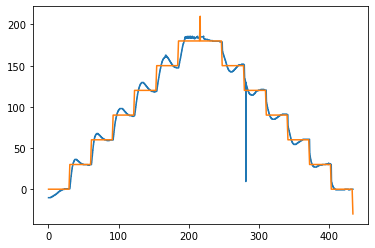

In [78]:
a=8400
ydata=df['angle']
ydata2=df['set_point']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
xdata=xdata[1:a]
pylab.plot(xdata, ydata, xdata, ydata2, label='data')

In [73]:
df[1:100]

,time,angle,pressure,set_point,motor_speed
1,0.09592960000009043,-7.37,0.14,0.00,37
2,0.2199064999986149,-7.37,0.14,0.00,38
3,0.2809815000000526,-7.37,0.36,0.00,39
4,0.32899079999879177,0.46,30,-7.37,0.00
5,0.37770029999956023,0.14,30,-7.37,0.00
...,...,...,...,...,...
95,4.903908099999171,-7.37,2.54,0.00,70
96,4.951695899999322,2.21,30,-7.37,0.00
97,4.997388499999943,-7.37,3.08,0.00,70
98,5.044033999998646,-7.37,2.54,0.00,70


In [69]:
pylab.plot(ydata, label='data')

Error in callback <function flush_figures at 0x000002099084F8B0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

#x = np.linspace(-1, 15, 50)
x=xdata
y = sigmoid(x, *popt)

pylab.plot(xdata, 27*ydata, 'o', label='data')
pylab.plot(x,27*y, label='fit')
#pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

In [ ]:
xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])

In [ ]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

#x = np.linspace(-1, 15, 50)
x=xdata
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

In [ ]:
i=0
j=0
degree=0
ser=star_communication('COM14')
bend_control(ser, 10)
values=feedback_data(ser)
to=time.perf_counter()
print('start')
with open("Dataset/dataset14.csv","a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','pressure','pressure_limit','angle','set_point','motor_speed'])
            
while (i<200):                      # Close loop controller
    j=j+1
    if j==400 and degree <= 180:
        degree=degree+30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open("Dataset/dataset14.csv","a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

In [ ]:
with open(".csv","a") as f:
    df = pd.read_csv("Dataset/dataset11.csv",delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.05)
    filter_presure = signal.filtfilt(b, a, df['pressure'])
    df = df.assign(Filtered_pressure=filter_presure)
    f.close()

In [ ]:
ydata=df['Filtered_pressure']
xdata=df['angle']
zdata=df['set_point']
ydata=ydata
xdata=xdata
pylab.plot(xdata, label='data')

In [ ]:
#Working code

In [102]:
i=0
j=0
name="Dataset/Jonathan_dataset18.csv"
steps=500
samples=7*steps
degree=0
ser=star_communication('COM9')
bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])
            
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=180
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM9')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

start
0 ['3.22' '0.14' '0.00' '0' '']
1 ['3.22' '0.14' '0.00' '-16' '']
2 ['3.22' '0.14' '0.00' '-16' '']
3 ['3.22' '0.14' '0.00' '-16' '']
4 ['3.22' '0.14' '0.00' '-16' '']
5 ['3.22' '0.14' '0.00' '-16' '']
6 ['3.22' '0.14' '0.00' '-16' '']
7 ['3.22' '0.14' '0.00' '-16' '']
8 ['3.22' '0.14' '0.00' '-16' '']
9 ['3.22' '0.14' '0.00' '-16' '']
10 ['3.22' '0.14' '0.00' '-16' '']
11 ['3.22' '0.03' '0.00' '-16' '']
12 ['3.22' '0.03' '0.00' '-16' '']
13 ['3.22' '0.14' '0.00' '-16' '']
14 ['3.22' '0.14' '0.00' '-16' '']
15 ['3.22' '0.14' '0.00' '-16' '']
16 ['3.22' '0.03' '0.00' '-16' '']
17 ['3.22' '0.14' '0.00' '-16' '']
18 ['3.22' '0.14' '0.00' '-16' '']
19 ['3.22' '0.14' '0.00' '-16' '']
20 ['3.22' '0.14' '0.00' '-16' '']
21 ['3.22' '0.14' '0.00' '-16' '']
22 ['3.22' '0.14' '0.00' '-16' '']
23 ['3.22' '0.14' '0.00' '-16' '']
24 ['3.22' '0.14' '0.00' '-16' '']
25 ['3.22' '0.14' '0.00' '-16' '']
26 ['3.22' '0.03' '0.00' '-16' '']
27 ['3.22' '0.14' '0.00' '-16' '']
28 ['3.22' '0.14' '0.00' '

235 ['3.22' '0.14' '0.00' '-16' '']
236 ['3.22' '0.14' '0.00' '-16' '']
237 ['3.22' '0.03' '0.00' '-16' '']
238 ['3.22' '0.03' '0.00' '-16' '']
239 ['3.22' '0.14' '0.00' '-16' '']
240 ['3.22' '0.14' '0.00' '-16' '']
241 ['3.22' '0.14' '0.00' '-16' '']
242 ['3.22' '0.14' '0.00' '-16' '']
243 ['3.22' '0.03' '0.00' '-16' '']
244 ['3.22' '0.14' '0.00' '-16' '']
245 ['3.22' '0.14' '0.00' '-16' '']
246 ['3.22' '0.14' '0.00' '-16' '']
247 ['3.22' '0.14' '0.00' '-16' '']
248 ['3.22' '0.14' '0.00' '-16' '']
249 ['3.22' '0.14' '0.00' '-16' '']
250 ['3.22' '0.14' '0.00' '-16' '']
251 ['3.22' '0.03' '0.00' '-16' '']
252 ['3.22' '0.14' '0.00' '-16' '']
253 ['3.22' '0.14' '0.00' '-16' '']
254 ['3.22' '0.14' '0.00' '-16' '']
255 ['3.22' '0.14' '0.00' '-16' '']
256 ['3.22' '0.14' '0.00' '-16' '']
257 ['3.22' '0.14' '0.00' '-16' '']
258 ['3.22' '0.14' '0.00' '-16' '']
259 ['3.22' '0.14' '0.00' '-16' '']
260 ['3.22' '0.14' '0.00' '-16' '']
261 ['3.22' '0.14' '0.00' '-16' '']
262 ['3.22' '0.14' '0.00' '-

463 ['3.22' '0.14' '0.00' '-16' '']
464 ['3.22' '0.14' '0.00' '-16' '']
465 ['3.22' '0.14' '0.00' '-16' '']
466 ['3.22' '0.14' '0.00' '-16' '']
467 ['3.22' '0.14' '0.00' '-16' '']
468 ['3.22' '0.03' '0.00' '-16' '']
469 ['3.22' '0.14' '0.00' '-16' '']
470 ['3.22' '0.14' '0.00' '-16' '']
471 ['3.22' '0.03' '0.00' '-16' '']
472 ['3.22' '0.14' '0.00' '-16' '']
473 ['3.22' '0.14' '0.00' '-16' '']
474 ['3.22' '0.14' '0.00' '-16' '']
475 ['3.22' '0.14' '0.00' '-16' '']
476 ['3.22' '0.03' '0.00' '-16' '']
477 ['3.22' '0.14' '0.00' '-16' '']
478 ['3.22' '0.14' '0.00' '-16' '']
479 ['3.22' '0.03' '0.00' '-16' '']
480 ['3.22' '0.14' '0.00' '-16' '']
481 ['3.22' '0.14' '0.00' '-16' '']
482 ['3.22' '0.14' '0.00' '-16' '']
483 ['3.22' '0.03' '0.00' '-16' '']
484 ['3.22' '0.14' '0.00' '-16' '']
485 ['3.22' '0.14' '0.00' '-16' '']
486 ['3.22' '0.14' '0.00' '-16' '']
487 ['3.22' '0.14' '0.00' '-16' '']
488 ['3.22' '0.14' '0.00' '-16' '']
489 ['3.22' '0.14' '0.00' '-16' '']
490 ['3.22' '0.14' '0.00' '-

685 ['10.59' '17.36' '30.00' '97' '']
686 ['10.59' '16.05' '30.00' '97' '']
687 ['10.59' '15.83' '30.00' '97' '']
688 ['10.59' '17.14' '30.00' '97' '']
689 ['10.59' '15.40' '30.00' '97' '']
690 ['10.59' '14.85' '30.00' '97' '']
691 ['10.59' '15.62' '30.00' '97' '']
692 ['10.59' '14.96' '30.00' '97' '']
693 ['10.59' '17.36' '30.00' '97' '']
694 ['10.59' '15.29' '30.00' '97' '']
695 ['10.59' '14.74' '30.00' '97' '']
696 ['10.59' '16.05' '30.00' '97' '']
697 ['10.59' '16.27' '30.00' '97' '']
698 ['10.59' '17.25' '30.00' '97' '']
699 ['10.59' '15.51' '30.00' '97' '']
700 ['10.59' '14.85' '30.00' '97' '']
701 ['10.59' '15.72' '30.00' '97' '']
702 ['10.59' '15.07' '30.00' '97' '']
703 ['10.59' '14.85' '30.00' '97' '']
704 ['10.59' '15.29' '30.00' '97' '']
705 ['10.59' '17.14' '30.00' '97' '']
706 ['10.59' '15.62' '30.00' '97' '']
707 ['10.59' '16.60' '30.00' '97' '']
708 ['10.59' '15.40' '30.00' '97' '']
709 ['10.59' '15.29' '30.00' '97' '']
710 ['10.59' '17.36' '30.00' '97' '']
711 ['10.59'

903 ['11.37' '16.27' '30.00' '93' '']
904 ['11.37' '15.62' '30.00' '93' '']
905 ['11.37' '17.36' '30.00' '93' '']
906 ['11.37' '16.60' '30.00' '93' '']
907 ['11.37' '15.72' '30.00' '93' '']
908 ['11.37' '15.07' '30.00' '93' '']
909 ['11.37' '16.92' '30.00' '93' '']
910 ['11.37' '15.29' '30.00' '93' '']
911 ['11.37' '17.14' '30.00' '93' '']
912 ['11.37' '16.92' '30.00' '93' '']
913 ['11.37' '15.72' '30.00' '93' '']
914 ['11.37' '16.16' '30.00' '93' '']
915 ['11.37' '17.14' '30.00' '93' '']
916 ['11.37' '15.72' '30.00' '93' '']
917 ['11.37' '14.96' '30.00' '93' '']
918 ['11.37' '17.03' '30.00' '93' '']
919 ['11.37' '15.18' '30.00' '93' '']
920 ['11.37' '15.62' '30.00' '93' '']
921 ['11.37' '16.92' '30.00' '93' '']
922 ['11.37' '15.94' '30.00' '93' '']
923 ['11.37' '15.29' '30.00' '93' '']
924 ['11.37' '14.74' '30.00' '93' '']
925 ['11.37' '16.27' '30.00' '93' '']
926 ['11.37' '15.62' '30.00' '93' '']
927 ['11.37' '17.25' '30.00' '93' '']
928 ['11.37' '14.96' '30.00' '93' '']
929 ['11.37'

1113 ['35.59' '21.61' '60.00' '122' '']
1114 ['35.59' '21.28' '60.00' '122' '']
1115 ['35.59' '22.59' '60.00' '122' '']
1116 ['35.59' '22.92' '60.00' '122' '']
1117 ['35.59' '23.46' '60.00' '122' '']
1118 ['35.59' '22.05' '60.00' '122' '']
1119 ['35.59' '21.72' '60.00' '122' '']
1120 ['36.42' '22.37' '60.00' '122' '']
1121 ['36.42' '22.70' '60.00' '122' '']
1122 ['36.42' '21.39' '60.00' '117' '']
1123 ['36.42' '21.94' '60.00' '117' '']
1124 ['36.42' '23.57' '60.00' '117' '']
1125 ['36.42' '21.72' '60.00' '117' '']
1126 ['36.42' '21.61' '60.00' '117' '']
1127 ['36.42' '21.50' '60.00' '117' '']
1128 ['36.42' '21.72' '60.00' '117' '']
1129 ['36.42' '21.39' '60.00' '117' '']
1130 ['36.42' '22.81' '60.00' '117' '']
1131 ['36.42' '21.94' '60.00' '117' '']
1132 ['36.42' '21.94' '60.00' '117' '']
1133 ['36.42' '21.94' '60.00' '117' '']
1134 ['36.42' '21.28' '60.00' '117' '']
1135 ['36.42' '22.37' '60.00' '117' '']
1136 ['36.42' '21.28' '60.00' '117' '']
1137 ['36.42' '22.37' '60.00' '117' '']


1321 ['36.22' '-0.19' '60.00' '118' '']
1322 ['36.22' '0.68' '60.00' '118' '']
1323 ['36.22' '0.90' '60.00' '118' '']
1324 ['36.22' '0.57' '60.00' '118' '']
1325 ['36.22' '0.03' '60.00' '118' '']
1326 ['36.22' '0.46' '60.00' '118' '']
1327 ['33.45' '0.25' '60.00' '124' '']
1328 ['24.48' '0.14' '60.00' '124' '']
1329 ['10.82' '2.10' '60.00' '124' '']
1330 ['3.66' '1.66' '60.00' '245' '']
1331 ['3.66' '0.36' '60.00' '245' '']
1332 ['3.66' '1.55' '60.00' '255' '']
1333 ['3.66' '4.06' '60.00' '255' '']
1334 ['3.66' '2.75' '60.00' '255' '']
1335 ['3.66' '1.34' '60.00' '255' '']
1336 ['3.66' '1.01' '60.00' '255' '']
1337 ['3.66' '3.84' '60.00' '255' '']
1338 ['3.66' '1.77' '60.00' '255' '']
1339 ['3.66' '0.46' '60.00' '255' '']
1340 ['3.66' '0.14' '60.00' '255' '']
1341 ['3.66' '3.41' '60.00' '255' '']
1342 ['3.66' '4.50' '60.00' '255' '']
1343 ['3.66' '1.66' '60.00' '255' '']
1344 ['3.66' '0.36' '60.00' '255' '']
1345 ['3.66' '0.46' '60.00' '255' '']
1346 ['3.66' '2.32' '60.00' '255' '']
13

1535 ['42.80' '23.35' '90.00' '241' '']
1536 ['43.78' '23.46' '90.00' '235' '']
1537 ['44.59' '23.14' '90.00' '235' '']
1538 ['44.59' '23.46' '90.00' '227' '']
1539 ['45.44' '23.03' '90.00' '227' '']
1540 ['45.44' '22.81' '90.00' '222' '']
1541 ['46.33' '23.03' '90.00' '222' '']
1542 ['46.33' '23.68' '90.00' '218' '']
1543 ['47.26' '24.55' '90.00' '218' '']
1544 ['47.26' '23.25' '90.00' '218' '']
1545 ['48.09' '23.35' '90.00' '213' '']
1546 ['48.09' '25.86' '90.00' '213' '']
1547 ['48.89' '23.46' '90.00' '209' '']
1548 ['48.89' '23.03' '90.00' '209' '']
1549 ['48.89' '23.79' '90.00' '205' '']
1550 ['49.67' '26.41' '90.00' '205' '']
1551 ['50.55' '24.55' '90.00' '205' '']
1552 ['50.55' '23.14' '90.00' '197' '']
1553 ['50.55' '23.14' '90.00' '197' '']
1554 ['51.30' '23.14' '90.00' '197' '']
1555 ['52.06' '25.86' '90.00' '197' '']
1556 ['52.06' '25.64' '90.00' '189' '']
1557 ['52.06' '23.03' '90.00' '189' '']
1558 ['52.06' '23.03' '90.00' '189' '']
1559 ['52.93' '23.57' '90.00' '189' '']


1741 ['64.39' '24.55' '90.00' '128' '']
1742 ['64.39' '23.25' '90.00' '128' '']
1743 ['64.39' '23.35' '90.00' '128' '']
1744 ['64.39' '23.68' '90.00' '128' '']
1745 ['64.39' '23.14' '90.00' '128' '']
1746 ['64.39' '23.25' '90.00' '128' '']
1747 ['64.39' '22.92' '90.00' '128' '']
1748 ['64.39' '23.46' '90.00' '128' '']
1749 ['64.39' '22.92' '90.00' '128' '']
1750 ['64.39' '22.92' '90.00' '128' '']
1751 ['64.39' '24.99' '90.00' '128' '']
1752 ['64.39' '23.14' '90.00' '128' '']
1753 ['64.39' '23.25' '90.00' '128' '']
1754 ['64.39' '23.57' '90.00' '128' '']
1755 ['64.39' '25.64' '90.00' '128' '']
1756 ['64.39' '23.25' '90.00' '128' '']
1757 ['64.39' '23.35' '90.00' '128' '']
1758 ['64.39' '23.90' '90.00' '128' '']
1759 ['64.39' '23.14' '90.00' '128' '']
1760 ['64.39' '23.35' '90.00' '128' '']
1761 ['64.39' '23.68' '90.00' '128' '']
1762 ['64.39' '23.14' '90.00' '128' '']
1763 ['65.15' '22.92' '90.00' '128' '']
1764 ['65.15' '22.92' '90.00' '124' '']
1765 ['65.15' '23.68' '90.00' '124' '']


1948 ['64.35' '23.25' '90.00' '128' '']
1949 ['64.35' '24.34' '90.00' '128' '']
1950 ['64.35' '25.10' '90.00' '128' '']
1951 ['64.35' '23.68' '90.00' '128' '']
1952 ['64.35' '25.86' '90.00' '128' '']
1953 ['64.35' '22.81' '90.00' '128' '']
1954 ['64.35' '24.34' '90.00' '128' '']
1955 ['64.35' '24.23' '90.00' '128' '']
1956 ['64.35' '23.68' '90.00' '128' '']
1957 ['64.35' '24.44' '90.00' '128' '']
1958 ['64.35' '24.34' '90.00' '128' '']
1959 ['64.35' '23.90' '90.00' '128' '']
1960 ['64.35' '23.35' '90.00' '128' '']
1961 ['64.35' '23.03' '90.00' '128' '']
1962 ['64.35' '22.81' '90.00' '128' '']
1963 ['64.35' '23.25' '90.00' '128' '']
1964 ['64.35' '23.57' '90.00' '128' '']
1965 ['64.35' '23.03' '90.00' '128' '']
1966 ['64.35' '22.81' '90.00' '128' '']
1967 ['64.35' '23.79' '90.00' '128' '']
1968 ['64.35' '23.46' '90.00' '128' '']
1969 ['64.35' '22.92' '90.00' '128' '']
1970 ['64.35' '22.81' '90.00' '128' '']
1971 ['64.35' '23.46' '90.00' '128' '']
1972 ['64.35' '24.34' '90.00' '128' '']


2152 ['94.76' '23.46' '120.00' '126' '']
2153 ['94.76' '23.14' '120.00' '126' '']
2154 ['94.76' '23.25' '120.00' '126' '']
2155 ['94.76' '24.66' '120.00' '126' '']
2156 ['94.76' '24.34' '120.00' '126' '']
2157 ['94.76' '23.79' '120.00' '126' '']
2158 ['94.76' '23.35' '120.00' '126' '']
2159 ['94.76' '24.34' '120.00' '126' '']
2160 ['94.76' '23.79' '120.00' '126' '']
2161 ['94.76' '23.35' '120.00' '126' '']
2162 ['94.76' '25.21' '120.00' '126' '']
2163 ['94.76' '25.32' '120.00' '126' '']
2164 ['94.76' '24.55' '120.00' '126' '']
2165 ['94.76' '25.32' '120.00' '126' '']
2166 ['94.76' '23.90' '120.00' '126' '']
2167 ['94.76' '23.35' '120.00' '126' '']
2168 ['94.76' '23.46' '120.00' '126' '']
2169 ['94.76' '23.79' '120.00' '126' '']
2170 ['94.76' '23.25' '120.00' '126' '']
2171 ['94.76' '23.14' '120.00' '126' '']
2172 ['94.76' '23.14' '120.00' '126' '']
2173 ['94.76' '23.57' '120.00' '126' '']
2174 ['94.76' '23.14' '120.00' '126' '']
2175 ['94.76' '23.14' '120.00' '126' '']
2176 ['94.76' '2

2354 ['94.67' '24.77' '120.00' '126' '']
2355 ['94.67' '25.10' '120.00' '126' '']
2356 ['94.67' '25.32' '120.00' '126' '']
2357 ['94.67' '25.32' '120.00' '126' '']
2358 ['94.67' '23.35' '120.00' '126' '']
2359 ['94.67' '23.14' '120.00' '126' '']
2360 ['94.67' '24.66' '120.00' '126' '']
2361 ['94.67' '24.77' '120.00' '126' '']
2362 ['94.67' '25.10' '120.00' '126' '']
2363 ['94.67' '25.43' '120.00' '126' '']
2364 ['94.67' '25.32' '120.00' '126' '']
2365 ['94.67' '23.35' '120.00' '126' '']
2366 ['94.67' '23.35' '120.00' '126' '']
2367 ['94.67' '23.25' '120.00' '126' '']
2368 ['94.67' '24.88' '120.00' '126' '']
2369 ['94.67' '23.57' '120.00' '126' '']
2370 ['94.67' '23.03' '120.00' '126' '']
2371 ['94.67' '23.03' '120.00' '126' '']
2372 ['94.67' '24.55' '120.00' '126' '']
2373 ['94.67' '24.66' '120.00' '126' '']
2374 ['94.67' '24.66' '120.00' '126' '']
2375 ['94.67' '23.68' '120.00' '126' '']
2376 ['94.67' '23.03' '120.00' '126' '']
2377 ['94.67' '23.03' '120.00' '126' '']
2378 ['94.67' '2

2554 ['115.31' '24.88' '150.00' '177' '']
2555 ['115.31' '23.57' '150.00' '173' '']
2556 ['115.31' '25.86' '150.00' '173' '']
2557 ['115.31' '24.23' '150.00' '173' '']
2558 ['115.31' '23.25' '150.00' '173' '']
2559 ['116.12' '24.77' '150.00' '169' '']
2560 ['116.12' '24.01' '150.00' '169' '']
2561 ['116.12' '26.08' '150.00' '169' '']
2562 ['116.12' '24.66' '150.00' '169' '']
2563 ['116.12' '24.01' '150.00' '169' '']
2564 ['116.88' '23.14' '150.00' '169' '']
2565 ['116.88' '23.90' '150.00' '165' '']
2566 ['116.88' '25.32' '150.00' '165' '']
2567 ['116.88' '24.88' '150.00' '165' '']
2568 ['116.88' '24.01' '150.00' '165' '']
2569 ['117.69' '23.79' '150.00' '165' '']
2570 ['117.69' '23.35' '150.00' '165' '']
2571 ['117.69' '23.14' '150.00' '161' '']
2572 ['117.69' '23.14' '150.00' '161' '']
2573 ['117.69' '23.14' '150.00' '161' '']
2574 ['117.69' '23.14' '150.00' '161' '']
2575 ['117.69' '23.14' '150.00' '161' '']
2576 ['117.69' '23.14' '150.00' '161' '']
2577 ['118.62' '23.03' '150.00' '1

2753 ['124.12' '25.10' '150.00' '129' '']
2754 ['124.12' '24.55' '150.00' '129' '']
2755 ['124.12' '24.34' '150.00' '129' '']
2756 ['124.12' '25.10' '150.00' '129' '']
2757 ['124.12' '24.44' '150.00' '129' '']
2758 ['124.12' '24.34' '150.00' '129' '']
2759 ['124.12' '23.14' '150.00' '129' '']
2760 ['124.12' '23.14' '150.00' '129' '']
2761 ['124.12' '24.12' '150.00' '129' '']
2762 ['124.12' '25.75' '150.00' '129' '']
2763 ['124.12' '25.10' '150.00' '129' '']
2764 ['124.12' '25.10' '150.00' '129' '']
2765 ['124.12' '24.44' '150.00' '129' '']
2766 ['124.12' '24.34' '150.00' '129' '']
2767 ['124.12' '25.53' '150.00' '129' '']
2768 ['124.12' '22.81' '150.00' '129' '']
2769 ['124.12' '23.68' '150.00' '129' '']
2770 ['124.12' '23.25' '150.00' '129' '']
2771 ['124.12' '22.81' '150.00' '129' '']
2772 ['124.12' '23.57' '150.00' '129' '']
2773 ['124.12' '23.14' '150.00' '129' '']
2774 ['124.12' '22.92' '150.00' '129' '']
2775 ['124.12' '25.10' '150.00' '129' '']
2776 ['124.12' '24.77' '150.00' '1

2951 ['124.88' '22.70' '150.00' '125' '']
2952 ['124.88' '22.81' '150.00' '125' '']
2953 ['124.88' '23.14' '150.00' '125' '']
2954 ['124.88' '23.46' '150.00' '125' '']
2955 ['124.88' '23.79' '150.00' '125' '']
2956 ['124.88' '23.03' '150.00' '125' '']
2957 ['124.88' '23.14' '150.00' '125' '']
2958 ['124.88' '23.46' '150.00' '125' '']
2959 ['124.88' '23.79' '150.00' '125' '']
2960 ['124.88' '24.34' '150.00' '125' '']
2961 ['124.88' '22.70' '150.00' '125' '']
2962 ['124.88' '22.92' '150.00' '125' '']
2963 ['124.88' '25.10' '150.00' '125' '']
2964 ['124.88' '24.88' '150.00' '125' '']
2965 ['124.88' '25.64' '150.00' '125' '']
2966 ['124.88' '22.81' '150.00' '125' '']
2967 ['124.88' '22.70' '150.00' '125' '']
2968 ['124.88' '22.70' '150.00' '125' '']
2969 ['124.88' '24.12' '150.00' '125' '']
2970 ['124.88' '22.81' '150.00' '125' '']
2971 ['124.88' '22.70' '150.00' '125' '']
2972 ['124.88' '25.64' '150.00' '125' '']
2973 ['124.88' '23.57' '150.00' '125' '']
2974 ['124.88' '23.35' '150.00' '1

3148 ['152.27' '26.08' '180.00' '138' '']
3149 ['152.27' '23.57' '180.00' '138' '']
3150 ['152.27' '26.19' '180.00' '138' '']
3151 ['153.15' '23.35' '180.00' '138' '']
3152 ['153.15' '23.79' '180.00' '138' '']
3153 ['153.15' '23.68' '180.00' '134' '']
3154 ['153.15' '26.19' '180.00' '134' '']
3155 ['153.15' '23.35' '180.00' '134' '']
3156 ['153.15' '24.99' '180.00' '134' '']
3157 ['153.15' '23.25' '180.00' '134' '']
3158 ['153.15' '24.55' '180.00' '134' '']
3159 ['153.15' '23.14' '180.00' '134' '']
3160 ['153.15' '24.99' '180.00' '134' '']
3161 ['153.15' '23.25' '180.00' '134' '']
3162 ['153.90' '24.44' '180.00' '134' '']
3163 ['153.90' '23.46' '180.00' '134' '']
3164 ['153.90' '24.01' '180.00' '130' '']
3165 ['153.90' '23.14' '180.00' '130' '']
3166 ['153.90' '23.14' '180.00' '130' '']
3167 ['153.90' '24.01' '180.00' '130' '']
3168 ['153.90' '23.57' '180.00' '130' '']
3169 ['153.90' '25.21' '180.00' '130' '']
3170 ['153.90' '25.43' '180.00' '130' '']
3171 ['153.90' '23.46' '180.00' '1

3344 ['154.72' '23.35' '180.00' '126' '']
3345 ['154.72' '23.35' '180.00' '126' '']
3346 ['154.72' '23.25' '180.00' '126' '']
3347 ['154.72' '23.35' '180.00' '126' '']
3348 ['154.72' '23.35' '180.00' '126' '']
3349 ['154.72' '23.46' '180.00' '126' '']
3350 ['154.72' '25.32' '180.00' '126' '']
3351 ['154.72' '22.92' '180.00' '126' '']
3352 ['154.72' '22.92' '180.00' '126' '']
3353 ['154.72' '24.34' '180.00' '126' '']
3354 ['154.72' '24.44' '180.00' '126' '']
3355 ['154.72' '24.44' '180.00' '126' '']
3356 ['154.72' '22.92' '180.00' '126' '']
3357 ['154.72' '25.32' '180.00' '126' '']
3358 ['154.72' '22.92' '180.00' '126' '']
3359 ['154.72' '22.92' '180.00' '126' '']
3360 ['154.72' '22.92' '180.00' '126' '']
3361 ['154.72' '22.92' '180.00' '126' '']
3362 ['154.72' '26.08' '180.00' '126' '']
3363 ['154.72' '25.75' '180.00' '126' '']
3364 ['154.72' '23.90' '180.00' '126' '']
3365 ['154.72' '23.03' '180.00' '126' '']
3366 ['154.72' '22.92' '180.00' '126' '']
3367 ['154.72' '22.92' '180.00' '1

43 ['155.55' '22.92' '180.00' '122' '']
44 ['155.55' '25.86' '180.00' '122' '']
45 ['155.55' '23.57' '180.00' '122' '']
46 ['155.55' '23.14' '180.00' '122' '']
47 ['155.55' '22.92' '180.00' '122' '']
48 ['155.55' '25.97' '180.00' '122' '']
49 ['155.55' '22.92' '180.00' '122' '']
50 ['155.55' '23.14' '180.00' '122' '']
51 ['155.55' '22.92' '180.00' '122' '']
52 ['155.55' '23.68' '180.00' '122' '']
53 ['155.55' '23.57' '180.00' '122' '']
54 ['155.55' '23.14' '180.00' '122' '']
55 ['155.55' '22.92' '180.00' '122' '']
56 ['155.55' '23.68' '180.00' '122' '']
57 ['155.55' '23.57' '180.00' '122' '']
58 ['155.55' '23.03' '180.00' '122' '']
59 ['155.55' '22.92' '180.00' '122' '']
60 ['155.55' '25.97' '180.00' '122' '']
61 ['155.55' '22.92' '180.00' '122' '']
62 ['155.55' '25.86' '180.00' '122' '']
63 ['155.55' '22.92' '180.00' '122' '']
64 ['155.55' '23.79' '180.00' '122' '']
65 ['155.55' '24.55' '180.00' '122' '']
66 ['155.55' '23.14' '180.00' '122' '']
67 ['155.55' '22.92' '180.00' '122' '']


248 ['155.51' '22.92' '180.00' '122' '']
249 ['155.51' '25.32' '180.00' '122' '']
250 ['155.51' '24.44' '180.00' '122' '']
251 ['155.51' '22.81' '180.00' '122' '']
252 ['155.51' '23.35' '180.00' '122' '']
253 ['155.51' '23.79' '180.00' '122' '']
254 ['155.51' '23.25' '180.00' '122' '']
255 ['155.51' '22.81' '180.00' '122' '']
256 ['155.51' '23.57' '180.00' '122' '']
257 ['155.51' '23.68' '180.00' '122' '']
258 ['155.51' '23.46' '180.00' '122' '']
259 ['155.51' '24.34' '180.00' '122' '']
260 ['155.51' '23.14' '180.00' '122' '']
261 ['155.51' '22.81' '180.00' '122' '']
262 ['155.51' '23.57' '180.00' '122' '']
263 ['155.51' '23.57' '180.00' '122' '']
264 ['155.51' '23.03' '180.00' '122' '']
265 ['155.51' '22.92' '180.00' '122' '']
266 ['155.51' '24.01' '180.00' '122' '']
267 ['155.51' '23.35' '180.00' '122' '']
268 ['155.51' '24.01' '180.00' '122' '']
269 ['155.51' '23.35' '180.00' '122' '']
270 ['155.51' '22.81' '180.00' '122' '']
271 ['155.51' '23.25' '180.00' '122' '']
272 ['155.51' '2

450 ['155.56' '25.32' '180.00' '122' '']
451 ['154.80' '23.03' '180.00' '122' '']
452 ['154.80' '22.92' '180.00' '122' '']
453 ['154.80' '22.81' '180.00' '125' '']
454 ['154.80' '23.68' '180.00' '125' '']
455 ['154.80' '24.34' '180.00' '125' '']
456 ['154.80' '24.55' '180.00' '125' '']
457 ['154.80' '25.32' '180.00' '125' '']
458 ['154.80' '25.32' '180.00' '125' '']
459 ['154.80' '23.03' '180.00' '125' '']
460 ['154.80' '24.12' '180.00' '125' '']
461 ['154.80' '23.14' '180.00' '125' '']
462 ['154.80' '23.57' '180.00' '125' '']
463 ['154.80' '25.43' '180.00' '125' '']
464 ['154.80' '23.57' '180.00' '125' '']
465 ['154.80' '24.23' '180.00' '125' '']
466 ['154.80' '24.44' '180.00' '125' '']
467 ['154.80' '23.46' '180.00' '125' '']
468 ['154.80' '22.92' '180.00' '125' '']
469 ['154.80' '24.55' '180.00' '125' '']
470 ['154.80' '23.25' '180.00' '125' '']
471 ['154.80' '23.25' '180.00' '125' '']
472 ['154.80' '25.10' '180.00' '125' '']
473 ['154.80' '25.97' '180.00' '125' '']
474 ['154.80' '2

653 ['126.92' '23.90' '150.00' '115' '']
654 ['126.92' '22.16' '150.00' '115' '']
655 ['126.92' '23.14' '150.00' '115' '']
656 ['126.15' '23.25' '150.00' '115' '']
657 ['126.15' '22.05' '150.00' '119' '']
658 ['126.15' '22.37' '150.00' '119' '']
659 ['126.15' '22.92' '150.00' '119' '']
660 ['126.15' '24.44' '150.00' '119' '']
661 ['126.15' '22.59' '150.00' '119' '']
662 ['126.15' '24.66' '150.00' '119' '']
663 ['126.15' '22.81' '150.00' '119' '']
664 ['126.15' '22.81' '150.00' '119' '']
665 ['126.15' '22.16' '150.00' '119' '']
666 ['126.15' '23.79' '150.00' '119' '']
667 ['126.15' '23.79' '150.00' '119' '']
668 ['126.15' '23.25' '150.00' '119' '']
669 ['126.15' '22.16' '150.00' '119' '']
670 ['126.15' '24.66' '150.00' '119' '']
671 ['126.15' '22.37' '150.00' '119' '']
672 ['126.15' '22.92' '150.00' '119' '']
673 ['126.15' '22.59' '150.00' '119' '']
674 ['126.15' '22.59' '150.00' '119' '']
675 ['126.15' '24.77' '150.00' '119' '']
676 ['126.15' '22.81' '150.00' '119' '']
677 ['126.15' '2

854 ['125.36' '24.88' '150.00' '123' '']
855 ['125.36' '23.25' '150.00' '123' '']
856 ['125.36' '22.16' '150.00' '123' '']
857 ['125.36' '24.77' '150.00' '123' '']
858 ['125.36' '22.26' '150.00' '123' '']
859 ['125.36' '23.79' '150.00' '123' '']
860 ['125.36' '22.70' '150.00' '123' '']
861 ['125.36' '24.23' '150.00' '123' '']
862 ['125.36' '22.26' '150.00' '123' '']
863 ['125.36' '25.21' '150.00' '123' '']
864 ['125.36' '22.26' '150.00' '123' '']
865 ['125.36' '22.59' '150.00' '123' '']
866 ['125.36' '22.48' '150.00' '123' '']
867 ['125.36' '22.26' '150.00' '123' '']
868 ['125.36' '22.59' '150.00' '123' '']
869 ['125.36' '22.16' '150.00' '123' '']
870 ['125.36' '22.48' '150.00' '123' '']
871 ['125.36' '23.79' '150.00' '123' '']
872 ['125.36' '22.70' '150.00' '123' '']
873 ['125.36' '22.37' '150.00' '123' '']
874 ['125.36' '23.90' '150.00' '123' '']
875 ['125.36' '24.88' '150.00' '123' '']
876 ['125.36' '23.14' '150.00' '123' '']
877 ['125.36' '22.59' '150.00' '123' '']
878 ['125.36' '2

1057 ['98.41' '24.01' '120.00' '107' '']
1058 ['98.41' '21.83' '120.00' '107' '']
1059 ['98.41' '22.81' '120.00' '107' '']
1060 ['98.41' '22.48' '120.00' '107' '']
1061 ['98.41' '24.77' '120.00' '107' '']
1062 ['98.41' '22.26' '120.00' '107' '']
1063 ['98.41' '22.48' '120.00' '107' '']
1064 ['97.57' '22.26' '120.00' '107' '']
1065 ['97.57' '21.83' '120.00' '107' '']
1066 ['97.57' '23.14' '120.00' '112' '']
1067 ['97.57' '22.05' '120.00' '112' '']
1068 ['97.57' '23.14' '120.00' '112' '']
1069 ['97.57' '21.94' '120.00' '112' '']
1070 ['97.57' '21.83' '120.00' '112' '']
1071 ['97.57' '24.23' '120.00' '112' '']
1072 ['97.57' '21.94' '120.00' '112' '']
1073 ['97.57' '22.26' '120.00' '112' '']
1074 ['97.57' '23.46' '120.00' '112' '']
1075 ['97.57' '23.03' '120.00' '112' '']
1076 ['97.57' '22.16' '120.00' '112' '']
1077 ['97.57' '23.14' '120.00' '112' '']
1078 ['97.57' '22.05' '120.00' '112' '']
1079 ['97.57' '23.57' '120.00' '112' '']
1080 ['97.57' '23.46' '120.00' '112' '']
1081 ['97.57' '2

1259 ['95.25' '23.35' '120.00' '123' '']
1260 ['95.25' '24.44' '120.00' '123' '']
1261 ['95.25' '25.32' '120.00' '123' '']
1262 ['95.25' '22.70' '120.00' '123' '']
1263 ['95.25' '24.55' '120.00' '123' '']
1264 ['95.25' '22.92' '120.00' '123' '']
1265 ['95.25' '24.66' '120.00' '123' '']
1266 ['95.25' '24.88' '120.00' '123' '']
1267 ['95.25' '22.70' '120.00' '123' '']
1268 ['95.25' '22.92' '120.00' '123' '']
1269 ['95.25' '23.68' '120.00' '123' '']
1270 ['95.25' '25.10' '120.00' '123' '']
1271 ['95.25' '22.92' '120.00' '123' '']
1272 ['95.25' '22.59' '120.00' '123' '']
1273 ['95.25' '23.57' '120.00' '123' '']
1274 ['95.25' '24.55' '120.00' '123' '']
1275 ['95.25' '25.21' '120.00' '123' '']
1276 ['95.25' '22.59' '120.00' '123' '']
1277 ['95.25' '22.26' '120.00' '123' '']
1278 ['95.25' '23.79' '120.00' '123' '']
1279 ['95.25' '24.55' '120.00' '123' '']
1280 ['95.25' '22.05' '120.00' '123' '']
1281 ['95.25' '24.66' '120.00' '123' '']
1282 ['95.25' '24.77' '120.00' '123' '']
1283 ['95.25' '2

1460 ['95.21' '22.26' '120.00' '123' '']
1461 ['95.21' '25.10' '120.00' '123' '']
1462 ['95.21' '22.81' '120.00' '123' '']
1463 ['95.21' '22.81' '120.00' '123' '']
1464 ['95.21' '23.79' '120.00' '123' '']
1465 ['95.21' '24.55' '120.00' '123' '']
1466 ['95.21' '23.25' '120.00' '123' '']
1467 ['95.21' '22.26' '120.00' '123' '']
1468 ['95.21' '23.25' '120.00' '123' '']
1469 ['95.21' '24.23' '120.00' '123' '']
1470 ['95.21' '22.81' '120.00' '123' '']
1471 ['95.21' '23.68' '120.00' '123' '']
1472 ['95.21' '24.34' '120.00' '123' '']
1473 ['95.21' '22.05' '120.00' '123' '']
1474 ['95.21' '22.37' '120.00' '123' '']
1475 ['95.21' '23.35' '120.00' '123' '']
1476 ['95.21' '24.55' '120.00' '123' '']
1477 ['95.21' '25.32' '120.00' '123' '']
1478 ['95.21' '22.70' '120.00' '123' '']
1479 ['95.21' '22.26' '120.00' '123' '']
1480 ['95.21' '23.68' '120.00' '123' '']
1481 ['95.21' '22.37' '120.00' '123' '']
1482 ['95.21' '23.57' '120.00' '123' '']
1483 ['95.21' '24.55' '120.00' '123' '']
1484 ['95.21' '2

1666 ['65.23' '22.48' '90.00' '123' '']
1667 ['65.23' '21.94' '90.00' '123' '']
1668 ['65.23' '21.83' '90.00' '123' '']
1669 ['65.23' '22.59' '90.00' '123' '']
1670 ['65.23' '21.94' '90.00' '123' '']
1671 ['65.23' '21.83' '90.00' '123' '']
1672 ['65.23' '24.01' '90.00' '123' '']
1673 ['65.23' '22.70' '90.00' '123' '']
1674 ['65.23' '22.16' '90.00' '123' '']
1675 ['65.23' '24.88' '90.00' '123' '']
1676 ['65.23' '22.37' '90.00' '123' '']
1677 ['65.23' '22.70' '90.00' '123' '']
1678 ['65.23' '23.46' '90.00' '123' '']
1679 ['65.23' '22.05' '90.00' '123' '']
1680 ['65.23' '21.72' '90.00' '123' '']
1681 ['65.23' '22.26' '90.00' '123' '']
1682 ['65.23' '23.46' '90.00' '123' '']
1683 ['65.23' '24.44' '90.00' '123' '']
1684 ['65.23' '22.26' '90.00' '123' '']
1685 ['65.23' '21.83' '90.00' '123' '']
1686 ['65.23' '21.83' '90.00' '123' '']
1687 ['65.23' '22.70' '90.00' '123' '']
1688 ['65.23' '22.48' '90.00' '123' '']
1689 ['65.23' '22.05' '90.00' '123' '']
1690 ['65.23' '23.46' '90.00' '123' '']


1874 ['65.93' '24.44' '90.00' '120' '']
1875 ['65.93' '21.94' '90.00' '120' '']
1876 ['65.93' '22.81' '90.00' '120' '']
1877 ['65.93' '21.94' '90.00' '120' '']
1878 ['65.93' '22.81' '90.00' '120' '']
1879 ['65.93' '24.88' '90.00' '120' '']
1880 ['65.93' '22.26' '90.00' '120' '']
1881 ['65.93' '24.23' '90.00' '120' '']
1882 ['65.93' '22.37' '90.00' '120' '']
1883 ['65.93' '22.05' '90.00' '120' '']
1884 ['65.93' '24.34' '90.00' '120' '']
1885 ['65.93' '21.94' '90.00' '120' '']
1886 ['65.93' '23.79' '90.00' '120' '']
1887 ['65.93' '22.70' '90.00' '120' '']
1888 ['65.93' '21.83' '90.00' '120' '']
1889 ['65.93' '22.81' '90.00' '120' '']
1890 ['65.93' '21.94' '90.00' '120' '']
1891 ['65.93' '23.25' '90.00' '120' '']
1892 ['65.93' '23.25' '90.00' '120' '']
1893 ['65.93' '24.12' '90.00' '120' '']
1894 ['65.93' '22.05' '90.00' '120' '']
1895 ['65.93' '22.70' '90.00' '120' '']
1896 ['65.93' '22.16' '90.00' '120' '']
1897 ['65.93' '22.48' '90.00' '120' '']
1898 ['65.93' '24.23' '90.00' '120' '']


2081 ['37.93' '21.61' '60.00' '110' '']
2082 ['37.93' '20.08' '60.00' '110' '']
2083 ['37.93' '22.48' '60.00' '110' '']
2084 ['37.93' '22.16' '60.00' '110' '']
2085 ['37.93' '21.50' '60.00' '110' '']
2086 ['37.93' '21.50' '60.00' '110' '']
2087 ['37.93' '20.41' '60.00' '110' '']
2088 ['37.93' '21.72' '60.00' '110' '']
2089 ['37.93' '20.74' '60.00' '110' '']
2090 ['37.93' '20.96' '60.00' '110' '']
2091 ['37.93' '20.52' '60.00' '110' '']
2092 ['37.93' '20.08' '60.00' '110' '']
2093 ['37.93' '20.85' '60.00' '110' '']
2094 ['37.93' '20.63' '60.00' '110' '']
2095 ['37.93' '21.94' '60.00' '110' '']
2096 ['37.93' '22.81' '60.00' '110' '']
2097 ['37.17' '22.05' '60.00' '110' '']
2098 ['37.17' '19.98' '60.00' '114' '']
2099 ['37.17' '19.98' '60.00' '114' '']
2100 ['37.17' '22.81' '60.00' '114' '']
2101 ['37.17' '19.98' '60.00' '114' '']
2102 ['37.17' '20.85' '60.00' '114' '']
2103 ['37.17' '19.87' '60.00' '114' '']
2104 ['37.17' '22.70' '60.00' '114' '']
2105 ['37.17' '20.08' '60.00' '114' '']


2286 ['37.17' '22.37' '60.00' '114' '']
2287 ['37.17' '21.83' '60.00' '114' '']
2288 ['37.17' '20.52' '60.00' '114' '']
2289 ['37.17' '21.61' '60.00' '114' '']
2290 ['37.17' '20.74' '60.00' '114' '']
2291 ['37.17' '20.19' '60.00' '114' '']
2292 ['37.17' '21.50' '60.00' '114' '']
2293 ['37.17' '20.85' '60.00' '114' '']
2294 ['37.17' '22.48' '60.00' '114' '']
2295 ['37.17' '20.08' '60.00' '114' '']
2296 ['37.17' '21.61' '60.00' '114' '']
2297 ['37.17' '20.63' '60.00' '114' '']
2298 ['37.17' '23.03' '60.00' '114' '']
2299 ['37.17' '19.98' '60.00' '114' '']
2300 ['37.17' '21.61' '60.00' '114' '']
2301 ['37.17' '20.52' '60.00' '114' '']
2302 ['37.17' '23.25' '60.00' '114' '']
2303 ['37.17' '19.87' '60.00' '114' '']
2304 ['37.17' '22.16' '60.00' '114' '']
2305 ['37.17' '20.41' '60.00' '114' '']
2306 ['37.17' '21.39' '60.00' '114' '']
2307 ['37.17' '19.87' '60.00' '114' '']
2308 ['37.17' '22.59' '60.00' '114' '']
2309 ['37.17' '20.74' '60.00' '114' '']
2310 ['37.17' '21.28' '60.00' '114' '']


2495 ['37.21' '20.08' '60.00' '113' '']
2496 ['37.21' '21.72' '60.00' '113' '']
2497 ['37.21' '20.74' '60.00' '113' '']
2498 ['37.21' '21.17' '60.00' '113' '']
2499 ['37.21' '19.98' '30.00' '113' '']
2500 ['37.21' '18.99' '30.00' '-36' '']
2501 ['32.38' '13.54' '30.00' '-36' '']
2502 ['24.57' '18.01' '30.00' '3' '']
2503 ['23.35' '18.01' '30.00' '3' '']
2504 ['23.35' '18.01' '30.00' '33' '']
2505 ['22.59' '18.01' '30.00' '33' '']
2506 ['22.59' '17.90' '30.00' '37' '']
2507 ['22.59' '18.01' '30.00' '37' '']
2508 ['21.81' '17.80' '30.00' '40' '']
2509 ['21.81' '17.80' '30.00' '40' '']
2510 ['21.81' '17.80' '30.00' '40' '']
2511 ['20.95' '17.69' '30.00' '40' '']
2512 ['20.95' '17.69' '30.00' '40' '']
2513 ['20.20' '17.47' '30.00' '45' '']
2514 ['20.20' '17.47' '30.00' '45' '']
2515 ['20.20' '17.36' '30.00' '49' '']
2516 ['20.20' '17.36' '30.00' '49' '']
2517 ['19.34' '17.25' '30.00' '53' '']
2518 ['19.34' '17.25' '30.00' '53' '']
2519 ['19.34' '17.14' '30.00' '53' '']
2520 ['18.54' '17.03

2707 ['11.35' '15.72' '30.00' '93' '']
2708 ['11.35' '15.72' '30.00' '93' '']
2709 ['11.35' '14.85' '30.00' '93' '']
2710 ['11.35' '13.76' '30.00' '93' '']
2711 ['11.35' '15.62' '30.00' '93' '']
2712 ['11.35' '16.16' '30.00' '93' '']
2713 ['11.35' '15.29' '30.00' '93' '']
2714 ['11.35' '14.42' '30.00' '93' '']
2715 ['11.35' '13.65' '30.00' '93' '']
2716 ['11.35' '15.72' '30.00' '93' '']
2717 ['11.35' '14.85' '30.00' '93' '']
2718 ['11.35' '13.87' '30.00' '93' '']
2719 ['11.35' '13.76' '30.00' '93' '']
2720 ['11.35' '14.09' '30.00' '93' '']
2721 ['11.35' '14.31' '30.00' '93' '']
2722 ['11.35' '14.74' '30.00' '93' '']
2723 ['11.35' '13.76' '30.00' '93' '']
2724 ['11.35' '13.65' '30.00' '93' '']
2725 ['11.35' '15.83' '30.00' '93' '']
2726 ['11.35' '15.40' '30.00' '93' '']
2727 ['11.35' '14.53' '30.00' '93' '']
2728 ['11.35' '14.85' '30.00' '93' '']
2729 ['11.35' '14.96' '30.00' '93' '']
2730 ['11.35' '14.20' '30.00' '93' '']
2731 ['11.35' '14.63' '30.00' '93' '']
2732 ['11.35' '14.85' '30

2918 ['11.31' '13.87' '30.00' '93' '']
2919 ['11.31' '16.49' '30.00' '93' '']
2920 ['11.31' '16.27' '30.00' '93' '']
2921 ['11.31' '15.29' '30.00' '93' '']
2922 ['11.31' '13.98' '30.00' '93' '']
2923 ['11.31' '15.29' '30.00' '93' '']
2924 ['11.31' '14.09' '30.00' '93' '']
2925 ['11.31' '15.83' '30.00' '93' '']
2926 ['11.31' '14.85' '30.00' '93' '']
2927 ['11.31' '14.96' '30.00' '93' '']
2928 ['11.31' '13.87' '30.00' '93' '']
2929 ['11.31' '14.09' '30.00' '93' '']
2930 ['11.31' '14.31' '30.00' '93' '']
2931 ['11.31' '15.40' '30.00' '93' '']
2932 ['11.31' '14.53' '30.00' '93' '']
2933 ['11.31' '13.87' '30.00' '93' '']
2934 ['11.31' '13.87' '30.00' '93' '']
2935 ['11.31' '16.16' '30.00' '93' '']
2936 ['11.31' '16.16' '30.00' '93' '']
2937 ['11.31' '15.40' '30.00' '93' '']
2938 ['11.31' '14.53' '30.00' '93' '']
2939 ['11.31' '15.07' '30.00' '93' '']
2940 ['11.31' '16.27' '30.00' '93' '']
2941 ['11.31' '15.40' '30.00' '93' '']
2942 ['11.31' '14.63' '30.00' '93' '']
2943 ['11.31' '13.98' '30

3137 ['3.51' '0.14' '0.00' '-17' '']
3138 ['3.51' '0.14' '0.00' '-17' '']
3139 ['3.51' '0.14' '0.00' '-17' '']
3140 ['3.51' '0.14' '0.00' '-17' '']
3141 ['3.51' '0.14' '0.00' '-17' '']
3142 ['3.51' '0.14' '0.00' '-17' '']
3143 ['3.51' '0.14' '0.00' '-17' '']
3144 ['3.51' '0.14' '0.00' '-17' '']
3145 ['3.51' '0.14' '0.00' '-17' '']
3146 ['3.51' '0.14' '0.00' '-17' '']
3147 ['3.51' '0.14' '0.00' '-17' '']
3148 ['3.51' '0.03' '0.00' '-17' '']
3149 ['3.51' '0.14' '0.00' '-17' '']
3150 ['3.51' '0.14' '0.00' '-17' '']
3151 ['3.51' '0.14' '0.00' '-17' '']
3152 ['3.51' '0.14' '0.00' '-17' '']
3153 ['3.51' '0.14' '0.00' '-17' '']
3154 ['3.51' '0.14' '0.00' '-17' '']
3155 ['3.51' '0.14' '0.00' '-17' '']
3156 ['3.51' '0.14' '0.00' '-17' '']
3157 ['3.51' '0.14' '0.00' '-17' '']
3158 ['3.51' '0.14' '0.00' '-17' '']
3159 ['3.51' '0.14' '0.00' '-17' '']
3160 ['3.51' '0.14' '0.00' '-17' '']
3161 ['3.51' '0.14' '0.00' '-17' '']
3162 ['3.51' '0.14' '0.00' '-17' '']
3163 ['3.51' '0.14' '0.00' '-17' '']
3

3360 ['3.51' '0.14' '0.00' '-17' '']
3361 ['3.51' '0.14' '0.00' '-17' '']
3362 ['3.51' '0.03' '0.00' '-17' '']
3363 ['3.51' '0.14' '0.00' '-17' '']
3364 ['3.51' '0.14' '0.00' '-17' '']
3365 ['3.51' '0.14' '0.00' '-17' '']
3366 ['3.51' '0.14' '0.00' '-17' '']
3367 ['3.51' '0.14' '0.00' '-17' '']
3368 ['3.51' '0.14' '0.00' '-17' '']
3369 ['3.51' '0.14' '0.00' '-17' '']
3370 ['3.51' '0.14' '0.00' '-17' '']
3371 ['3.51' '0.14' '0.00' '-17' '']
3372 ['3.51' '0.14' '0.00' '-17' '']
3373 ['3.51' '0.14' '0.00' '-17' '']
3374 ['3.51' '0.03' '0.00' '-17' '']
3375 ['3.51' '0.14' '0.00' '-17' '']
3376 ['3.51' '0.14' '0.00' '-17' '']
3377 ['3.51' '0.14' '0.00' '-17' '']
3378 ['3.51' '0.14' '0.00' '-17' '']
3379 ['3.51' '0.14' '0.00' '-17' '']
3380 ['3.51' '0.14' '0.00' '-17' '']
3381 ['3.51' '0.14' '0.00' '-17' '']
3382 ['3.51' '0.14' '0.00' '-17' '']
3383 ['3.51' '0.14' '0.00' '-17' '']
3384 ['3.51' '0.14' '0.00' '-17' '']
3385 ['3.51' '0.03' '0.00' '-17' '']
3386 ['3.51' '0.14' '0.00' '-17' '']
3

In [103]:
with open(".csv","a") as f:
    df = pd.read_csv("Dataset/Jonathan_dataset18.csv",delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.05)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

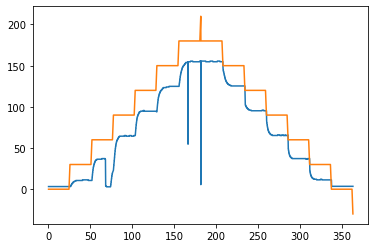

In [104]:
a=2*samples
ydata=df['angle']
ydata2=df['set_point']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
xdata=xdata[1:a]
pylab.plot(xdata, ydata, xdata, ydata2, label='data')

In [365]:
i=0
j=0
filename="Ramp_dataset_10_10"
name="Dataset/"+filename+".csv"
steps=300
samples=16*steps

factor=10
max_value=150
min_value=0

ser=star_communication('COM14')
time.sleep(5)
calibrate_zero(ser)
time.sleep(0.02)
calibrate_zero(ser)

bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])

degree=min_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+factor
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=max_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-factor
        if degree < min_value:
            degree=min_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

l0

l0

start
0 ['0.80' '1.66' '0.00' '12' '']
1 ['0.80' '1.77' '0.00' '12' '']
2 ['0.80' '1.66' '0.00' '12' '']
3 ['0.80' '1.66' '0.00' '12' '']
4 ['0.80' '1.66' '0.00' '12' '']
5 ['0.80' '1.45' '0.00' '12' '']
6 ['0.80' '1.66' '0.00' '12' '']
7 ['0.80' '1.66' '0.00' '12' '']
8 ['0.80' '1.66' '0.00' '12' '']
9 ['0.80' '1.66' '0.00' '12' '']
10 ['0.80' '1.55' '0.00' '12' '']
11 ['0.80' '1.55' '0.00' '12' '']
12 ['0.80' '1.66' '0.00' '12' '']
13 ['0.80' '1.66' '0.00' '12' '']
14 ['0.80' '1.55' '0.00' '12' '']
15 ['0.80' '1.77' '0.00' '12' '']
16 ['0.80' '1.66' '0.00' '12' '']
17 ['0.80' '1.66' '0.00' '12' '']
18 ['0.80' '1.66' '0.00' '12' '']
19 ['0.80' '1.55' '0.00' '12' '']
20 ['0.80' '1.66' '0.00' '12' '']
21 ['0.80' '1.66' '0.00' '12' '']
22 ['0.80' '1.66' '0.00' '12' '']
23 ['0.80' '1.55' '0.00' '12' '']
24 ['0.80' '1.66' '0.00' '12' '']
25 ['0.80' '1.77' '0.00' '12' '']
26 ['0.80' '1.66' '0.00' '11' '']
27 ['0.80' '1.77' '0.00' '11' '']
28 ['0.80' '1.66' '0.00' '11' '']
29 ['0.80'

243 ['0.80' '0.25' '0.00' '3' '']
244 ['0.80' '0.25' '0.00' '3' '']
245 ['0.80' '0.25' '0.00' '3' '']
246 ['0.80' '0.25' '0.00' '3' '']
247 ['0.80' '0.25' '0.00' '3' '']
248 ['0.80' '0.25' '0.00' '3' '']
249 ['0.80' '0.25' '0.00' '3' '']
250 ['0.80' '0.25' '0.00' '3' '']
251 ['0.80' '0.25' '0.00' '3' '']
252 ['0.80' '0.25' '0.00' '3' '']
253 ['0.80' '0.25' '0.00' '3' '']
254 ['0.80' '0.25' '0.00' '3' '']
255 ['0.80' '0.25' '0.00' '3' '']
256 ['0.80' '0.25' '0.00' '3' '']
257 ['0.80' '0.25' '0.00' '3' '']
258 ['0.80' '0.25' '0.00' '3' '']
259 ['0.80' '0.25' '0.00' '3' '']
260 ['0.80' '0.25' '0.00' '3' '']
261 ['0.80' '0.25' '0.00' '3' '']
262 ['0.80' '0.25' '0.00' '3' '']
263 ['0.80' '0.25' '0.00' '2' '']
264 ['0.80' '0.25' '0.00' '2' '']
265 ['0.80' '0.25' '0.00' '2' '']
266 ['0.80' '0.25' '0.00' '2' '']
267 ['0.80' '0.25' '0.00' '2' '']
268 ['0.80' '0.25' '0.00' '2' '']
269 ['0.80' '0.25' '0.00' '2' '']
270 ['0.80' '0.25' '0.00' '2' '']
271 ['0.80' '0.36' '0.00' '2' '']
272 ['0.80' '0

472 ['8.05' '15.72' '10.00' '62' '']
473 ['8.05' '15.62' '10.00' '62' '']
474 ['8.05' '15.40' '10.00' '62' '']
475 ['8.05' '15.62' '10.00' '62' '']
476 ['8.05' '15.62' '10.00' '63' '']
477 ['8.05' '16.81' '10.00' '63' '']
478 ['8.05' '15.51' '10.00' '63' '']
479 ['8.05' '16.92' '10.00' '63' '']
480 ['8.05' '15.51' '10.00' '63' '']
481 ['8.05' '15.40' '10.00' '63' '']
482 ['8.05' '15.62' '10.00' '63' '']
483 ['8.05' '15.72' '10.00' '63' '']
484 ['8.05' '15.62' '10.00' '63' '']
485 ['8.05' '15.40' '10.00' '63' '']
486 ['8.05' '17.03' '10.00' '64' '']
487 ['8.05' '15.51' '10.00' '64' '']
488 ['8.05' '15.72' '10.00' '64' '']
489 ['8.05' '15.94' '10.00' '64' '']
490 ['8.05' '15.94' '10.00' '64' '']
491 ['8.05' '15.62' '10.00' '64' '']
492 ['8.05' '15.72' '10.00' '64' '']
493 ['8.05' '15.83' '10.00' '64' '']
494 ['8.05' '15.72' '10.00' '64' '']
495 ['8.05' '15.72' '10.00' '64' '']
496 ['8.05' '15.94' '10.00' '64' '']
497 ['8.05' '15.62' '10.00' '65' '']
498 ['8.05' '15.94' '10.00' '65' '']
4

692 ['21.26' '20.30' '20.00' '72' '']
693 ['21.26' '20.30' '20.00' '72' '']
694 ['21.26' '20.19' '20.00' '72' '']
695 ['21.26' '20.30' '20.00' '72' '']
696 ['21.26' '20.19' '20.00' '72' '']
697 ['21.26' '20.19' '20.00' '72' '']
698 ['21.26' '20.30' '20.00' '72' '']
699 ['21.26' '20.19' '20.00' '72' '']
700 ['21.26' '20.19' '20.00' '72' '']
701 ['21.26' '20.19' '20.00' '71' '']
702 ['21.26' '20.19' '20.00' '71' '']
703 ['21.26' '20.19' '20.00' '71' '']
704 ['21.26' '20.19' '20.00' '71' '']
705 ['21.26' '20.19' '20.00' '71' '']
706 ['21.26' '20.19' '20.00' '71' '']
707 ['21.26' '20.08' '20.00' '71' '']
708 ['21.26' '20.08' '20.00' '71' '']
709 ['21.26' '20.08' '20.00' '71' '']
710 ['21.26' '20.08' '20.00' '71' '']
711 ['21.26' '20.08' '20.00' '71' '']
712 ['21.26' '20.08' '20.00' '71' '']
713 ['21.26' '20.08' '20.00' '71' '']
714 ['21.26' '20.08' '20.00' '71' '']
715 ['21.26' '20.08' '20.00' '71' '']
716 ['21.26' '20.08' '20.00' '71' '']
717 ['21.26' '19.98' '20.00' '70' '']
718 ['21.26'

909 ['20.63' '19.76' '30.00' '126' '']
910 ['21.50' '20.08' '30.00' '122' '']
911 ['21.50' '19.87' '30.00' '122' '']
912 ['21.50' '19.32' '30.00' '123' '']
913 ['21.50' '19.98' '30.00' '123' '']
914 ['21.50' '20.52' '30.00' '124' '']
915 ['22.36' '20.74' '30.00' '124' '']
916 ['22.36' '19.76' '30.00' '120' '']
917 ['22.36' '19.32' '30.00' '120' '']
918 ['23.13' '22.81' '30.00' '121' '']
919 ['23.13' '23.25' '30.00' '121' '']
920 ['23.90' '22.16' '30.00' '118' '']
921 ['23.91' '23.46' '30.00' '118' '']
922 ['23.91' '20.08' '30.00' '114' '']
923 ['23.91' '20.19' '30.00' '114' '']
924 ['24.73' '19.98' '30.00' '111' '']
925 ['24.73' '20.74' '30.00' '111' '']
926 ['24.73' '20.19' '30.00' '111' '']
927 ['25.57' '23.25' '30.00' '111' '']
928 ['25.57' '23.57' '30.00' '108' '']
929 ['25.57' '22.70' '30.00' '108' '']
930 ['25.57' '20.08' '30.00' '108' '']
931 ['25.57' '23.90' '30.00' '108' '']
932 ['26.57' '19.76' '30.00' '104' '']
933 ['26.58' '21.17' '30.00' '104' '']
934 ['26.58' '22.92' '30.

1124 ['30.53' '21.07' '30.00' '75' '']
1125 ['30.53' '21.28' '30.00' '75' '']
1126 ['30.53' '20.96' '30.00' '75' '']
1127 ['30.53' '20.85' '30.00' '75' '']
1128 ['30.53' '20.85' '30.00' '75' '']
1129 ['30.53' '21.07' '30.00' '75' '']
1130 ['30.53' '21.07' '30.00' '75' '']
1131 ['30.53' '21.07' '30.00' '75' '']
1132 ['30.53' '20.85' '30.00' '75' '']
1133 ['30.53' '21.07' '30.00' '75' '']
1134 ['30.53' '21.50' '30.00' '75' '']
1135 ['30.53' '20.85' '30.00' '75' '']
1136 ['30.53' '21.28' '30.00' '75' '']
1137 ['30.53' '21.07' '30.00' '75' '']
1138 ['30.53' '21.17' '30.00' '75' '']
1139 ['30.53' '21.28' '30.00' '75' '']
1140 ['31.21' '21.17' '30.00' '75' '']
1141 ['31.28' '20.85' '30.00' '71' '']
1142 ['31.28' '21.07' '30.00' '71' '']
1143 ['31.28' '21.07' '30.00' '71' '']
1144 ['31.28' '21.07' '30.00' '71' '']
1145 ['31.28' '21.07' '30.00' '71' '']
1146 ['31.28' '20.96' '30.00' '71' '']
1147 ['31.28' '21.07' '30.00' '70' '']
1148 ['31.28' '21.07' '30.00' '70' '']
1149 ['31.28' '21.07' '30

1332 ['41.68' '21.50' '40.00' '135' '']
1333 ['41.69' '23.35' '40.00' '135' '']
1334 ['41.69' '21.83' '40.00' '131' '']
1335 ['42.45' '20.63' '40.00' '131' '']
1336 ['42.45' '20.63' '40.00' '127' '']
1337 ['42.45' '21.17' '40.00' '127' '']
1338 ['43.20' '23.68' '40.00' '123' '']
1339 ['43.20' '24.77' '40.00' '123' '']
1340 ['43.91' '20.85' '40.00' '122' '']
1341 ['43.99' '20.41' '40.00' '122' '']
1342 ['43.99' '21.28' '40.00' '118' '']
1343 ['43.99' '23.79' '40.00' '118' '']
1344 ['44.79' '23.90' '40.00' '113' '']
1345 ['44.79' '21.28' '40.00' '113' '']
1346 ['44.79' '22.16' '40.00' '113' '']
1347 ['44.79' '21.83' '40.00' '113' '']
1348 ['45.50' '20.85' '40.00' '112' '']
1349 ['45.58' '24.55' '40.00' '112' '']
1350 ['45.58' '20.63' '40.00' '108' '']
1351 ['45.58' '21.83' '40.00' '108' '']
1352 ['46.36' '21.39' '40.00' '107' '']
1353 ['46.36' '21.17' '40.00' '107' '']
1354 ['46.36' '24.23' '40.00' '103' '']
1355 ['46.36' '23.46' '40.00' '103' '']
1356 ['46.36' '21.07' '40.00' '102' '']


1544 ['46.29' '21.28' '50.00' '91' '']
1545 ['46.29' '21.28' '50.00' '91' '']
1546 ['46.29' '21.28' '50.00' '91' '']
1547 ['46.29' '21.28' '50.00' '92' '']
1548 ['46.29' '21.28' '50.00' '92' '']
1549 ['46.29' '21.28' '50.00' '92' '']
1550 ['46.29' '21.39' '50.00' '92' '']
1551 ['46.29' '21.39' '50.00' '93' '']
1552 ['46.29' '21.28' '50.00' '93' '']
1553 ['46.29' '21.28' '50.00' '93' '']
1554 ['46.29' '21.28' '50.00' '93' '']
1555 ['46.29' '21.28' '50.00' '93' '']
1556 ['46.29' '21.28' '50.00' '93' '']
1557 ['46.29' '21.39' '50.00' '94' '']
1558 ['46.29' '21.28' '50.00' '94' '']
1559 ['46.29' '21.28' '50.00' '94' '']
1560 ['46.29' '21.28' '50.00' '94' '']
1561 ['46.29' '21.28' '50.00' '94' '']
1562 ['46.29' '21.28' '50.00' '95' '']
1563 ['46.29' '21.28' '50.00' '95' '']
1564 ['46.29' '21.28' '50.00' '95' '']
1565 ['46.29' '21.28' '50.00' '95' '']
1566 ['46.29' '21.28' '50.00' '95' '']
1567 ['46.29' '21.28' '50.00' '96' '']
1568 ['46.29' '21.28' '50.00' '96' '']
1569 ['46.29' '21.17' '50

1751 ['43.08' '20.96' '50.00' '161' '']
1752 ['43.08' '20.96' '50.00' '161' '']
1753 ['43.08' '20.96' '50.00' '162' '']
1754 ['43.08' '20.96' '50.00' '162' '']
1755 ['43.08' '20.96' '50.00' '163' '']
1756 ['43.08' '21.07' '50.00' '163' '']
1757 ['43.08' '20.96' '50.00' '163' '']
1758 ['43.08' '21.07' '50.00' '163' '']
1759 ['43.08' '20.96' '50.00' '164' '']
1760 ['43.08' '20.96' '50.00' '164' '']
1761 ['42.26' '20.96' '50.00' '169' '']
1762 ['42.25' '20.96' '50.00' '169' '']
1763 ['42.25' '20.96' '50.00' '170' '']
1764 ['42.25' '20.96' '50.00' '170' '']
1765 ['42.25' '20.96' '50.00' '170' '']
1766 ['42.25' '20.96' '50.00' '170' '']
1767 ['42.25' '20.96' '50.00' '171' '']
1768 ['42.25' '20.96' '50.00' '171' '']
1769 ['42.25' '21.07' '50.00' '172' '']
1770 ['42.25' '20.96' '50.00' '172' '']
1771 ['42.25' '20.96' '50.00' '173' '']
1772 ['42.25' '20.96' '50.00' '173' '']
1773 ['42.25' '20.96' '50.00' '174' '']
1774 ['42.25' '20.96' '50.00' '174' '']
1775 ['42.25' '20.96' '50.00' '174' '']


1959 ['73.43' '21.83' '60.00' '47' '']
1960 ['73.43' '21.83' '60.00' '46' '']
1961 ['73.43' '21.72' '60.00' '46' '']
1962 ['73.43' '21.83' '60.00' '45' '']
1963 ['73.43' '21.83' '60.00' '45' '']
1964 ['73.43' '21.83' '60.00' '43' '']
1965 ['72.68' '21.83' '60.00' '43' '']
1966 ['72.68' '21.83' '60.00' '46' '']
1967 ['72.68' '21.83' '60.00' '46' '']
1968 ['72.68' '21.83' '60.00' '44' '']
1969 ['72.68' '21.83' '60.00' '44' '']
1970 ['72.68' '21.83' '60.00' '43' '']
1971 ['72.68' '21.83' '60.00' '43' '']
1972 ['72.68' '21.72' '60.00' '42' '']
1973 ['72.68' '21.83' '60.00' '42' '']
1974 ['72.68' '21.83' '60.00' '41' '']
1975 ['72.68' '21.72' '60.00' '41' '']
1976 ['72.68' '21.83' '60.00' '39' '']
1977 ['72.68' '21.83' '60.00' '39' '']
1978 ['72.68' '21.83' '60.00' '38' '']
1979 ['72.68' '21.83' '60.00' '38' '']
1980 ['72.68' '21.83' '60.00' '37' '']
1981 ['72.68' '21.72' '60.00' '37' '']
1982 ['72.68' '21.72' '60.00' '36' '']
1983 ['72.68' '21.72' '60.00' '36' '']
1984 ['72.68' '21.83' '60

2170 ['62.32' '21.07' '70.00' '105' '']
2171 ['62.32' '21.07' '70.00' '106' '']
2172 ['62.32' '21.07' '70.00' '106' '']
2173 ['62.32' '21.07' '70.00' '107' '']
2174 ['62.32' '21.07' '70.00' '107' '']
2175 ['62.32' '21.07' '70.00' '107' '']
2176 ['62.32' '21.07' '70.00' '107' '']
2177 ['62.32' '21.07' '70.00' '108' '']
2178 ['62.32' '21.07' '70.00' '108' '']
2179 ['62.32' '21.07' '70.00' '109' '']
2180 ['62.32' '21.07' '70.00' '109' '']
2181 ['62.32' '21.07' '70.00' '110' '']
2182 ['62.32' '21.07' '70.00' '110' '']
2183 ['62.32' '21.07' '70.00' '110' '']
2184 ['62.32' '21.07' '70.00' '110' '']
2185 ['62.32' '21.07' '70.00' '111' '']
2186 ['62.32' '21.07' '70.00' '111' '']
2187 ['62.32' '21.07' '70.00' '112' '']
2188 ['62.32' '21.07' '70.00' '113' '']
2189 ['62.32' '21.07' '70.00' '113' '']
2190 ['62.32' '21.07' '70.00' '113' '']
2191 ['62.32' '21.07' '70.00' '113' '']
2192 ['62.32' '21.07' '70.00' '114' '']
2193 ['62.32' '21.07' '70.00' '114' '']
2194 ['62.32' '21.07' '70.00' '114' '']


2378 ['66.75' '20.52' '70.00' '175' '']
2379 ['67.62' '22.26' '70.00' '175' '']
2380 ['67.71' '20.52' '70.00' '171' '']
2381 ['67.71' '22.37' '70.00' '171' '']
2382 ['68.55' '20.63' '70.00' '171' '']
2383 ['68.56' '23.35' '70.00' '171' '']
2384 ['68.56' '22.16' '70.00' '167' '']
2385 ['68.56' '20.63' '70.00' '167' '']
2386 ['69.42' '21.17' '70.00' '163' '']
2387 ['69.42' '24.77' '70.00' '163' '']
2388 ['69.42' '23.68' '70.00' '163' '']
2389 ['69.42' '22.48' '70.00' '163' '']
2390 ['70.28' '22.70' '70.00' '159' '']
2391 ['70.28' '22.59' '70.00' '159' '']
2392 ['70.28' '22.70' '70.00' '158' '']
2393 ['70.28' '22.59' '70.00' '158' '']
2394 ['71.04' '22.81' '70.00' '154' '']
2395 ['71.04' '24.12' '70.00' '154' '']
2396 ['71.76' '21.17' '70.00' '154' '']
2397 ['71.84' '20.85' '70.00' '154' '']
2398 ['71.84' '22.16' '70.00' '150' '']
2399 ['76.91' '24.55' '80.00' '124' '']
2400 ['76.91' '24.66' '80.00' '124' '']
2401 ['76.91' '22.37' '80.00' '171' '']
2402 ['76.91' '20.96' '80.00' '171' '']


2586 ['89.78' '22.16' '80.00' '34' '']
2587 ['89.78' '22.16' '80.00' '34' '']
2588 ['89.78' '22.16' '80.00' '33' '']
2589 ['89.78' '22.16' '80.00' '33' '']
2590 ['89.78' '22.16' '80.00' '32' '']
2591 ['89.78' '22.16' '80.00' '32' '']
2592 ['89.78' '22.16' '80.00' '31' '']
2593 ['89.78' '22.16' '80.00' '31' '']
2594 ['89.78' '22.16' '80.00' '30' '']
2595 ['89.78' '22.16' '80.00' '30' '']
2596 ['89.78' '22.16' '80.00' '29' '']
2597 ['89.78' '22.16' '80.00' '29' '']
2598 ['89.78' '22.16' '80.00' '28' '']
2599 ['89.78' '22.16' '80.00' '28' '']
2600 ['89.78' '22.16' '80.00' '27' '']
2601 ['89.78' '22.16' '80.00' '27' '']
2602 ['89.78' '22.16' '80.00' '26' '']
2603 ['89.78' '22.16' '80.00' '26' '']
2604 ['89.78' '22.16' '80.00' '25' '']
2605 ['89.78' '22.16' '80.00' '25' '']
2606 ['89.78' '22.16' '80.00' '24' '']
2607 ['89.78' '22.16' '80.00' '24' '']
2608 ['89.78' '22.16' '80.00' '23' '']
2609 ['89.78' '22.16' '80.00' '23' '']
2610 ['89.78' '22.16' '80.00' '22' '']
2611 ['89.78' '22.16' '80

2799 ['79.21' '21.39' '90.00' '141' '']
2800 ['79.21' '21.39' '90.00' '142' '']
2801 ['79.21' '21.39' '90.00' '142' '']
2802 ['79.21' '21.39' '90.00' '143' '']
2803 ['79.21' '21.39' '90.00' '143' '']
2804 ['79.21' '21.39' '90.00' '144' '']
2805 ['79.21' '21.39' '90.00' '144' '']
2806 ['79.21' '21.39' '90.00' '145' '']
2807 ['79.21' '21.39' '90.00' '145' '']
2808 ['79.21' '21.50' '90.00' '146' '']
2809 ['79.21' '21.39' '90.00' '146' '']
2810 ['79.21' '21.39' '90.00' '147' '']
2811 ['79.21' '21.50' '90.00' '147' '']
2812 ['79.21' '21.39' '90.00' '147' '']
2813 ['79.21' '21.39' '90.00' '148' '']
2814 ['79.21' '21.39' '90.00' '150' '']
2815 ['79.21' '21.39' '90.00' '150' '']
2816 ['79.21' '21.39' '90.00' '150' '']
2817 ['79.21' '21.39' '90.00' '151' '']
2818 ['79.21' '21.39' '90.00' '151' '']
2819 ['79.21' '21.39' '90.00' '152' '']
2820 ['79.21' '21.39' '90.00' '152' '']
2821 ['79.21' '21.39' '90.00' '153' '']
2822 ['79.21' '21.39' '90.00' '153' '']
2823 ['79.21' '21.39' '90.00' '154' '']


3008 ['101.25' '22.16' '100.00' '139' '']
3009 ['102.05' '22.26' '100.00' '139' '']
3010 ['102.05' '24.01' '100.00' '135' '']
3011 ['102.05' '21.61' '100.00' '135' '']
3012 ['102.05' '22.05' '100.00' '135' '']
3013 ['102.05' '22.26' '100.00' '135' '']
3014 ['102.05' '24.88' '100.00' '135' '']
3015 ['102.85' '23.90' '100.00' '135' '']
3016 ['102.85' '21.72' '100.00' '135' '']
3017 ['102.85' '22.16' '100.00' '130' '']
3018 ['103.64' '21.61' '100.00' '130' '']
3019 ['103.65' '21.50' '100.00' '126' '']
3020 ['103.65' '21.50' '100.00' '126' '']
3021 ['103.65' '21.61' '100.00' '126' '']
3022 ['103.65' '21.72' '100.00' '126' '']
3023 ['103.65' '24.99' '100.00' '125' '']
3024 ['104.43' '22.48' '100.00' '125' '']
3025 ['104.43' '22.16' '100.00' '121' '']
3026 ['104.43' '24.12' '100.00' '121' '']
3027 ['104.43' '25.21' '100.00' '120' '']
3028 ['104.43' '22.37' '100.00' '120' '']
3029 ['105.28' '21.61' '100.00' '116' '']
3030 ['105.28' '24.77' '100.00' '116' '']
3031 ['105.28' '22.37' '100.00' '1

3208 ['107.94' '22.70' '100.00' '29' '']
3209 ['107.94' '22.70' '100.00' '29' '']
3210 ['107.94' '22.70' '100.00' '29' '']
3211 ['107.94' '22.70' '100.00' '28' '']
3212 ['107.94' '22.70' '100.00' '28' '']
3213 ['107.94' '22.70' '100.00' '27' '']
3214 ['107.94' '22.70' '100.00' '27' '']
3215 ['107.94' '22.81' '100.00' '26' '']
3216 ['107.94' '22.70' '100.00' '26' '']
3217 ['107.94' '22.70' '100.00' '26' '']
3218 ['107.94' '22.70' '100.00' '26' '']
3219 ['107.94' '22.70' '100.00' '25' '']
3220 ['107.94' '22.81' '100.00' '25' '']
3221 ['107.94' '22.70' '100.00' '24' '']
3222 ['107.94' '22.70' '100.00' '24' '']
3223 ['107.94' '22.70' '100.00' '23' '']
3224 ['107.94' '22.81' '100.00' '23' '']
3225 ['107.94' '22.70' '100.00' '22' '']
3226 ['107.94' '22.70' '100.00' '22' '']
3227 ['107.94' '22.70' '100.00' '22' '']
3228 ['107.94' '22.70' '100.00' '21' '']
3229 ['107.94' '22.70' '100.00' '21' '']
3230 ['107.94' '22.70' '100.00' '20' '']
3231 ['107.94' '22.70' '100.00' '20' '']
3232 ['107.94' '

3411 ['97.15' '21.94' '110.00' '158' '']
3412 ['97.15' '22.05' '110.00' '158' '']
3413 ['97.15' '22.05' '110.00' '159' '']
3414 ['97.15' '21.94' '110.00' '159' '']
3415 ['97.15' '21.94' '110.00' '160' '']
3416 ['97.15' '21.94' '110.00' '160' '']
3417 ['97.15' '21.94' '110.00' '161' '']
3418 ['97.15' '21.94' '110.00' '161' '']
3419 ['97.15' '21.94' '110.00' '163' '']
3420 ['97.15' '21.94' '110.00' '163' '']
3421 ['97.15' '22.05' '110.00' '164' '']
3422 ['97.15' '21.94' '110.00' '164' '']
3423 ['97.15' '22.05' '110.00' '165' '']
3424 ['97.15' '21.94' '110.00' '165' '']
3425 ['97.15' '21.94' '110.00' '167' '']
3426 ['97.15' '21.94' '110.00' '168' '']
3427 ['97.15' '21.94' '110.00' '168' '']
3428 ['97.15' '21.94' '110.00' '169' '']
3429 ['97.15' '21.94' '110.00' '169' '']
3430 ['97.15' '21.94' '110.00' '170' '']
3431 ['97.15' '21.94' '110.00' '170' '']
3432 ['97.15' '21.94' '110.00' '172' '']
3433 ['97.15' '21.94' '110.00' '172' '']
3434 ['97.15' '21.94' '110.00' '173' '']
3435 ['97.15' '2

3611 ['123.64' '22.26' '120.00' '126' '']
3612 ['124.41' '23.14' '120.00' '122' '']
3613 ['124.41' '22.48' '120.00' '122' '']
3614 ['124.41' '23.03' '120.00' '121' '']
3615 ['124.41' '24.66' '120.00' '121' '']
3616 ['124.41' '22.59' '120.00' '121' '']
3617 ['125.26' '26.19' '120.00' '116' '']
3618 ['125.26' '23.57' '120.00' '116' '']
3619 ['125.26' '25.43' '120.00' '116' '']
3620 ['125.26' '23.03' '120.00' '116' '']
3621 ['125.26' '25.75' '120.00' '115' '']
3622 ['125.26' '22.92' '120.00' '115' '']
3623 ['125.26' '23.68' '120.00' '115' '']
3624 ['126.04' '25.75' '120.00' '110' '']
3625 ['126.04' '25.75' '120.00' '110' '']
3626 ['126.04' '22.48' '120.00' '109' '']
3627 ['126.04' '22.26' '120.00' '109' '']
3628 ['126.04' '22.59' '120.00' '109' '']
3629 ['126.91' '22.59' '120.00' '104' '']
3630 ['126.91' '23.68' '120.00' '104' '']
3631 ['126.91' '25.32' '120.00' '103' '']
3632 ['126.91' '22.70' '120.00' '103' '']
3633 ['126.91' '25.10' '120.00' '102' '']
3634 ['126.91' '23.79' '120.00' '1

3812 ['127.71' '23.35' '120.00' '21' '']
3813 ['127.71' '23.35' '120.00' '21' '']
3814 ['127.71' '23.35' '120.00' '20' '']
3815 ['127.71' '23.35' '120.00' '20' '']
3816 ['127.71' '23.35' '120.00' '20' '']
3817 ['127.71' '23.35' '120.00' '20' '']
3818 ['127.71' '23.35' '120.00' '19' '']
3819 ['127.71' '23.35' '120.00' '19' '']
3820 ['127.71' '23.35' '120.00' '18' '']
3821 ['127.71' '23.35' '120.00' '18' '']
3822 ['127.71' '23.35' '120.00' '17' '']
3823 ['127.71' '23.35' '120.00' '17' '']
3824 ['127.71' '23.35' '120.00' '17' '']
3825 ['127.71' '23.35' '120.00' '17' '']
3826 ['127.71' '23.35' '120.00' '16' '']
3827 ['127.71' '23.35' '120.00' '16' '']
3828 ['127.71' '23.35' '120.00' '15' '']
3829 ['127.71' '23.35' '120.00' '14' '']
3830 ['127.71' '23.35' '120.00' '14' '']
3831 ['127.71' '23.35' '120.00' '14' '']
3832 ['127.71' '23.35' '120.00' '14' '']
3833 ['127.71' '23.35' '120.00' '14' '']
3834 ['127.71' '23.35' '120.00' '13' '']
3835 ['126.94' '23.35' '120.00' '13' '']
3836 ['126.94' '

4012 ['116.89' '22.70' '130.00' '167' '']
4013 ['116.89' '22.70' '130.00' '168' '']
4014 ['116.89' '22.59' '130.00' '168' '']
4015 ['116.89' '22.70' '130.00' '168' '']
4016 ['116.89' '22.70' '130.00' '169' '']
4017 ['116.89' '22.70' '130.00' '169' '']
4018 ['116.89' '22.59' '130.00' '171' '']
4019 ['116.89' '22.59' '130.00' '171' '']
4020 ['116.89' '22.59' '130.00' '172' '']
4021 ['116.89' '22.59' '130.00' '172' '']
4022 ['116.89' '22.70' '130.00' '173' '']
4023 ['116.89' '22.70' '130.00' '173' '']
4024 ['116.08' '22.59' '130.00' '175' '']
4025 ['116.07' '22.59' '130.00' '175' '']
4026 ['116.07' '22.59' '130.00' '180' '']
4027 ['116.07' '22.59' '130.00' '180' '']
4028 ['116.07' '22.59' '130.00' '181' '']
4029 ['116.07' '22.70' '130.00' '181' '']
4030 ['116.07' '22.59' '130.00' '183' '']
4031 ['116.07' '22.59' '130.00' '183' '']
4032 ['116.07' '22.59' '130.00' '184' '']
4033 ['116.07' '22.59' '130.00' '184' '']
4034 ['116.07' '22.70' '130.00' '186' '']
4035 ['116.07' '22.59' '130.00' '1

4208 ['112.11' '22.48' '140.00' '255' '']
4209 ['112.11' '22.48' '140.00' '255' '']
4210 ['112.11' '22.48' '140.00' '255' '']
4211 ['112.11' '22.48' '140.00' '255' '']
4212 ['112.11' '22.37' '140.00' '255' '']
4213 ['112.11' '22.48' '140.00' '255' '']
4214 ['112.11' '22.48' '140.00' '255' '']
4215 ['112.11' '22.48' '140.00' '255' '']
4216 ['112.11' '22.48' '140.00' '255' '']
4217 ['112.11' '22.48' '140.00' '255' '']
4218 ['112.11' '22.48' '140.00' '255' '']
4219 ['112.11' '22.48' '140.00' '255' '']
4220 ['112.11' '22.37' '140.00' '255' '']
4221 ['112.11' '22.48' '140.00' '255' '']
4222 ['112.11' '22.48' '140.00' '255' '']
4223 ['112.11' '22.48' '140.00' '255' '']
4224 ['112.11' '22.48' '140.00' '255' '']
4225 ['112.11' '22.48' '140.00' '255' '']
4226 ['112.11' '22.48' '140.00' '255' '']
4227 ['112.11' '22.37' '140.00' '255' '']
4228 ['112.11' '22.48' '140.00' '255' '']
4229 ['112.11' '22.37' '140.00' '255' '']
4230 ['112.11' '22.48' '140.00' '255' '']
4231 ['112.11' '22.48' '140.00' '2

4408 ['108.19' '22.26' '140.00' '255' '']
4409 ['108.19' '22.26' '140.00' '255' '']
4410 ['108.19' '22.26' '140.00' '255' '']
4411 ['108.19' '22.26' '140.00' '255' '']
4412 ['108.19' '22.26' '140.00' '255' '']
4413 ['108.19' '22.26' '140.00' '255' '']
4414 ['108.19' '22.26' '140.00' '255' '']
4415 ['108.19' '22.26' '140.00' '255' '']
4416 ['108.19' '22.26' '140.00' '255' '']
4417 ['108.19' '22.26' '140.00' '255' '']
4418 ['108.19' '22.26' '140.00' '255' '']
4419 ['108.19' '22.26' '140.00' '255' '']
4420 ['108.19' '22.26' '140.00' '255' '']
4421 ['108.19' '22.26' '140.00' '255' '']
4422 ['108.19' '22.26' '140.00' '255' '']
4423 ['108.19' '22.26' '140.00' '255' '']
4424 ['108.19' '22.16' '140.00' '255' '']
4425 ['108.19' '22.26' '140.00' '255' '']
4426 ['108.19' '22.26' '140.00' '255' '']
4427 ['108.19' '22.26' '140.00' '255' '']
4428 ['108.19' '22.26' '140.00' '255' '']
4429 ['108.19' '22.26' '140.00' '255' '']
4430 ['108.19' '22.26' '140.00' '255' '']
4431 ['108.19' '22.26' '140.00' '2

4605 ['104.25' '22.16' '150.00' '255' '']
4606 ['104.25' '22.05' '150.00' '255' '']
4607 ['104.25' '22.05' '150.00' '255' '']
4608 ['104.25' '22.05' '150.00' '255' '']
4609 ['104.25' '22.05' '150.00' '255' '']
4610 ['104.25' '22.05' '150.00' '255' '']
4611 ['104.25' '22.05' '150.00' '255' '']
4612 ['104.25' '22.05' '150.00' '255' '']
4613 ['104.25' '22.05' '150.00' '255' '']
4614 ['104.25' '22.05' '150.00' '255' '']
4615 ['104.25' '22.05' '150.00' '255' '']
4616 ['104.25' '22.05' '150.00' '255' '']
4617 ['104.25' '22.05' '150.00' '255' '']
4618 ['104.25' '22.05' '150.00' '255' '']
4619 ['104.25' '22.05' '150.00' '255' '']
4620 ['104.25' '22.05' '150.00' '255' '']
4621 ['103.42' '22.05' '150.00' '255' '']
4622 ['103.33' '22.05' '150.00' '255' '']
4623 ['103.33' '22.05' '150.00' '255' '']
4624 ['103.33' '22.05' '150.00' '255' '']
4625 ['103.33' '22.05' '150.00' '255' '']
4626 ['103.33' '22.05' '150.00' '255' '']
4627 ['103.33' '22.05' '150.00' '255' '']
4628 ['103.33' '22.05' '150.00' '2

4 ['100.04' '21.94' '150.00' '255' '']
5 ['100.04' '21.94' '150.00' '255' '']
6 ['100.04' '21.83' '150.00' '255' '']
7 ['100.04' '21.94' '150.00' '255' '']
8 ['100.04' '21.83' '150.00' '255' '']
9 ['100.04' '21.83' '150.00' '255' '']
10 ['100.04' '21.83' '150.00' '255' '']
11 ['100.04' '21.94' '150.00' '255' '']
12 ['100.04' '21.94' '150.00' '255' '']
13 ['100.04' '21.83' '150.00' '255' '']
14 ['100.04' '21.94' '150.00' '255' '']
15 ['100.04' '21.83' '150.00' '255' '']
16 ['100.04' '21.83' '150.00' '255' '']
17 ['100.04' '21.83' '150.00' '255' '']
18 ['100.04' '21.83' '150.00' '255' '']
19 ['100.04' '21.83' '150.00' '255' '']
20 ['100.04' '21.83' '150.00' '255' '']
21 ['100.04' '21.83' '150.00' '255' '']
22 ['100.04' '21.83' '150.00' '255' '']
23 ['100.04' '21.83' '150.00' '255' '']
24 ['100.04' '21.83' '150.00' '255' '']
25 ['100.04' '21.83' '150.00' '255' '']
26 ['100.04' '21.83' '150.00' '255' '']
27 ['100.04' '21.94' '150.00' '255' '']
28 ['100.04' '21.83' '150.00' '255' '']
29 ['1

212 ['96.07' '21.72' '150.00' '255' '']
213 ['96.07' '21.72' '150.00' '255' '']
214 ['96.07' '21.72' '150.00' '255' '']
215 ['96.07' '21.72' '150.00' '255' '']
216 ['96.07' '21.72' '150.00' '255' '']
217 ['96.07' '21.72' '150.00' '255' '']
218 ['96.07' '21.72' '150.00' '255' '']
219 ['96.07' '21.72' '150.00' '255' '']
220 ['96.07' '21.72' '150.00' '255' '']
221 ['96.07' '21.72' '150.00' '255' '']
222 ['96.07' '21.72' '150.00' '255' '']
223 ['96.07' '21.72' '150.00' '255' '']
224 ['96.07' '21.72' '150.00' '255' '']
225 ['96.07' '21.72' '150.00' '255' '']
226 ['96.07' '21.72' '150.00' '255' '']
227 ['96.07' '21.72' '150.00' '255' '']
228 ['96.07' '21.72' '150.00' '255' '']
229 ['96.07' '21.72' '150.00' '255' '']
230 ['96.07' '21.72' '150.00' '255' '']
231 ['96.07' '21.72' '150.00' '255' '']
232 ['96.07' '21.72' '150.00' '255' '']
233 ['96.07' '21.72' '150.00' '255' '']
234 ['96.07' '21.72' '150.00' '255' '']
235 ['96.07' '21.72' '150.00' '255' '']
236 ['96.07' '21.72' '150.00' '255' '']


417 ['92.15' '21.50' '140.00' '255' '']
418 ['92.15' '21.61' '140.00' '255' '']
419 ['92.15' '21.50' '140.00' '255' '']
420 ['92.15' '21.50' '140.00' '255' '']
421 ['92.15' '21.50' '140.00' '255' '']
422 ['92.15' '21.50' '140.00' '255' '']
423 ['92.15' '21.50' '140.00' '255' '']
424 ['92.15' '21.61' '140.00' '255' '']
425 ['92.15' '21.50' '140.00' '255' '']
426 ['92.15' '21.61' '140.00' '255' '']
427 ['92.15' '21.50' '140.00' '255' '']
428 ['92.15' '21.61' '140.00' '255' '']
429 ['92.15' '21.50' '140.00' '255' '']
430 ['92.15' '21.50' '140.00' '255' '']
431 ['92.15' '21.50' '140.00' '255' '']
432 ['92.15' '21.50' '140.00' '255' '']
433 ['92.15' '21.50' '140.00' '255' '']
434 ['92.15' '21.50' '140.00' '255' '']
435 ['92.15' '21.50' '140.00' '255' '']
436 ['91.45' '21.50' '140.00' '255' '']
437 ['91.37' '21.50' '140.00' '255' '']
438 ['91.37' '21.50' '140.00' '255' '']
439 ['91.37' '21.50' '140.00' '255' '']
440 ['91.37' '21.50' '140.00' '255' '']
441 ['91.37' '21.50' '140.00' '255' '']


623 ['88.32' '21.39' '130.00' '255' '']
624 ['88.32' '21.39' '130.00' '255' '']
625 ['88.32' '21.39' '130.00' '255' '']
626 ['88.32' '21.39' '130.00' '255' '']
627 ['88.32' '21.39' '130.00' '255' '']
628 ['88.32' '21.39' '130.00' '255' '']
629 ['88.32' '21.39' '130.00' '255' '']
630 ['88.32' '21.39' '130.00' '255' '']
631 ['88.32' '21.39' '130.00' '255' '']
632 ['88.32' '21.39' '130.00' '255' '']
633 ['88.32' '21.39' '130.00' '255' '']
634 ['88.32' '21.39' '130.00' '255' '']
635 ['87.51' '21.39' '130.00' '255' '']
636 ['87.51' '21.39' '130.00' '255' '']
637 ['87.51' '21.39' '130.00' '255' '']
638 ['87.51' '21.39' '130.00' '255' '']
639 ['87.51' '21.39' '130.00' '255' '']
640 ['87.51' '21.39' '130.00' '255' '']
641 ['87.51' '21.39' '130.00' '255' '']
642 ['87.51' '21.39' '130.00' '255' '']
643 ['87.51' '21.39' '130.00' '255' '']
644 ['87.51' '21.39' '130.00' '255' '']
645 ['87.51' '21.39' '130.00' '255' '']
646 ['87.51' '21.39' '130.00' '255' '']
647 ['87.51' '21.39' '130.00' '255' '']


829 ['84.41' '21.28' '130.00' '255' '']
830 ['84.41' '21.28' '130.00' '255' '']
831 ['84.41' '21.28' '130.00' '255' '']
832 ['84.41' '21.28' '130.00' '255' '']
833 ['84.41' '21.28' '130.00' '255' '']
834 ['84.41' '21.28' '130.00' '255' '']
835 ['84.41' '21.28' '130.00' '255' '']
836 ['84.41' '21.28' '130.00' '255' '']
837 ['84.41' '21.28' '130.00' '255' '']
838 ['84.41' '21.17' '130.00' '255' '']
839 ['84.41' '21.28' '130.00' '255' '']
840 ['84.41' '21.28' '130.00' '255' '']
841 ['84.41' '21.28' '130.00' '255' '']
842 ['84.41' '21.17' '130.00' '255' '']
843 ['84.41' '21.17' '130.00' '255' '']
844 ['84.41' '21.28' '130.00' '255' '']
845 ['84.41' '21.28' '130.00' '255' '']
846 ['84.41' '21.28' '130.00' '255' '']
847 ['84.41' '21.17' '130.00' '255' '']
848 ['84.41' '21.17' '130.00' '255' '']
849 ['84.41' '21.17' '130.00' '255' '']
850 ['84.41' '21.28' '130.00' '255' '']
851 ['84.41' '21.17' '130.00' '255' '']
852 ['84.41' '21.17' '130.00' '255' '']
853 ['84.41' '21.28' '130.00' '255' '']


1035 ['80.18' '21.07' '120.00' '255' '']
1036 ['80.18' '21.07' '120.00' '255' '']
1037 ['80.18' '21.07' '120.00' '255' '']
1038 ['80.18' '21.07' '120.00' '255' '']
1039 ['80.18' '21.07' '120.00' '255' '']
1040 ['80.18' '21.07' '120.00' '255' '']
1041 ['80.18' '21.07' '120.00' '255' '']
1042 ['80.18' '21.07' '120.00' '255' '']
1043 ['80.18' '21.07' '120.00' '255' '']
1044 ['80.18' '21.07' '120.00' '255' '']
1045 ['80.18' '21.07' '120.00' '255' '']
1046 ['80.18' '21.07' '120.00' '255' '']
1047 ['80.18' '21.07' '120.00' '255' '']
1048 ['80.18' '21.07' '120.00' '255' '']
1049 ['80.18' '21.07' '120.00' '255' '']
1050 ['80.18' '21.07' '120.00' '255' '']
1051 ['80.18' '21.07' '120.00' '255' '']
1052 ['79.35' '21.07' '120.00' '255' '']
1053 ['79.35' '21.07' '120.00' '255' '']
1054 ['79.35' '21.07' '120.00' '255' '']
1055 ['79.35' '21.07' '120.00' '255' '']
1056 ['79.35' '21.07' '120.00' '255' '']
1057 ['79.35' '21.07' '120.00' '255' '']
1058 ['79.35' '21.07' '120.00' '255' '']
1059 ['79.35' '2

1235 ['76.16' '20.96' '110.00' '255' '']
1236 ['76.16' '20.96' '110.00' '255' '']
1237 ['76.16' '20.96' '110.00' '255' '']
1238 ['76.16' '20.96' '110.00' '255' '']
1239 ['76.16' '20.96' '110.00' '255' '']
1240 ['76.16' '20.96' '110.00' '255' '']
1241 ['75.40' '20.96' '110.00' '255' '']
1242 ['75.40' '20.96' '110.00' '255' '']
1243 ['75.40' '20.96' '110.00' '255' '']
1244 ['75.40' '20.96' '110.00' '255' '']
1245 ['75.40' '20.96' '110.00' '255' '']
1246 ['75.40' '20.96' '110.00' '255' '']
1247 ['75.40' '20.96' '110.00' '255' '']
1248 ['75.40' '20.96' '110.00' '255' '']
1249 ['75.40' '20.96' '110.00' '255' '']
1250 ['75.40' '20.96' '110.00' '255' '']
1251 ['75.40' '20.96' '110.00' '255' '']
1252 ['75.40' '20.96' '110.00' '255' '']
1253 ['75.40' '20.96' '110.00' '255' '']
1254 ['75.40' '20.96' '110.00' '255' '']
1255 ['75.40' '20.96' '110.00' '255' '']
1256 ['75.40' '20.96' '110.00' '255' '']
1257 ['75.40' '20.96' '110.00' '255' '']
1258 ['75.40' '20.96' '110.00' '255' '']
1259 ['75.40' '2

1435 ['72.19' '20.85' '110.00' '255' '']
1436 ['72.19' '20.85' '110.00' '255' '']
1437 ['72.19' '20.85' '110.00' '255' '']
1438 ['72.19' '20.85' '110.00' '255' '']
1439 ['72.19' '20.85' '110.00' '255' '']
1440 ['72.19' '20.85' '110.00' '255' '']
1441 ['72.19' '20.85' '110.00' '255' '']
1442 ['72.19' '20.85' '110.00' '255' '']
1443 ['72.19' '20.85' '110.00' '255' '']
1444 ['72.19' '20.85' '110.00' '255' '']
1445 ['72.19' '20.85' '110.00' '255' '']
1446 ['72.19' '20.85' '110.00' '255' '']
1447 ['72.19' '20.85' '110.00' '255' '']
1448 ['72.19' '20.85' '110.00' '255' '']
1449 ['72.19' '20.85' '110.00' '255' '']
1450 ['72.19' '20.85' '110.00' '255' '']
1451 ['72.19' '20.85' '110.00' '255' '']
1452 ['72.19' '20.85' '110.00' '255' '']
1453 ['72.19' '20.85' '110.00' '255' '']
1454 ['72.19' '20.85' '110.00' '255' '']
1455 ['72.19' '20.85' '110.00' '255' '']
1456 ['72.19' '20.85' '110.00' '255' '']
1457 ['72.19' '20.85' '110.00' '255' '']
1458 ['72.19' '20.85' '110.00' '255' '']
1459 ['72.19' '2

1637 ['68.09' '20.74' '100.00' '255' '']
1638 ['68.09' '20.74' '100.00' '255' '']
1639 ['68.09' '20.74' '100.00' '255' '']
1640 ['68.09' '20.74' '100.00' '255' '']
1641 ['68.09' '20.74' '100.00' '255' '']
1642 ['68.09' '20.74' '100.00' '255' '']
1643 ['68.09' '20.74' '100.00' '255' '']
1644 ['68.09' '20.74' '100.00' '255' '']
1645 ['68.09' '20.74' '100.00' '255' '']
1646 ['68.09' '20.74' '100.00' '255' '']
1647 ['68.09' '20.74' '100.00' '255' '']
1648 ['68.09' '20.74' '100.00' '255' '']
1649 ['68.09' '20.74' '100.00' '255' '']
1650 ['68.09' '20.74' '100.00' '255' '']
1651 ['68.09' '20.74' '100.00' '255' '']
1652 ['68.09' '20.74' '100.00' '255' '']
1653 ['68.09' '20.74' '100.00' '255' '']
1654 ['68.09' '20.74' '100.00' '255' '']
1655 ['68.09' '20.74' '100.00' '255' '']
1656 ['68.09' '20.74' '100.00' '255' '']
1657 ['68.09' '20.74' '100.00' '255' '']
1658 ['68.09' '20.74' '100.00' '255' '']
1659 ['68.09' '20.74' '100.00' '255' '']
1660 ['68.09' '20.74' '100.00' '255' '']
1661 ['68.09' '2

1841 ['63.98' '20.63' '90.00' '255' '']
1842 ['63.98' '20.63' '90.00' '255' '']
1843 ['63.98' '20.63' '90.00' '255' '']
1844 ['63.98' '20.63' '90.00' '255' '']
1845 ['63.98' '20.63' '90.00' '255' '']
1846 ['63.98' '20.63' '90.00' '255' '']
1847 ['63.98' '20.63' '90.00' '255' '']
1848 ['63.98' '20.63' '90.00' '255' '']
1849 ['63.98' '20.74' '90.00' '255' '']
1850 ['63.98' '20.63' '90.00' '255' '']
1851 ['63.98' '20.63' '90.00' '255' '']
1852 ['63.98' '20.63' '90.00' '255' '']
1853 ['63.98' '20.63' '90.00' '255' '']
1854 ['63.98' '20.63' '90.00' '255' '']
1855 ['63.98' '20.63' '90.00' '255' '']
1856 ['63.27' '20.63' '90.00' '255' '']
1857 ['63.19' '20.63' '90.00' '255' '']
1858 ['63.19' '20.63' '90.00' '255' '']
1859 ['63.19' '20.63' '90.00' '255' '']
1860 ['63.19' '20.63' '90.00' '255' '']
1861 ['63.19' '20.63' '90.00' '255' '']
1862 ['63.19' '20.63' '90.00' '255' '']
1863 ['63.19' '20.63' '90.00' '255' '']
1864 ['63.19' '20.63' '90.00' '255' '']
1865 ['63.19' '20.63' '90.00' '255' '']


2048 ['60.84' '20.52' '90.00' '255' '']
2049 ['60.84' '20.52' '90.00' '255' '']
2050 ['60.84' '20.52' '90.00' '255' '']
2051 ['60.84' '20.52' '90.00' '255' '']
2052 ['60.84' '20.52' '90.00' '255' '']
2053 ['60.84' '20.52' '90.00' '255' '']
2054 ['60.84' '20.52' '90.00' '255' '']
2055 ['60.84' '20.52' '90.00' '255' '']
2056 ['60.84' '20.52' '90.00' '255' '']
2057 ['60.84' '20.52' '90.00' '255' '']
2058 ['60.84' '20.52' '90.00' '255' '']
2059 ['60.84' '20.52' '90.00' '255' '']
2060 ['60.84' '20.52' '90.00' '255' '']
2061 ['60.84' '20.52' '90.00' '255' '']
2062 ['60.84' '20.52' '90.00' '255' '']
2063 ['60.84' '20.52' '90.00' '255' '']
2064 ['60.84' '20.52' '90.00' '255' '']
2065 ['60.84' '20.52' '90.00' '255' '']
2066 ['60.84' '20.52' '90.00' '255' '']
2067 ['60.84' '20.52' '90.00' '255' '']
2068 ['60.84' '20.52' '90.00' '255' '']
2069 ['60.84' '20.52' '90.00' '255' '']
2070 ['60.84' '20.52' '90.00' '255' '']
2071 ['60.84' '20.52' '90.00' '255' '']
2072 ['60.84' '20.52' '90.00' '255' '']


2255 ['56.86' '20.52' '80.00' '255' '']
2256 ['56.86' '20.52' '80.00' '255' '']
2257 ['56.86' '20.52' '80.00' '255' '']
2258 ['56.86' '20.52' '80.00' '255' '']
2259 ['56.86' '20.52' '80.00' '255' '']
2260 ['56.86' '20.52' '80.00' '255' '']
2261 ['56.86' '20.52' '80.00' '255' '']
2262 ['56.86' '20.52' '80.00' '255' '']
2263 ['56.86' '20.52' '80.00' '255' '']
2264 ['56.86' '20.52' '80.00' '255' '']
2265 ['56.86' '20.52' '80.00' '255' '']
2266 ['56.86' '20.52' '80.00' '255' '']
2267 ['56.86' '20.52' '80.00' '255' '']
2268 ['56.86' '20.52' '80.00' '255' '']
2269 ['56.86' '20.52' '80.00' '255' '']
2270 ['56.05' '20.52' '80.00' '255' '']
2271 ['56.05' '20.52' '80.00' '255' '']
2272 ['56.05' '20.52' '80.00' '255' '']
2273 ['56.05' '20.52' '80.00' '255' '']
2274 ['56.05' '20.52' '80.00' '255' '']
2275 ['56.05' '20.52' '80.00' '255' '']
2276 ['56.05' '20.52' '80.00' '255' '']
2277 ['56.05' '20.52' '80.00' '255' '']
2278 ['56.05' '20.52' '80.00' '255' '']
2279 ['56.05' '20.52' '80.00' '255' '']


2460 ['52.05' '20.41' '70.00' '255' '']
2461 ['52.05' '20.41' '70.00' '255' '']
2462 ['52.05' '20.41' '70.00' '255' '']
2463 ['52.05' '20.41' '70.00' '255' '']
2464 ['52.05' '20.52' '70.00' '255' '']
2465 ['52.05' '20.41' '70.00' '255' '']
2466 ['52.05' '20.41' '70.00' '255' '']
2467 ['52.05' '20.41' '70.00' '255' '']
2468 ['52.05' '20.41' '70.00' '255' '']
2469 ['52.05' '20.41' '70.00' '255' '']
2470 ['52.05' '20.41' '70.00' '255' '']
2471 ['52.05' '20.41' '70.00' '255' '']
2472 ['52.05' '20.41' '70.00' '255' '']
2473 ['52.05' '20.41' '70.00' '255' '']
2474 ['52.05' '20.41' '70.00' '255' '']
2475 ['52.05' '20.41' '70.00' '255' '']
2476 ['52.05' '20.41' '70.00' '255' '']
2477 ['52.05' '20.41' '70.00' '255' '']
2478 ['52.05' '20.41' '70.00' '255' '']
2479 ['52.05' '20.41' '70.00' '255' '']
2480 ['51.27' '20.41' '70.00' '255' '']
2481 ['51.26' '20.41' '70.00' '255' '']
2482 ['51.26' '20.41' '70.00' '255' '']
2483 ['51.26' '20.41' '70.00' '255' '']
2484 ['51.26' '20.52' '70.00' '255' '']


2668 ['47.34' '20.41' '70.00' '255' '']
2669 ['47.34' '20.30' '70.00' '255' '']
2670 ['47.34' '20.41' '70.00' '255' '']
2671 ['47.34' '20.41' '70.00' '255' '']
2672 ['47.34' '20.41' '70.00' '255' '']
2673 ['47.34' '20.41' '70.00' '255' '']
2674 ['47.34' '20.41' '70.00' '255' '']
2675 ['47.34' '20.41' '70.00' '255' '']
2676 ['47.34' '20.41' '70.00' '255' '']
2677 ['47.34' '20.41' '70.00' '255' '']
2678 ['47.34' '20.30' '70.00' '255' '']
2679 ['47.34' '20.41' '70.00' '255' '']
2680 ['47.34' '20.41' '70.00' '255' '']
2681 ['47.34' '20.41' '70.00' '255' '']
2682 ['47.34' '20.30' '70.00' '255' '']
2683 ['47.34' '20.41' '70.00' '255' '']
2684 ['47.34' '20.41' '70.00' '255' '']
2685 ['47.34' '20.41' '70.00' '255' '']
2686 ['47.34' '20.41' '70.00' '255' '']
2687 ['47.34' '20.41' '70.00' '255' '']
2688 ['47.34' '20.41' '70.00' '255' '']
2689 ['47.34' '20.41' '70.00' '255' '']
2690 ['47.34' '20.30' '70.00' '255' '']
2691 ['47.34' '20.30' '70.00' '255' '']
2692 ['47.34' '20.30' '70.00' '255' '']


2874 ['41.72' '20.30' '60.00' '255' '']
2875 ['41.72' '20.19' '60.00' '255' '']
2876 ['40.96' '20.19' '60.00' '255' '']
2877 ['40.96' '20.19' '60.00' '255' '']
2878 ['40.96' '20.30' '60.00' '255' '']
2879 ['40.96' '20.19' '60.00' '255' '']
2880 ['40.96' '20.19' '60.00' '255' '']
2881 ['40.96' '20.19' '60.00' '255' '']
2882 ['40.96' '20.19' '60.00' '255' '']
2883 ['40.96' '20.19' '60.00' '255' '']
2884 ['40.96' '20.19' '60.00' '255' '']
2885 ['40.96' '20.19' '60.00' '255' '']
2886 ['40.96' '20.19' '60.00' '255' '']
2887 ['40.96' '20.19' '60.00' '255' '']
2888 ['40.96' '20.19' '60.00' '255' '']
2889 ['40.96' '20.19' '60.00' '255' '']
2890 ['40.96' '20.19' '60.00' '255' '']
2891 ['40.96' '20.19' '60.00' '255' '']
2892 ['40.96' '20.19' '60.00' '255' '']
2893 ['40.96' '20.19' '60.00' '255' '']
2894 ['40.96' '20.19' '60.00' '255' '']
2895 ['40.96' '20.19' '60.00' '255' '']
2896 ['40.96' '20.19' '60.00' '255' '']
2897 ['40.96' '20.19' '60.00' '255' '']
2898 ['40.96' '20.19' '60.00' '255' '']


3082 ['35.37' '19.98' '50.00' '255' '']
3083 ['35.37' '19.87' '50.00' '255' '']
3084 ['35.37' '19.87' '50.00' '255' '']
3085 ['35.37' '19.87' '50.00' '255' '']
3086 ['35.37' '19.87' '50.00' '255' '']
3087 ['35.37' '19.87' '50.00' '255' '']
3088 ['34.59' '19.98' '50.00' '255' '']
3089 ['34.59' '19.98' '50.00' '255' '']
3090 ['34.59' '19.98' '50.00' '255' '']
3091 ['34.59' '19.98' '50.00' '255' '']
3092 ['34.59' '19.87' '50.00' '255' '']
3093 ['34.59' '19.87' '50.00' '255' '']
3094 ['34.59' '19.98' '50.00' '255' '']
3095 ['34.59' '19.87' '50.00' '255' '']
3096 ['34.59' '19.87' '50.00' '255' '']
3097 ['34.59' '19.87' '50.00' '255' '']
3098 ['34.59' '19.87' '50.00' '255' '']
3099 ['34.59' '19.98' '50.00' '255' '']
3100 ['34.59' '19.87' '50.00' '255' '']
3101 ['34.59' '19.87' '50.00' '255' '']
3102 ['34.59' '19.87' '50.00' '255' '']
3103 ['34.59' '19.87' '50.00' '255' '']
3104 ['34.59' '21.50' '50.00' '255' '']
3105 ['35.43' '21.28' '50.00' '255' '']
3106 ['35.44' '20.96' '50.00' '255' '']


3289 ['70.52' '21.50' '50.00' '10' '']
3290 ['70.52' '21.50' '50.00' '10' '']
3291 ['70.52' '21.50' '50.00' '8' '']
3292 ['70.52' '21.50' '50.00' '8' '']
3293 ['70.52' '21.50' '50.00' '6' '']
3294 ['70.52' '21.50' '50.00' '4' '']
3295 ['70.52' '21.50' '50.00' '2' '']
3296 ['70.52' '21.50' '50.00' '2' '']
3297 ['70.52' '21.50' '50.00' '2' '']
3298 ['70.52' '21.50' '50.00' '0' '']
3299 ['64.61' '21.07' '40.00' '14' '']
3300 ['64.61' '20.08' '40.00' '-38' '']
3301 ['63.77' '20.08' '40.00' '-38' '']
3302 ['61.42' '19.65' '40.00' '-38' '']
3303 ['57.01' '19.21' '40.00' '-17' '']
3304 ['53.75' '18.89' '40.00' '-17' '']
3305 ['50.55' '20.08' '40.00' '13' '']
3306 ['49.47' '20.19' '40.00' '13' '']
3307 ['49.47' '20.19' '40.00' '33' '']
3308 ['48.60' '20.30' '40.00' '33' '']
3309 ['48.59' '20.30' '40.00' '36' '']
3310 ['48.59' '20.30' '40.00' '36' '']
3311 ['48.59' '20.30' '40.00' '35' '']
3312 ['48.59' '20.30' '40.00' '35' '']
3313 ['48.59' '20.41' '40.00' '35' '']
3314 ['48.59' '20.41' '40.00

3505 ['43.86' '20.41' '40.00' '3' '']
3506 ['43.86' '20.41' '40.00' '3' '']
3507 ['43.86' '20.41' '40.00' '3' '']
3508 ['43.86' '20.41' '40.00' '3' '']
3509 ['43.86' '20.41' '40.00' '3' '']
3510 ['43.86' '20.41' '40.00' '3' '']
3511 ['42.98' '20.41' '40.00' '7' '']
3512 ['42.98' '20.41' '40.00' '7' '']
3513 ['42.98' '20.41' '40.00' '6' '']
3514 ['42.98' '20.41' '40.00' '6' '']
3515 ['42.98' '20.41' '40.00' '6' '']
3516 ['42.98' '20.41' '40.00' '6' '']
3517 ['42.98' '20.41' '40.00' '6' '']
3518 ['42.98' '20.41' '40.00' '6' '']
3519 ['42.98' '20.41' '40.00' '6' '']
3520 ['42.98' '20.41' '40.00' '6' '']
3521 ['42.98' '20.41' '40.00' '5' '']
3522 ['42.98' '20.41' '40.00' '5' '']
3523 ['42.98' '20.41' '40.00' '5' '']
3524 ['42.98' '20.41' '40.00' '5' '']
3525 ['42.98' '20.52' '40.00' '5' '']
3526 ['42.98' '20.41' '40.00' '5' '']
3527 ['42.98' '20.41' '40.00' '4' '']
3528 ['42.98' '20.41' '40.00' '4' '']
3529 ['42.98' '20.52' '40.00' '4' '']
3530 ['42.98' '20.41' '40.00' '4' '']
3531 ['42.98

3717 ['16.52' '16.81' '30.00' '145' '']
3718 ['16.52' '16.81' '30.00' '145' '']
3719 ['16.52' '16.71' '30.00' '147' '']
3720 ['16.52' '16.71' '30.00' '147' '']
3721 ['16.52' '16.71' '30.00' '148' '']
3722 ['16.52' '16.71' '30.00' '148' '']
3723 ['16.52' '16.71' '30.00' '150' '']
3724 ['16.52' '16.81' '30.00' '150' '']
3725 ['16.52' '16.71' '30.00' '151' '']
3726 ['16.52' '16.71' '30.00' '151' '']
3727 ['16.52' '16.71' '30.00' '152' '']
3728 ['16.52' '16.71' '30.00' '152' '']
3729 ['16.52' '16.71' '30.00' '154' '']
3730 ['16.52' '16.71' '30.00' '154' '']
3731 ['16.52' '16.71' '30.00' '155' '']
3732 ['16.52' '16.71' '30.00' '155' '']
3733 ['16.52' '16.71' '30.00' '156' '']
3734 ['16.52' '16.71' '30.00' '156' '']
3735 ['16.52' '16.71' '30.00' '158' '']
3736 ['16.52' '16.60' '30.00' '158' '']
3737 ['16.52' '16.60' '30.00' '158' '']
3738 ['16.52' '16.71' '30.00' '159' '']
3739 ['16.52' '16.60' '30.00' '160' '']
3740 ['16.52' '16.71' '30.00' '160' '']
3741 ['16.52' '16.60' '30.00' '160' '']


3927 ['36.77' '21.07' '20.00' '3' '']
3928 ['36.77' '21.07' '20.00' '3' '']
3929 ['36.77' '21.07' '20.00' '2' '']
3930 ['36.77' '21.07' '20.00' '2' '']
3931 ['36.77' '21.07' '20.00' '0' '']
3932 ['36.77' '21.07' '20.00' '0' '']
3933 ['35.95' '20.08' '20.00' '-1' '']
3934 ['33.37' '19.65' '20.00' '-1' '']
3935 ['30.15' '19.32' '20.00' '21' '']
3936 ['28.71' '19.32' '20.00' '21' '']
3937 ['28.71' '19.43' '20.00' '37' '']
3938 ['28.71' '19.43' '20.00' '37' '']
3939 ['28.71' '19.43' '20.00' '36' '']
3940 ['28.71' '19.43' '20.00' '36' '']
3941 ['28.71' '19.43' '20.00' '35' '']
3942 ['28.71' '19.54' '20.00' '35' '']
3943 ['28.71' '19.54' '20.00' '34' '']
3944 ['28.71' '19.54' '20.00' '34' '']
3945 ['28.71' '19.54' '20.00' '33' '']
3946 ['27.93' '19.54' '20.00' '33' '']
3947 ['27.93' '19.54' '20.00' '36' '']
3948 ['27.93' '19.54' '20.00' '36' '']
3949 ['27.93' '19.54' '20.00' '36' '']
3950 ['27.93' '19.54' '20.00' '36' '']
3951 ['27.93' '19.54' '20.00' '35' '']
3952 ['27.93' '19.54' '20.00' '

4139 ['22.53' '18.67' '20.00' '11' '']
4140 ['22.53' '18.67' '20.00' '11' '']
4141 ['22.53' '18.67' '20.00' '11' '']
4142 ['22.53' '18.67' '20.00' '11' '']
4143 ['22.53' '18.78' '20.00' '11' '']
4144 ['22.53' '18.78' '20.00' '11' '']
4145 ['22.53' '18.67' '20.00' '11' '']
4146 ['22.53' '18.67' '20.00' '10' '']
4147 ['22.53' '18.67' '20.00' '10' '']
4148 ['22.53' '18.67' '20.00' '10' '']
4149 ['22.53' '18.67' '20.00' '10' '']
4150 ['22.53' '18.67' '20.00' '10' '']
4151 ['22.53' '18.67' '20.00' '10' '']
4152 ['22.53' '18.67' '20.00' '10' '']
4153 ['22.53' '18.67' '20.00' '10' '']
4154 ['22.53' '18.67' '20.00' '9' '']
4155 ['22.53' '18.67' '20.00' '9' '']
4156 ['22.53' '18.56' '20.00' '9' '']
4157 ['22.53' '18.67' '20.00' '9' '']
4158 ['22.53' '18.67' '20.00' '9' '']
4159 ['22.53' '18.67' '20.00' '9' '']
4160 ['22.53' '18.67' '20.00' '9' '']
4161 ['22.53' '18.56' '20.00' '9' '']
4162 ['22.53' '18.56' '20.00' '9' '']
4163 ['22.53' '18.56' '20.00' '8' '']
4164 ['21.74' '18.67' '20.00' '8' '

4354 ['5.22' '9.95' '10.00' '70' '']
4355 ['5.22' '9.95' '10.00' '70' '']
4356 ['5.22' '9.95' '10.00' '71' '']
4357 ['5.22' '9.95' '10.00' '71' '']
4358 ['5.22' '9.95' '10.00' '71' '']
4359 ['5.22' '9.95' '10.00' '71' '']
4360 ['5.22' '9.84' '10.00' '72' '']
4361 ['5.22' '9.84' '10.00' '72' '']
4362 ['5.22' '9.84' '10.00' '72' '']
4363 ['5.22' '9.84' '10.00' '73' '']
4364 ['5.22' '9.84' '10.00' '73' '']
4365 ['5.22' '9.84' '10.00' '73' '']
4366 ['5.22' '9.84' '10.00' '73' '']
4367 ['4.42' '9.73' '10.00' '73' '']
4368 ['4.42' '9.73' '10.00' '78' '']
4369 ['4.42' '9.73' '10.00' '78' '']
4370 ['4.42' '9.73' '10.00' '78' '']
4371 ['4.42' '9.73' '10.00' '78' '']
4372 ['4.42' '9.73' '10.00' '79' '']
4373 ['4.42' '9.62' '10.00' '79' '']
4374 ['4.42' '9.62' '10.00' '79' '']
4375 ['4.42' '9.62' '10.00' '79' '']
4376 ['4.42' '9.62' '10.00' '80' '']
4377 ['4.42' '9.62' '10.00' '80' '']
4378 ['4.42' '9.62' '10.00' '81' '']
4379 ['4.42' '9.62' '10.00' '81' '']
4380 ['4.42' '9.62' '10.00' '81' '']
4

4574 ['5.09' '10.93' '0.00' '21' '']
4575 ['5.09' '10.93' '0.00' '21' '']
4576 ['5.09' '10.93' '0.00' '20' '']
4577 ['5.09' '10.93' '0.00' '20' '']
4578 ['5.09' '10.82' '0.00' '20' '']
4579 ['5.09' '10.93' '0.00' '20' '']
4580 ['5.09' '10.93' '0.00' '19' '']
4581 ['5.09' '10.93' '0.00' '19' '']
4582 ['5.09' '10.82' '0.00' '19' '']
4583 ['5.09' '10.82' '0.00' '19' '']
4584 ['5.09' '10.93' '0.00' '18' '']
4585 ['5.09' '10.82' '0.00' '18' '']
4586 ['5.09' '10.82' '0.00' '18' '']
4587 ['5.09' '10.82' '0.00' '18' '']
4588 ['5.09' '10.82' '0.00' '17' '']
4589 ['5.09' '10.82' '0.00' '17' '']
4590 ['5.09' '10.82' '0.00' '17' '']
4591 ['5.09' '10.82' '0.00' '17' '']
4592 ['5.09' '10.82' '0.00' '16' '']
4593 ['5.09' '10.71' '0.00' '16' '']
4594 ['5.09' '10.71' '0.00' '16' '']
4595 ['5.09' '10.71' '0.00' '16' '']
4596 ['5.09' '10.71' '0.00' '15' '']
4597 ['5.09' '10.71' '0.00' '15' '']
4598 ['5.09' '10.71' '0.00' '15' '']
4599 ['5.09' '10.71' '0.00' '15' '']
4600 ['5.09' '10.71' '0.00' '14' '']
4

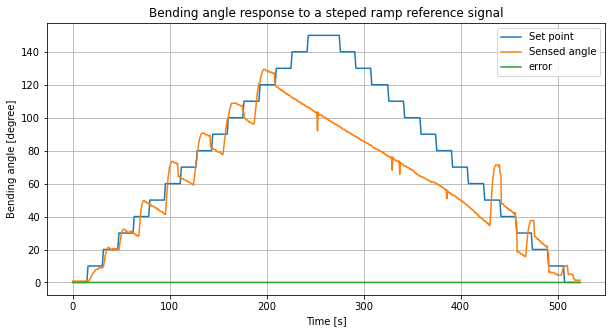

In [366]:
name="Dataset/"+filename+".csv"
with open(name,"a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.1)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

fname="Dataset/"+filename+"_filtered.csv"
df.to_csv(fname)
    
a=2*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata3-ydata
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata3, label='Sensed angle')
plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a steped ramp reference signal')
plt.draw()
plt.grid(True)
plt.legend() 

figurename="Dataset/"+filename+".jpg"
fig.savefig(figurename, bbox_inches='tight', format='jpg')

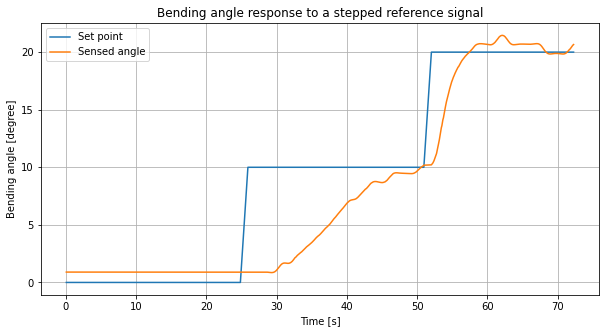

In [184]:
name="Dataset/Jonathan_dataset24.csv"
with open(".csv","a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.05)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()
    
a=2*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a stepped reference signal')
plt.draw()
plt.grid(True)
plt.legend() 
fig.savefig('step33.jpg', bbox_inches='tight', format='jpg')


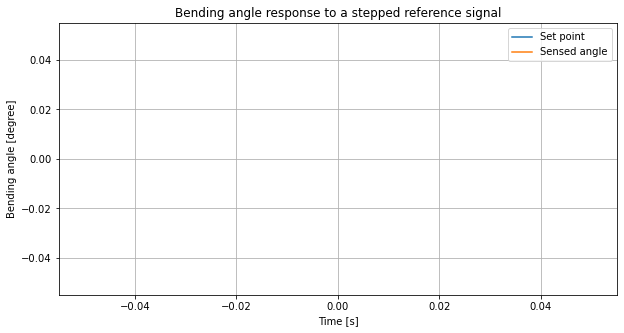

In [169]:
a=2000
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1000:2000]
ydata2=ydata2[1000:2000]
ydata3=ydata3[1000:2000]
xdata=xdata[1000:2000]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a stepped reference signal')
plt.draw()
plt.grid(True)
plt.legend() 
fig.savefig('step28_segment.jpg', bbox_inches='tight', format='jpg')

In [ ]:
Steped signal

In [336]:
i=0
j=0
filename="Step_dataset_0_60_2"
name="Dataset/"+filename+".csv"

max_value=60
min_value=0

steps=500
samples=2*steps
factor=60 

ser=star_communication('COM14')
time.sleep(5)
calibrate_zero(ser)
time.sleep(0.02)
calibrate_zero(ser)

bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])

degree=min_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+factor
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=max_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-factor
        if degree < min_value:
            degree=min_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

l0

l0

start
0 ['-0.26' '5.59' '0.00' '33' '']
1 ['-0.26' '5.48' '0.00' '33' '']
2 ['0.51' '5.81' '0.00' '33' '']
3 ['0.51' '5.59' '0.00' '29' '']
4 ['0.51' '5.70' '0.00' '29' '']
5 ['0.51' '5.70' '0.00' '29' '']
6 ['0.51' '5.59' '0.00' '29' '']
7 ['0.51' '5.59' '0.00' '29' '']
8 ['0.51' '5.59' '0.00' '29' '']
9 ['0.51' '5.37' '0.00' '29' '']
10 ['0.51' '5.59' '0.00' '29' '']
11 ['0.51' '5.70' '0.00' '29' '']
12 ['0.51' '5.48' '0.00' '29' '']
13 ['0.51' '5.48' '0.00' '28' '']
14 ['0.51' '5.59' '0.00' '28' '']
15 ['0.51' '5.59' '0.00' '28' '']
16 ['0.51' '5.59' '0.00' '28' '']
17 ['0.51' '5.26' '0.00' '28' '']
18 ['0.51' '5.59' '0.00' '28' '']
19 ['0.51' '5.48' '0.00' '28' '']
20 ['0.51' '5.48' '0.00' '28' '']
21 ['0.51' '5.48' '0.00' '28' '']
22 ['0.51' '5.26' '0.00' '28' '']
23 ['0.51' '5.48' '0.00' '28' '']
24 ['0.51' '5.48' '0.00' '28' '']
25 ['0.51' '5.48' '0.00' '28' '']
26 ['0.51' '5.26' '0.00' '28' '']
27 ['0.51' '5.26' '0.00' '28' '']
28 ['0.51' '5.48' '0.00' '28' '']
29 ['0.5

236 ['0.47' '5.81' '0.00' '26' '']
237 ['0.47' '5.81' '0.00' '26' '']
238 ['0.47' '5.59' '0.00' '26' '']
239 ['0.47' '5.81' '0.00' '26' '']
240 ['0.47' '5.70' '0.00' '26' '']
241 ['0.47' '5.70' '0.00' '26' '']
242 ['0.47' '5.70' '0.00' '26' '']
243 ['0.47' '5.59' '0.00' '26' '']
244 ['0.47' '5.59' '0.00' '26' '']
245 ['0.47' '5.59' '0.00' '26' '']
246 ['0.47' '5.48' '0.00' '26' '']
247 ['-0.28' '5.48' '0.00' '26' '']
248 ['-0.29' '5.48' '0.00' '26' '']
249 ['-0.29' '5.37' '0.00' '30' '']
250 ['-0.29' '5.37' '0.00' '30' '']
251 ['-0.29' '5.37' '0.00' '30' '']
252 ['-0.29' '5.26' '0.00' '30' '']
253 ['-0.29' '5.26' '0.00' '30' '']
254 ['-0.29' '5.26' '0.00' '30' '']
255 ['-0.29' '5.26' '0.00' '30' '']
256 ['-0.29' '5.26' '0.00' '30' '']
257 ['-0.29' '5.15' '0.00' '30' '']
258 ['-0.29' '5.15' '0.00' '30' '']
259 ['-0.29' '5.15' '0.00' '30' '']
260 ['-0.29' '5.04' '0.00' '30' '']
261 ['-0.29' '5.04' '0.00' '30' '']
262 ['-0.29' '5.04' '0.00' '30' '']
263 ['-0.29' '4.93' '0.00' '30' '']
264

470 ['-0.37' '4.28' '0.00' '31' '']
471 ['-0.37' '3.74' '0.00' '31' '']
472 ['-0.37' '3.84' '0.00' '31' '']
473 ['-0.37' '4.17' '0.00' '31' '']
474 ['-0.37' '4.82' '0.00' '31' '']
475 ['-0.37' '4.17' '0.00' '31' '']
476 ['-0.37' '4.17' '0.00' '31' '']
477 ['-0.37' '4.50' '0.00' '31' '']
478 ['-0.37' '4.50' '0.00' '31' '']
479 ['-0.37' '5.04' '0.00' '31' '']
480 ['-0.37' '4.50' '0.00' '31' '']
481 ['-0.37' '4.50' '0.00' '31' '']
482 ['-0.37' '4.82' '0.00' '31' '']
483 ['-0.37' '4.82' '0.00' '31' '']
484 ['-0.37' '4.72' '0.00' '31' '']
485 ['-0.37' '4.72' '0.00' '31' '']
486 ['-0.37' '5.04' '0.00' '31' '']
487 ['-0.37' '4.82' '0.00' '31' '']
488 ['-0.37' '5.04' '0.00' '31' '']
489 ['-0.37' '5.26' '0.00' '31' '']
490 ['-0.37' '4.93' '0.00' '31' '']
491 ['-0.37' '5.26' '0.00' '31' '']
492 ['-0.37' '5.91' '0.00' '31' '']
493 ['-0.37' '5.15' '0.00' '31' '']
494 ['-0.37' '5.37' '0.00' '31' '']
495 ['0.40' '5.91' '0.00' '31' '']
496 ['0.41' '5.48' '0.00' '27' '']
497 ['0.41' '5.26' '0.00' '27'

688 ['64.77' '21.50' '60.00' '67' '']
689 ['64.77' '21.50' '60.00' '67' '']
690 ['64.77' '21.50' '60.00' '66' '']
691 ['64.77' '21.50' '60.00' '66' '']
692 ['64.77' '21.50' '60.00' '66' '']
693 ['64.77' '21.50' '60.00' '66' '']
694 ['64.77' '21.50' '60.00' '65' '']
695 ['64.77' '21.50' '60.00' '65' '']
696 ['64.77' '21.50' '60.00' '65' '']
697 ['64.77' '21.50' '60.00' '65' '']
698 ['64.77' '21.50' '60.00' '64' '']
699 ['64.77' '21.50' '60.00' '64' '']
700 ['64.77' '21.50' '60.00' '64' '']
701 ['64.77' '21.39' '60.00' '64' '']
702 ['64.77' '21.50' '60.00' '64' '']
703 ['64.77' '21.39' '60.00' '63' '']
704 ['64.77' '21.39' '60.00' '63' '']
705 ['64.77' '21.39' '60.00' '63' '']
706 ['64.77' '21.39' '60.00' '62' '']
707 ['63.97' '21.39' '60.00' '62' '']
708 ['63.96' '21.50' '60.00' '66' '']
709 ['63.96' '21.39' '60.00' '66' '']
710 ['63.96' '21.39' '60.00' '66' '']
711 ['63.96' '21.39' '60.00' '66' '']
712 ['63.96' '21.39' '60.00' '65' '']
713 ['63.96' '21.39' '60.00' '65' '']
714 ['63.96'

904 ['59.74' '21.17' '60.00' '79' '']
905 ['59.74' '20.85' '60.00' '79' '']
906 ['59.74' '21.17' '60.00' '79' '']
907 ['59.74' '21.61' '60.00' '79' '']
908 ['59.74' '21.07' '60.00' '79' '']
909 ['59.74' '22.92' '60.00' '79' '']
910 ['60.49' '21.07' '60.00' '79' '']
911 ['60.50' '21.39' '60.00' '75' '']
912 ['60.50' '21.61' '60.00' '75' '']
913 ['60.50' '20.96' '60.00' '75' '']
914 ['60.50' '21.39' '60.00' '75' '']
915 ['60.50' '21.28' '60.00' '75' '']
916 ['60.50' '21.28' '60.00' '75' '']
917 ['60.50' '21.39' '60.00' '75' '']
918 ['60.50' '21.28' '60.00' '75' '']
919 ['60.50' '21.39' '60.00' '75' '']
920 ['60.50' '21.28' '60.00' '75' '']
921 ['60.50' '21.39' '60.00' '75' '']
922 ['60.50' '21.28' '60.00' '75' '']
923 ['60.50' '21.28' '60.00' '75' '']
924 ['60.50' '21.28' '60.00' '74' '']
925 ['60.50' '21.28' '60.00' '74' '']
926 ['60.50' '21.28' '60.00' '74' '']
927 ['60.50' '21.28' '60.00' '74' '']
928 ['60.50' '21.28' '60.00' '74' '']
929 ['60.50' '21.28' '60.00' '74' '']
930 ['60.50'

126 ['59.72' '21.28' '60.00' '79' '']
127 ['59.72' '21.17' '60.00' '79' '']
128 ['59.72' '21.17' '60.00' '79' '']
129 ['59.72' '21.28' '60.00' '79' '']
130 ['59.72' '21.28' '60.00' '79' '']
131 ['59.72' '21.17' '60.00' '79' '']
132 ['59.72' '21.17' '60.00' '79' '']
133 ['59.72' '21.17' '60.00' '79' '']
134 ['59.72' '21.17' '60.00' '79' '']
135 ['59.72' '21.17' '60.00' '79' '']
136 ['58.85' '21.17' '60.00' '79' '']
137 ['58.85' '21.17' '60.00' '84' '']
138 ['58.85' '21.17' '60.00' '84' '']
139 ['58.85' '21.17' '60.00' '84' '']
140 ['58.85' '21.17' '60.00' '84' '']
141 ['58.85' '20.85' '60.00' '84' '']
142 ['58.85' '20.41' '60.00' '84' '']
143 ['58.85' '22.92' '60.00' '84' '']
144 ['58.85' '20.63' '60.00' '84' '']
145 ['58.85' '21.28' '60.00' '84' '']
146 ['58.85' '21.17' '60.00' '84' '']
147 ['58.85' '22.26' '60.00' '84' '']
148 ['58.85' '21.28' '60.00' '84' '']
149 ['59.66' '22.70' '60.00' '80' '']
150 ['59.66' '21.17' '60.00' '80' '']
151 ['59.66' '22.70' '60.00' '80' '']
152 ['59.66'

344 ['59.58' '22.81' '60.00' '80' '']
345 ['59.58' '20.63' '60.00' '80' '']
346 ['59.58' '20.74' '60.00' '80' '']
347 ['59.58' '21.07' '60.00' '80' '']
348 ['59.58' '21.07' '60.00' '80' '']
349 ['59.58' '21.72' '60.00' '80' '']
350 ['59.58' '20.96' '60.00' '80' '']
351 ['60.30' '20.96' '60.00' '80' '']
352 ['60.38' '22.81' '60.00' '76' '']
353 ['60.38' '21.39' '60.00' '76' '']
354 ['60.38' '21.50' '60.00' '76' '']
355 ['60.38' '20.96' '60.00' '76' '']
356 ['60.38' '21.28' '60.00' '76' '']
357 ['60.38' '21.28' '60.00' '76' '']
358 ['60.38' '22.48' '60.00' '76' '']
359 ['60.38' '21.28' '60.00' '76' '']
360 ['60.38' '21.28' '60.00' '76' '']
361 ['60.38' '21.28' '60.00' '76' '']
362 ['60.38' '21.28' '60.00' '76' '']
363 ['60.38' '21.28' '60.00' '76' '']
364 ['60.38' '20.74' '60.00' '76' '']
365 ['60.38' '21.39' '60.00' '76' '']
366 ['60.38' '21.28' '60.00' '76' '']
367 ['60.38' '21.28' '60.00' '76' '']
368 ['60.38' '20.85' '60.00' '76' '']
369 ['60.38' '21.07' '60.00' '76' '']
370 ['60.38'

562 ['4.91' '10.93' '0.00' '16' '']
563 ['4.91' '10.82' '0.00' '16' '']
564 ['4.91' '10.82' '0.00' '16' '']
565 ['4.91' '10.82' '0.00' '16' '']
566 ['4.91' '10.82' '0.00' '15' '']
567 ['4.91' '10.82' '0.00' '15' '']
568 ['4.91' '10.82' '0.00' '15' '']
569 ['4.91' '10.82' '0.00' '15' '']
570 ['4.91' '10.82' '0.00' '14' '']
571 ['4.91' '10.82' '0.00' '14' '']
572 ['4.91' '10.82' '0.00' '14' '']
573 ['4.91' '10.82' '0.00' '14' '']
574 ['4.91' '10.71' '0.00' '13' '']
575 ['4.91' '10.71' '0.00' '13' '']
576 ['4.91' '10.71' '0.00' '13' '']
577 ['4.91' '10.71' '0.00' '13' '']
578 ['4.91' '10.71' '0.00' '12' '']
579 ['4.91' '10.71' '0.00' '12' '']
580 ['4.91' '10.71' '0.00' '12' '']
581 ['4.16' '10.60' '0.00' '12' '']
582 ['4.16' '10.60' '0.00' '15' '']
583 ['4.16' '10.60' '0.00' '15' '']
584 ['4.16' '10.60' '0.00' '15' '']
585 ['4.16' '10.60' '0.00' '15' '']
586 ['4.16' '10.60' '0.00' '14' '']
587 ['4.16' '10.71' '0.00' '14' '']
588 ['4.16' '10.60' '0.00' '14' '']
589 ['4.16' '10.60' '0.00' '

797 ['-0.68' '4.61' '0.00' '15' '']
798 ['-0.68' '4.61' '0.00' '15' '']
799 ['-0.68' '4.61' '0.00' '15' '']
800 ['-0.68' '4.61' '0.00' '15' '']
801 ['-0.68' '4.50' '0.00' '15' '']
802 ['-0.68' '4.50' '0.00' '15' '']
803 ['-0.68' '4.50' '0.00' '15' '']
804 ['-0.68' '4.50' '0.00' '15' '']
805 ['-0.68' '4.50' '0.00' '16' '']
806 ['-0.68' '4.50' '0.00' '16' '']
807 ['-0.68' '4.50' '0.00' '16' '']
808 ['-0.68' '4.50' '0.00' '16' '']
809 ['-0.68' '4.39' '0.00' '16' '']
810 ['-0.68' '4.39' '0.00' '16' '']
811 ['-0.68' '4.39' '0.00' '16' '']
812 ['-0.68' '4.39' '0.00' '16' '']
813 ['-0.68' '4.39' '0.00' '16' '']
814 ['-0.68' '4.39' '0.00' '16' '']
815 ['-0.68' '4.28' '0.00' '16' '']
816 ['-0.68' '4.28' '0.00' '16' '']
817 ['-0.68' '4.28' '0.00' '16' '']
818 ['-0.68' '4.28' '0.00' '16' '']
819 ['-0.68' '4.28' '0.00' '16' '']
820 ['-0.68' '4.17' '0.00' '16' '']
821 ['-0.68' '4.17' '0.00' '16' '']
822 ['-0.68' '4.17' '0.00' '16' '']
823 ['-0.68' '4.17' '0.00' '16' '']
824 ['-0.68' '4.17' '0.00' '

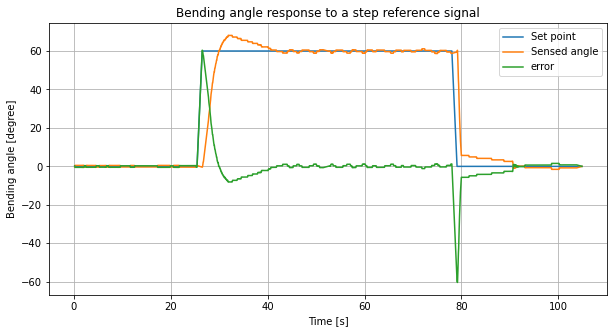

In [338]:
name="Dataset/"+filename+".csv"
with open(name,"a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.95)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

fname="Dataset/"+filename+"_filtered.csv"
df.to_csv(fname)
    
a=2*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata2-ydata
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a step reference signal')
plt.draw()
plt.grid(True)
plt.legend() 

figurename="Dataset/"+filename+".jpg"
fig.savefig(figurename, bbox_inches='tight', format='jpg')

In [ ]:
sine wave trajectory

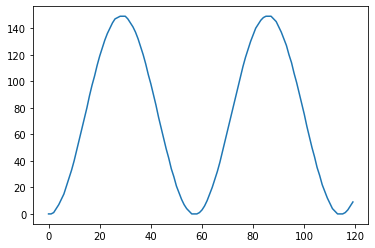

In [326]:
from math import*
Fs=16000
f=280
sample=120
a=[0]*sample
for n in range(sample):
    a[n]=int(75+75*sin(3*pi/2-2*pi*f*n/Fs))
plt.plot(a)

In [327]:
a[0]

0

l0

l0

start
0 ['-0.29' '4.93' '0.00' '30' '']
1 ['-0.29' '4.82' '0.00' '30' '']
2 ['-0.29' '5.04' '0.00' '30' '']
3 ['-0.29' '5.04' '0.00' '30' '']
4 ['-0.29' '5.81' '0.00' '31' '']
5 ['-0.29' '5.59' '0.00' '31' '']
6 ['-0.29' '5.48' '0.00' '31' '']
7 ['-0.29' '5.81' '0.00' '31' '']
8 ['-0.29' '5.70' '0.00' '31' '']
9 ['0.46' '5.26' '0.00' '27' '']
10 ['0.46' '5.26' '0.00' '27' '']
11 ['0.46' '5.26' '0.00' '27' '']
12 ['0.46' '5.26' '0.00' '27' '']
13 ['0.46' '5.15' '0.00' '27' '']
14 ['-0.34' '4.50' '1.00' '31' '']
15 ['-0.34' '4.61' '1.00' '36' '']
16 ['-0.34' '4.61' '1.00' '36' '']
17 ['-0.34' '4.50' '1.00' '36' '']
18 ['-0.34' '4.50' '1.00' '36' '']
19 ['-0.16' '5.70' '4.00' '36' '']
20 ['-0.16' '5.91' '4.00' '36' '']
21 ['-0.16' '5.81' '4.00' '52' '']
22 ['-0.16' '7.33' '4.00' '52' '']
23 ['-0.16' '5.91' '4.00' '52' '']
24 ['1.61' '8.20' '7.00' '46' '']
25 ['1.61' '8.20' '7.00' '62' '']
26 ['1.61' '7.99' '7.00' '62' '']
27 ['1.61' '8.53' '7.00' '62' '']
28 ['1.61' '9.73' '7.00' 

214 ['91.08' '20.96' '82.00' '23' '']
215 ['91.08' '20.52' '82.00' '-17' '']
216 ['91.08' '20.19' '82.00' '-17' '']
217 ['89.90' '19.76' '82.00' '-17' '']
218 ['86.89' '19.43' '82.00' '-4' '']
219 ['78.34' '20.74' '73.00' '48' '']
220 ['78.34' '20.85' '73.00' '2' '']
221 ['78.34' '20.74' '73.00' '2' '']
222 ['78.34' '20.74' '73.00' '2' '']
223 ['78.34' '20.74' '73.00' '2' '']
224 ['77.58' '20.85' '65.00' '1' '']
225 ['77.58' '20.85' '65.00' '1' '']
226 ['77.58' '20.85' '65.00' '1' '']
227 ['77.58' '20.41' '65.00' '-40' '']
228 ['77.58' '20.19' '65.00' '-40' '']
229 ['62.00' '20.08' '57.00' '-1' '']
230 ['62.00' '19.65' '57.00' '-1' '']
231 ['59.45' '19.32' '57.00' '-1' '']
232 ['55.77' '20.19' '57.00' '19' '']
233 ['53.75' '20.30' '57.00' '19' '']
234 ['53.24' '20.52' '49.00' '45' '']
235 ['53.24' '20.63' '49.00' '45' '']
236 ['53.24' '20.52' '49.00' '5' '']
237 ['53.24' '20.52' '49.00' '5' '']
238 ['53.24' '20.52' '49.00' '5' '']
239 ['52.41' '20.63' '42.00' '5' '']
240 ['52.41' '20.6

429 ['155.00' '22.48' '149.00' '87' '']
430 ['155.00' '23.14' '149.00' '87' '']
431 ['155.00' '22.48' '149.00' '91' '']
432 ['155.00' '23.14' '149.00' '91' '']
433 ['155.00' '23.35' '149.00' '91' '']
434 ['155.75' '23.25' '149.00' '80' '']
435 ['156.50' '23.35' '149.00' '80' '']
436 ['156.51' '23.25' '149.00' '76' '']
437 ['156.51' '23.35' '149.00' '76' '']
438 ['156.51' '23.25' '149.00' '75' '']
439 ['155.62' '23.25' '149.00' '72' '']
440 ['155.62' '23.25' '149.00' '72' '']
441 ['155.62' '23.14' '149.00' '72' '']
442 ['155.62' '23.25' '149.00' '72' '']
443 ['155.62' '23.25' '149.00' '72' '']
444 ['154.87' '23.14' '147.00' '69' '']
445 ['154.87' '23.14' '147.00' '69' '']
446 ['154.87' '23.14' '147.00' '69' '']
447 ['154.87' '23.14' '147.00' '59' '']
448 ['154.87' '23.14' '147.00' '59' '']
449 ['154.87' '23.14' '145.00' '51' '']
450 ['154.87' '23.14' '145.00' '51' '']
451 ['154.87' '23.14' '145.00' '51' '']
452 ['154.87' '23.03' '145.00' '40' '']
453 ['154.87' '23.14' '145.00' '40' '']


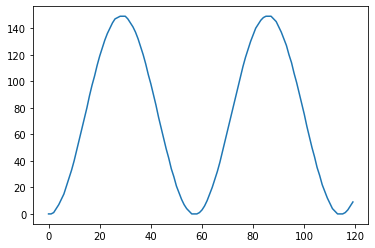

In [333]:
from math import*
Fs=16000
f=280
sample=120
a=[0]*sample
for n in range(sample):
    a[n]=int(75+75*sin(3*pi/2-2*pi*f*n/Fs))
plt.plot(a)

i=0
j=0
k=0
filename="Sin_dataset_16"
name="Dataset/"+filename+".csv"

max_value=150
min_value=0

steps=5
samples=120*steps


ser=star_communication('COM14')
time.sleep(5)
calibrate_zero(ser)
time.sleep(0.02)
calibrate_zero(ser)

bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])

degree=min_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=a[k]
        k=k+1
        j=0
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
    
    time.sleep(0.001)
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

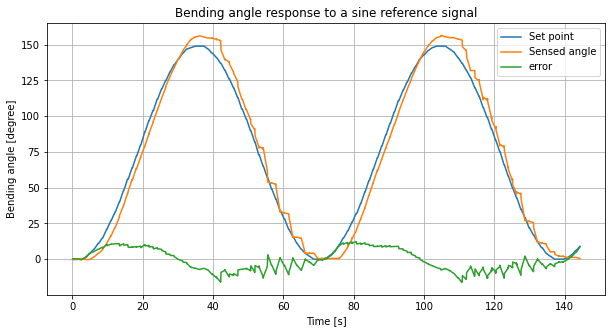

In [335]:
name="Dataset/"+filename+".csv"
with open(name,"a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.95)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

fname="Dataset/"+filename+"_filtered.csv"
df.to_csv(fname)
    
a=2*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata2-ydata
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a sine reference signal')
plt.draw()
plt.grid(True)
plt.legend() 

figurename="Dataset/"+filename+".jpg"
fig.savefig(figurename, bbox_inches='tight', format='jpg')

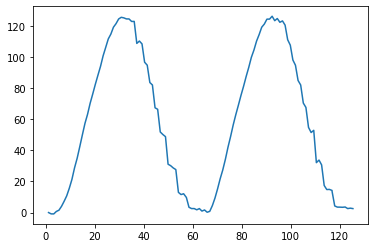

In [303]:
plt.plot(xdata, ydata, label='Sensed angle')

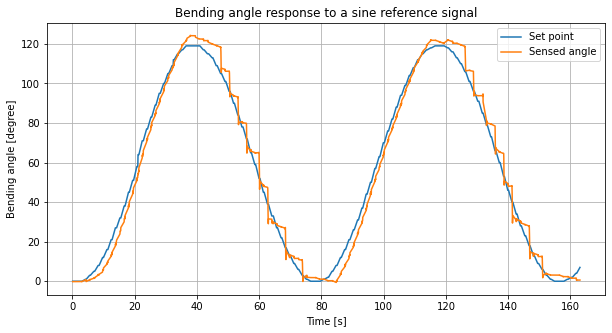

In [314]:
name="Dataset/Sin_dataset_12.csv"
with open(".csv","a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.75)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

a=2*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata2-ydata
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
#plt.plot(xdata, ydata3, label='Unfilter data')
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
#plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a sine reference signal')
plt.draw()
plt.grid(True)
plt.legend() 


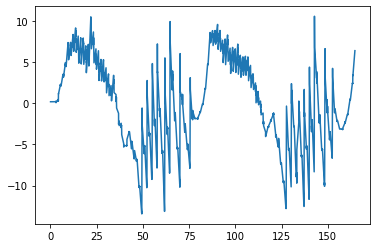

In [323]:
plt.plot(xdata, ydata4, label='error')